In [1]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from dbn.tensorflow import SupervisedDBNRegression,UnsupervisedDBN
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras import Sequential, layers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df = pd.read_csv('yol_53.csv').set_index('year_month')
scalerx = StandardScaler()
scalery = StandardScaler()
borehole = 'D4N0053'
figname = "p53x.jpeg"
bbh = "BH0053"

In [3]:
MMS = MinMaxScaler()

In [4]:
def extract(lst):
    return [[el] for el in lst]
ydf = df[borehole]
ydf = extract(ydf)
df = pd.DataFrame(scalerx.fit_transform(df), columns=df.columns, index=df.index)
df = df.reset_index()
df['dex'] = df['year_month']
df = df.set_index('year_month')
ydf = scalery.fit_transform(ydf)
# df = df.drop(["Abstraction_log"], axis = 1)
X = np.array(df.drop([borehole], axis = 1).reset_index(drop=True))
Y = np.array(df[borehole])
df

,Discharge_log,Temperature_log,precip_trend_log,Abstraction_log,t_1,t_2,D4N0053,dex
year_month,,,,,,,,
1974-02-01,-1.471598,-7.476635,1.396056,-3.304228,4.476516,4.357043,0.506091,1974-02-01
1974-03-01,-0.892100,-7.476635,1.282178,-3.304228,0.483592,4.357043,0.651097,1974-03-01
1974-04-01,-0.167495,-7.476635,1.383397,-3.304228,0.624827,0.462552,0.691078,1974-04-01
1974-05-01,0.249022,-7.476635,1.380273,-3.304228,0.663768,0.600305,0.667209,1974-05-01
1974-06-01,0.275379,-7.476635,1.014413,-3.304228,0.640520,0.638286,0.638566,1974-06-01
...,...,...,...,...,...,...,...,...
2004-08-01,-0.283679,0.286993,0.556564,1.251855,1.007845,0.987487,1.049116,2004-08-01
2004-09-01,-0.327951,-0.007973,0.278455,1.251855,1.012495,0.973881,1.044343,2004-09-01
2004-10-01,-0.350234,-0.337653,0.224374,1.251855,1.007845,0.978416,1.039569,2004-10-01


In [5]:
def ave(lis):
    return sum(lis)/ len(lis)

In [6]:
trials = 10
dbn_ave_r2 = []
gru_ave_r2 = []
lstm_ave_r2 = []
lstm_gru_ave_r2 = []
ffnn_ave_r2 = []
dbn_lstm_ave_r2 = []
dbn_lstm_blind_r2 = []

dbn_ave_mse = []
gru_ave_mse = []
lstm_ave_mse = []
lstm_gru_ave_mse = []
dbn_lstm_ave_mse = []
ffnn_ave_mse = []
dbn_lstm_blind_mse = []

## DBN

In [7]:
from sklearn.model_selection import TimeSeriesSplit


tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]

dummyXtest = pd.DataFrame(X_test)
dummyXtest.columns = ['a','b','c','d','e','f', 'g']
# dummyXtest.columns = ['a','b','d','e','f', 'g']
X_test = np.array(dummyXtest.drop(['g'], axis = 1).reset_index(drop=True))

dummyXtrain = pd.DataFrame(X_train)
dummyXtrain.columns = ['a','b','c','d','e','f', 'g']
# dummyXtrain.columns = ['a','b','d','e','f', 'g']

X_train = np.array(dummyXtrain.drop(['g'], axis = 1).reset_index(drop=True))


print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)


(310, 6) (310,)
(61, 6) (61,)


In [ ]:
regress = SupervisedDBNRegression(hidden_layers_structure = [32, 16],
learning_rate_rbm=0.05,
learning_rate=0.03,
n_epochs_rbm=10,
n_iter_backprop=1000,
batch_size=50,
activation_function='relu',
dropout_p=0.1)

for i in range(trials):
    print("TRIAL: ", i+1)
    print("\n")
    regress.fit(X_train, Y_train)
    dnb_y_pred = regress.predict(X_test)
    dbn_r2 = r2_score(Y_test.tolist(), dnb_y_pred)
    dbn_mse = mean_squared_error(Y_test.tolist(), dnb_y_pred)
    dbn_ave_r2.append(dbn_r2)
    dbn_ave_mse.append(dbn_mse)
    print("\n")

TRIAL:  1


[START] Pre-training step:
Instructions for updating:
Use `tf.cast` instead.
>> Epoch 1 finished 	RBM Reconstruction error 5.472568
>> Epoch 2 finished 	RBM Reconstruction error 4.381129
>> Epoch 3 finished 	RBM Reconstruction error 4.518039
>> Epoch 4 finished 	RBM Reconstruction error 5.011850
>> Epoch 5 finished 	RBM Reconstruction error 5.869471
>> Epoch 6 finished 	RBM Reconstruction error 7.273640
>> Epoch 7 finished 	RBM Reconstruction error 9.392431
>> Epoch 8 finished 	RBM Reconstruction error 13.366038
>> Epoch 9 finished 	RBM Reconstruction error 18.659871
>> Epoch 10 finished 	RBM Reconstruction error 25.717840
>> Epoch 1 finished 	RBM Reconstruction error 59.585434
>> Epoch 2 finished 	RBM Reconstruction error 363.296722
>> Epoch 3 finished 	RBM Reconstruction error 752.454773
>> Epoch 4 finished 	RBM Reconstruction error 1035.211548
>> Epoch 5 finished 	RBM Reconstruction error 1191.103149
>> Epoch 6 finished 	RBM Reconstruction error 1346.150391
>> Epoch 7 fi

>> Epoch 136 finished 	ANN training loss 0.119139
>> Epoch 137 finished 	ANN training loss 0.121674
>> Epoch 138 finished 	ANN training loss 0.119610
>> Epoch 139 finished 	ANN training loss 0.116677
>> Epoch 140 finished 	ANN training loss 0.114915
>> Epoch 141 finished 	ANN training loss 0.117218
>> Epoch 142 finished 	ANN training loss 0.110158
>> Epoch 143 finished 	ANN training loss 0.113975
>> Epoch 144 finished 	ANN training loss 0.110897
>> Epoch 145 finished 	ANN training loss 0.111694
>> Epoch 146 finished 	ANN training loss 0.108677
>> Epoch 147 finished 	ANN training loss 0.109294
>> Epoch 148 finished 	ANN training loss 0.111377
>> Epoch 149 finished 	ANN training loss 0.112138
>> Epoch 150 finished 	ANN training loss 0.121332
>> Epoch 151 finished 	ANN training loss 0.117031
>> Epoch 152 finished 	ANN training loss 0.117916
>> Epoch 153 finished 	ANN training loss 0.113095
>> Epoch 154 finished 	ANN training loss 0.114021
>> Epoch 155 finished 	ANN training loss 0.116987


>> Epoch 318 finished 	ANN training loss 0.103811
>> Epoch 319 finished 	ANN training loss 0.101421
>> Epoch 320 finished 	ANN training loss 0.115001
>> Epoch 321 finished 	ANN training loss 0.110721
>> Epoch 322 finished 	ANN training loss 0.103665
>> Epoch 323 finished 	ANN training loss 0.110279
>> Epoch 324 finished 	ANN training loss 0.105261
>> Epoch 325 finished 	ANN training loss 0.102316
>> Epoch 326 finished 	ANN training loss 0.101411
>> Epoch 327 finished 	ANN training loss 0.101788
>> Epoch 328 finished 	ANN training loss 0.099778
>> Epoch 329 finished 	ANN training loss 0.102296
>> Epoch 330 finished 	ANN training loss 0.103968
>> Epoch 331 finished 	ANN training loss 0.103284
>> Epoch 332 finished 	ANN training loss 0.100778
>> Epoch 333 finished 	ANN training loss 0.102331
>> Epoch 334 finished 	ANN training loss 0.099200
>> Epoch 335 finished 	ANN training loss 0.101823
>> Epoch 336 finished 	ANN training loss 0.103747
>> Epoch 337 finished 	ANN training loss 0.102855


>> Epoch 498 finished 	ANN training loss 0.098273
>> Epoch 499 finished 	ANN training loss 0.109200
>> Epoch 500 finished 	ANN training loss 0.109074
>> Epoch 501 finished 	ANN training loss 0.110450
>> Epoch 502 finished 	ANN training loss 0.099943
>> Epoch 503 finished 	ANN training loss 0.103569
>> Epoch 504 finished 	ANN training loss 0.101212
>> Epoch 505 finished 	ANN training loss 0.104167
>> Epoch 506 finished 	ANN training loss 0.109491
>> Epoch 507 finished 	ANN training loss 0.098226
>> Epoch 508 finished 	ANN training loss 0.100089
>> Epoch 509 finished 	ANN training loss 0.096862
>> Epoch 510 finished 	ANN training loss 0.103333
>> Epoch 511 finished 	ANN training loss 0.099294
>> Epoch 512 finished 	ANN training loss 0.099136
>> Epoch 513 finished 	ANN training loss 0.103127
>> Epoch 514 finished 	ANN training loss 0.104024
>> Epoch 515 finished 	ANN training loss 0.100152
>> Epoch 516 finished 	ANN training loss 0.098710
>> Epoch 517 finished 	ANN training loss 0.100430


>> Epoch 678 finished 	ANN training loss 0.100848
>> Epoch 679 finished 	ANN training loss 0.100283
>> Epoch 680 finished 	ANN training loss 0.095198
>> Epoch 681 finished 	ANN training loss 0.099582
>> Epoch 682 finished 	ANN training loss 0.093087
>> Epoch 683 finished 	ANN training loss 0.093585
>> Epoch 684 finished 	ANN training loss 0.098187
>> Epoch 685 finished 	ANN training loss 0.105177
>> Epoch 686 finished 	ANN training loss 0.098301
>> Epoch 687 finished 	ANN training loss 0.097143
>> Epoch 688 finished 	ANN training loss 0.099620
>> Epoch 689 finished 	ANN training loss 0.097796
>> Epoch 690 finished 	ANN training loss 0.096333
>> Epoch 691 finished 	ANN training loss 0.101371
>> Epoch 692 finished 	ANN training loss 0.105441
>> Epoch 693 finished 	ANN training loss 0.096867
>> Epoch 694 finished 	ANN training loss 0.105817
>> Epoch 695 finished 	ANN training loss 0.091705
>> Epoch 696 finished 	ANN training loss 0.098488
>> Epoch 697 finished 	ANN training loss 0.096964


>> Epoch 843 finished 	ANN training loss 0.102470
>> Epoch 844 finished 	ANN training loss 0.103562
>> Epoch 845 finished 	ANN training loss 0.101178
>> Epoch 846 finished 	ANN training loss 0.104233
>> Epoch 847 finished 	ANN training loss 0.097622
>> Epoch 848 finished 	ANN training loss 0.104820
>> Epoch 849 finished 	ANN training loss 0.096727
>> Epoch 850 finished 	ANN training loss 0.104691
>> Epoch 851 finished 	ANN training loss 0.099231
>> Epoch 852 finished 	ANN training loss 0.103684
>> Epoch 853 finished 	ANN training loss 0.100514
>> Epoch 854 finished 	ANN training loss 0.096536
>> Epoch 855 finished 	ANN training loss 0.104789
>> Epoch 856 finished 	ANN training loss 0.095009
>> Epoch 857 finished 	ANN training loss 0.099196
>> Epoch 858 finished 	ANN training loss 0.095879
>> Epoch 859 finished 	ANN training loss 0.096770
>> Epoch 860 finished 	ANN training loss 0.092886
>> Epoch 861 finished 	ANN training loss 0.091555
>> Epoch 862 finished 	ANN training loss 0.096740


>> Epoch 8 finished 	RBM Reconstruction error 12.042552
>> Epoch 9 finished 	RBM Reconstruction error 15.017810
>> Epoch 10 finished 	RBM Reconstruction error 23.289060
>> Epoch 1 finished 	RBM Reconstruction error 38.122875
>> Epoch 2 finished 	RBM Reconstruction error 333.308960
>> Epoch 3 finished 	RBM Reconstruction error 795.743958
>> Epoch 4 finished 	RBM Reconstruction error 922.939087
>> Epoch 5 finished 	RBM Reconstruction error 1171.109497
>> Epoch 6 finished 	RBM Reconstruction error 1186.535889
>> Epoch 7 finished 	RBM Reconstruction error 1270.746216
>> Epoch 8 finished 	RBM Reconstruction error 1279.270508
>> Epoch 9 finished 	RBM Reconstruction error 1319.979370
>> Epoch 10 finished 	RBM Reconstruction error 1427.183228
[END] Pre-training step
[START] Fine tuning step:
>> Epoch 0 finished 	ANN training loss 1.090288
>> Epoch 1 finished 	ANN training loss 1.062241
>> Epoch 2 finished 	ANN training loss 1.045817
>> Epoch 3 finished 	ANN training loss 1.041191
>> Epoch 4 fi

>> Epoch 156 finished 	ANN training loss 1.036717
>> Epoch 157 finished 	ANN training loss 1.036668
>> Epoch 158 finished 	ANN training loss 1.037090
>> Epoch 159 finished 	ANN training loss 1.036684
>> Epoch 160 finished 	ANN training loss 1.036800
>> Epoch 161 finished 	ANN training loss 1.036668
>> Epoch 162 finished 	ANN training loss 1.036904
>> Epoch 163 finished 	ANN training loss 1.037743
>> Epoch 164 finished 	ANN training loss 1.036929
>> Epoch 165 finished 	ANN training loss 1.036666
>> Epoch 166 finished 	ANN training loss 1.036694
>> Epoch 167 finished 	ANN training loss 1.036868
>> Epoch 168 finished 	ANN training loss 1.037062
>> Epoch 169 finished 	ANN training loss 1.036765
>> Epoch 170 finished 	ANN training loss 1.036655
>> Epoch 171 finished 	ANN training loss 1.036659
>> Epoch 172 finished 	ANN training loss 1.036655
>> Epoch 173 finished 	ANN training loss 1.036685
>> Epoch 174 finished 	ANN training loss 1.036862
>> Epoch 175 finished 	ANN training loss 1.036675


>> Epoch 344 finished 	ANN training loss 1.037180
>> Epoch 345 finished 	ANN training loss 1.037070
>> Epoch 346 finished 	ANN training loss 1.038521
>> Epoch 347 finished 	ANN training loss 1.037419
>> Epoch 348 finished 	ANN training loss 1.036843
>> Epoch 349 finished 	ANN training loss 1.037755
>> Epoch 350 finished 	ANN training loss 1.037049
>> Epoch 351 finished 	ANN training loss 1.036731
>> Epoch 352 finished 	ANN training loss 1.036676
>> Epoch 353 finished 	ANN training loss 1.037256
>> Epoch 354 finished 	ANN training loss 1.036765
>> Epoch 355 finished 	ANN training loss 1.036905
>> Epoch 356 finished 	ANN training loss 1.036655
>> Epoch 357 finished 	ANN training loss 1.036676
>> Epoch 358 finished 	ANN training loss 1.036655
>> Epoch 359 finished 	ANN training loss 1.036886
>> Epoch 360 finished 	ANN training loss 1.037596
>> Epoch 361 finished 	ANN training loss 1.036679
>> Epoch 362 finished 	ANN training loss 1.036686
>> Epoch 363 finished 	ANN training loss 1.036655


>> Epoch 539 finished 	ANN training loss 1.036660
>> Epoch 540 finished 	ANN training loss 1.036755
>> Epoch 541 finished 	ANN training loss 1.037315
>> Epoch 542 finished 	ANN training loss 1.038404
>> Epoch 543 finished 	ANN training loss 1.036821
>> Epoch 544 finished 	ANN training loss 1.036660
>> Epoch 545 finished 	ANN training loss 1.036659
>> Epoch 546 finished 	ANN training loss 1.037602
>> Epoch 547 finished 	ANN training loss 1.036892
>> Epoch 548 finished 	ANN training loss 1.037037
>> Epoch 549 finished 	ANN training loss 1.037845
>> Epoch 550 finished 	ANN training loss 1.037665
>> Epoch 551 finished 	ANN training loss 1.036795
>> Epoch 552 finished 	ANN training loss 1.037864
>> Epoch 553 finished 	ANN training loss 1.036880
>> Epoch 554 finished 	ANN training loss 1.037065
>> Epoch 555 finished 	ANN training loss 1.037206
>> Epoch 556 finished 	ANN training loss 1.036710
>> Epoch 557 finished 	ANN training loss 1.037015
>> Epoch 558 finished 	ANN training loss 1.036798


>> Epoch 723 finished 	ANN training loss 1.037249
>> Epoch 724 finished 	ANN training loss 1.036700
>> Epoch 725 finished 	ANN training loss 1.036822
>> Epoch 726 finished 	ANN training loss 1.036782
>> Epoch 727 finished 	ANN training loss 1.037142
>> Epoch 728 finished 	ANN training loss 1.036704
>> Epoch 729 finished 	ANN training loss 1.036695
>> Epoch 730 finished 	ANN training loss 1.036693
>> Epoch 731 finished 	ANN training loss 1.036830
>> Epoch 732 finished 	ANN training loss 1.036819
>> Epoch 733 finished 	ANN training loss 1.036944
>> Epoch 734 finished 	ANN training loss 1.037633
>> Epoch 735 finished 	ANN training loss 1.037111
>> Epoch 736 finished 	ANN training loss 1.036981
>> Epoch 737 finished 	ANN training loss 1.036809
>> Epoch 738 finished 	ANN training loss 1.036723
>> Epoch 739 finished 	ANN training loss 1.037267
>> Epoch 740 finished 	ANN training loss 1.037314
>> Epoch 741 finished 	ANN training loss 1.036682
>> Epoch 742 finished 	ANN training loss 1.036828


>> Epoch 907 finished 	ANN training loss 1.037136
>> Epoch 908 finished 	ANN training loss 1.036860
>> Epoch 909 finished 	ANN training loss 1.036673
>> Epoch 910 finished 	ANN training loss 1.036663
>> Epoch 911 finished 	ANN training loss 1.036673
>> Epoch 912 finished 	ANN training loss 1.036728
>> Epoch 913 finished 	ANN training loss 1.037266
>> Epoch 914 finished 	ANN training loss 1.037423
>> Epoch 915 finished 	ANN training loss 1.038009
>> Epoch 916 finished 	ANN training loss 1.037395
>> Epoch 917 finished 	ANN training loss 1.037928
>> Epoch 918 finished 	ANN training loss 1.037238
>> Epoch 919 finished 	ANN training loss 1.037423
>> Epoch 920 finished 	ANN training loss 1.036858
>> Epoch 921 finished 	ANN training loss 1.036783
>> Epoch 922 finished 	ANN training loss 1.037388
>> Epoch 923 finished 	ANN training loss 1.036848
>> Epoch 924 finished 	ANN training loss 1.036878
>> Epoch 925 finished 	ANN training loss 1.037106
>> Epoch 926 finished 	ANN training loss 1.038502


>> Epoch 66 finished 	ANN training loss 0.304853
>> Epoch 67 finished 	ANN training loss 0.311211
>> Epoch 68 finished 	ANN training loss 0.310315
>> Epoch 69 finished 	ANN training loss 0.310087
>> Epoch 70 finished 	ANN training loss 0.302031
>> Epoch 71 finished 	ANN training loss 0.304981
>> Epoch 72 finished 	ANN training loss 0.303373
>> Epoch 73 finished 	ANN training loss 0.298609
>> Epoch 74 finished 	ANN training loss 0.297800
>> Epoch 75 finished 	ANN training loss 0.302775
>> Epoch 76 finished 	ANN training loss 0.303709
>> Epoch 77 finished 	ANN training loss 0.308873
>> Epoch 78 finished 	ANN training loss 0.316966
>> Epoch 79 finished 	ANN training loss 0.305197
>> Epoch 80 finished 	ANN training loss 0.294164
>> Epoch 81 finished 	ANN training loss 0.301900
>> Epoch 82 finished 	ANN training loss 0.299194
>> Epoch 83 finished 	ANN training loss 0.303468
>> Epoch 84 finished 	ANN training loss 0.304917
>> Epoch 85 finished 	ANN training loss 0.295414
>> Epoch 86 finished

>> Epoch 235 finished 	ANN training loss 0.302390
>> Epoch 236 finished 	ANN training loss 0.301779
>> Epoch 237 finished 	ANN training loss 0.304661
>> Epoch 238 finished 	ANN training loss 0.304723
>> Epoch 239 finished 	ANN training loss 0.306844
>> Epoch 240 finished 	ANN training loss 0.305343
>> Epoch 241 finished 	ANN training loss 0.311711
>> Epoch 242 finished 	ANN training loss 0.314745
>> Epoch 243 finished 	ANN training loss 0.303030
>> Epoch 244 finished 	ANN training loss 0.305278
>> Epoch 245 finished 	ANN training loss 0.306601
>> Epoch 246 finished 	ANN training loss 0.312418
>> Epoch 247 finished 	ANN training loss 0.311736
>> Epoch 248 finished 	ANN training loss 0.310522
>> Epoch 249 finished 	ANN training loss 0.307960
>> Epoch 250 finished 	ANN training loss 0.309610
>> Epoch 251 finished 	ANN training loss 0.305273
>> Epoch 252 finished 	ANN training loss 0.308013
>> Epoch 253 finished 	ANN training loss 0.303442
>> Epoch 254 finished 	ANN training loss 0.308846


>> Epoch 401 finished 	ANN training loss 0.318734
>> Epoch 402 finished 	ANN training loss 0.315046
>> Epoch 403 finished 	ANN training loss 0.312753
>> Epoch 404 finished 	ANN training loss 0.309650
>> Epoch 405 finished 	ANN training loss 0.314457
>> Epoch 406 finished 	ANN training loss 0.321774
>> Epoch 407 finished 	ANN training loss 0.317735
>> Epoch 408 finished 	ANN training loss 0.313321
>> Epoch 409 finished 	ANN training loss 0.315393
>> Epoch 410 finished 	ANN training loss 0.313850
>> Epoch 411 finished 	ANN training loss 0.311015
>> Epoch 412 finished 	ANN training loss 0.316734
>> Epoch 413 finished 	ANN training loss 0.316977
>> Epoch 414 finished 	ANN training loss 0.313910
>> Epoch 415 finished 	ANN training loss 0.311830
>> Epoch 416 finished 	ANN training loss 0.308978
>> Epoch 417 finished 	ANN training loss 0.311407
>> Epoch 418 finished 	ANN training loss 0.317161
>> Epoch 419 finished 	ANN training loss 0.310381
>> Epoch 420 finished 	ANN training loss 0.310674


>> Epoch 586 finished 	ANN training loss 0.300794
>> Epoch 587 finished 	ANN training loss 0.303470
>> Epoch 588 finished 	ANN training loss 0.304154
>> Epoch 589 finished 	ANN training loss 0.302166
>> Epoch 590 finished 	ANN training loss 0.303204
>> Epoch 591 finished 	ANN training loss 0.306207
>> Epoch 592 finished 	ANN training loss 0.305113
>> Epoch 593 finished 	ANN training loss 0.301540
>> Epoch 594 finished 	ANN training loss 0.311708
>> Epoch 595 finished 	ANN training loss 0.306369
>> Epoch 596 finished 	ANN training loss 0.300615
>> Epoch 597 finished 	ANN training loss 0.301084
>> Epoch 598 finished 	ANN training loss 0.301013
>> Epoch 599 finished 	ANN training loss 0.298151
>> Epoch 600 finished 	ANN training loss 0.310249
>> Epoch 601 finished 	ANN training loss 0.303796
>> Epoch 602 finished 	ANN training loss 0.299487
>> Epoch 603 finished 	ANN training loss 0.293134
>> Epoch 604 finished 	ANN training loss 0.298590
>> Epoch 605 finished 	ANN training loss 0.303149


>> Epoch 752 finished 	ANN training loss 0.300125
>> Epoch 753 finished 	ANN training loss 0.299921
>> Epoch 754 finished 	ANN training loss 0.299016
>> Epoch 755 finished 	ANN training loss 0.301305
>> Epoch 756 finished 	ANN training loss 0.296286
>> Epoch 757 finished 	ANN training loss 0.297416
>> Epoch 758 finished 	ANN training loss 0.299792
>> Epoch 759 finished 	ANN training loss 0.302891
>> Epoch 760 finished 	ANN training loss 0.299810
>> Epoch 761 finished 	ANN training loss 0.302883
>> Epoch 762 finished 	ANN training loss 0.297486
>> Epoch 763 finished 	ANN training loss 0.304871
>> Epoch 764 finished 	ANN training loss 0.306411
>> Epoch 765 finished 	ANN training loss 0.302500
>> Epoch 766 finished 	ANN training loss 0.300056
>> Epoch 767 finished 	ANN training loss 0.302992
>> Epoch 768 finished 	ANN training loss 0.302678
>> Epoch 769 finished 	ANN training loss 0.309999
>> Epoch 770 finished 	ANN training loss 0.298313
>> Epoch 771 finished 	ANN training loss 0.303465


>> Epoch 939 finished 	ANN training loss 0.307367
>> Epoch 940 finished 	ANN training loss 0.303504
>> Epoch 941 finished 	ANN training loss 0.307456
>> Epoch 942 finished 	ANN training loss 0.312344
>> Epoch 943 finished 	ANN training loss 0.312090
>> Epoch 944 finished 	ANN training loss 0.310717
>> Epoch 945 finished 	ANN training loss 0.308769
>> Epoch 946 finished 	ANN training loss 0.312551
>> Epoch 947 finished 	ANN training loss 0.311987
>> Epoch 948 finished 	ANN training loss 0.311314
>> Epoch 949 finished 	ANN training loss 0.310894
>> Epoch 950 finished 	ANN training loss 0.309225
>> Epoch 951 finished 	ANN training loss 0.304231
>> Epoch 952 finished 	ANN training loss 0.315171
>> Epoch 953 finished 	ANN training loss 0.301516
>> Epoch 954 finished 	ANN training loss 0.309126
>> Epoch 955 finished 	ANN training loss 0.302457
>> Epoch 956 finished 	ANN training loss 0.300816
>> Epoch 957 finished 	ANN training loss 0.302790
>> Epoch 958 finished 	ANN training loss 0.297218


>> Epoch 99 finished 	ANN training loss 1.037094
>> Epoch 100 finished 	ANN training loss 1.036674
>> Epoch 101 finished 	ANN training loss 1.036702
>> Epoch 102 finished 	ANN training loss 1.036673
>> Epoch 103 finished 	ANN training loss 1.036727
>> Epoch 104 finished 	ANN training loss 1.036948
>> Epoch 105 finished 	ANN training loss 1.036734
>> Epoch 106 finished 	ANN training loss 1.036670
>> Epoch 107 finished 	ANN training loss 1.036703
>> Epoch 108 finished 	ANN training loss 1.036895
>> Epoch 109 finished 	ANN training loss 1.036804
>> Epoch 110 finished 	ANN training loss 1.037143
>> Epoch 111 finished 	ANN training loss 1.036668
>> Epoch 112 finished 	ANN training loss 1.036987
>> Epoch 113 finished 	ANN training loss 1.037499
>> Epoch 114 finished 	ANN training loss 1.036805
>> Epoch 115 finished 	ANN training loss 1.037089
>> Epoch 116 finished 	ANN training loss 1.036911
>> Epoch 117 finished 	ANN training loss 1.037773
>> Epoch 118 finished 	ANN training loss 1.036663
>

>> Epoch 278 finished 	ANN training loss 1.036670
>> Epoch 279 finished 	ANN training loss 0.661339
>> Epoch 280 finished 	ANN training loss 0.527357
>> Epoch 281 finished 	ANN training loss 0.495864
>> Epoch 282 finished 	ANN training loss 0.424734
>> Epoch 283 finished 	ANN training loss 0.946143
>> Epoch 284 finished 	ANN training loss 1.211732
>> Epoch 285 finished 	ANN training loss 1.106225
>> Epoch 286 finished 	ANN training loss 1.074155
>> Epoch 287 finished 	ANN training loss 1.056711
>> Epoch 288 finished 	ANN training loss 1.047841
>> Epoch 289 finished 	ANN training loss 1.039222
>> Epoch 290 finished 	ANN training loss 1.036981
>> Epoch 291 finished 	ANN training loss 1.036988
>> Epoch 292 finished 	ANN training loss 1.037654
>> Epoch 293 finished 	ANN training loss 1.036631
>> Epoch 294 finished 	ANN training loss 1.036637
>> Epoch 295 finished 	ANN training loss 1.036775
>> Epoch 296 finished 	ANN training loss 1.036683
>> Epoch 297 finished 	ANN training loss 1.036793


>> Epoch 458 finished 	ANN training loss 1.038892
>> Epoch 459 finished 	ANN training loss 1.037348
>> Epoch 460 finished 	ANN training loss 1.036949
>> Epoch 461 finished 	ANN training loss 1.037379
>> Epoch 462 finished 	ANN training loss 1.038850
>> Epoch 463 finished 	ANN training loss 1.036445
>> Epoch 464 finished 	ANN training loss 1.035787
>> Epoch 465 finished 	ANN training loss 1.035238
>> Epoch 466 finished 	ANN training loss 1.035250
>> Epoch 467 finished 	ANN training loss 1.035223
>> Epoch 468 finished 	ANN training loss 1.035429
>> Epoch 469 finished 	ANN training loss 1.035412
>> Epoch 470 finished 	ANN training loss 1.035295
>> Epoch 471 finished 	ANN training loss 1.037073
>> Epoch 472 finished 	ANN training loss 1.036619
>> Epoch 473 finished 	ANN training loss 1.036099
>> Epoch 474 finished 	ANN training loss 1.035406
>> Epoch 475 finished 	ANN training loss 1.036465
>> Epoch 476 finished 	ANN training loss 1.035245
>> Epoch 477 finished 	ANN training loss 1.035376


>> Epoch 633 finished 	ANN training loss 1.037193
>> Epoch 634 finished 	ANN training loss 1.038018
>> Epoch 635 finished 	ANN training loss 1.036842
>> Epoch 636 finished 	ANN training loss 1.036953
>> Epoch 637 finished 	ANN training loss 1.037379
>> Epoch 638 finished 	ANN training loss 1.037011
>> Epoch 639 finished 	ANN training loss 1.037181
>> Epoch 640 finished 	ANN training loss 1.037787
>> Epoch 641 finished 	ANN training loss 1.037319
>> Epoch 642 finished 	ANN training loss 1.036917
>> Epoch 643 finished 	ANN training loss 1.036964
>> Epoch 644 finished 	ANN training loss 1.037422
>> Epoch 645 finished 	ANN training loss 1.037270
>> Epoch 646 finished 	ANN training loss 1.037311
>> Epoch 647 finished 	ANN training loss 1.036852
>> Epoch 648 finished 	ANN training loss 1.037892
>> Epoch 649 finished 	ANN training loss 1.037465
>> Epoch 650 finished 	ANN training loss 1.036942
>> Epoch 651 finished 	ANN training loss 1.036824
>> Epoch 652 finished 	ANN training loss 1.037136


>> Epoch 815 finished 	ANN training loss 1.036703
>> Epoch 816 finished 	ANN training loss 1.036674
>> Epoch 817 finished 	ANN training loss 1.036888
>> Epoch 818 finished 	ANN training loss 1.036677
>> Epoch 819 finished 	ANN training loss 1.036708
>> Epoch 820 finished 	ANN training loss 1.036762
>> Epoch 821 finished 	ANN training loss 1.036673
>> Epoch 822 finished 	ANN training loss 1.036735
>> Epoch 823 finished 	ANN training loss 1.036944
>> Epoch 824 finished 	ANN training loss 1.036819
>> Epoch 825 finished 	ANN training loss 1.037384
>> Epoch 826 finished 	ANN training loss 1.036918
>> Epoch 827 finished 	ANN training loss 1.036685
>> Epoch 828 finished 	ANN training loss 1.036699
>> Epoch 829 finished 	ANN training loss 1.036674
>> Epoch 830 finished 	ANN training loss 1.036696
>> Epoch 831 finished 	ANN training loss 1.036679
>> Epoch 832 finished 	ANN training loss 1.036679
>> Epoch 833 finished 	ANN training loss 1.037490
>> Epoch 834 finished 	ANN training loss 1.036751


>> Epoch 989 finished 	ANN training loss 1.036653
>> Epoch 990 finished 	ANN training loss 1.036682
>> Epoch 991 finished 	ANN training loss 1.036982
>> Epoch 992 finished 	ANN training loss 1.038402
>> Epoch 993 finished 	ANN training loss 1.037063
>> Epoch 994 finished 	ANN training loss 1.036838
>> Epoch 995 finished 	ANN training loss 1.036886
>> Epoch 996 finished 	ANN training loss 1.038012
>> Epoch 997 finished 	ANN training loss 1.039173
>> Epoch 998 finished 	ANN training loss 1.040326
>> Epoch 999 finished 	ANN training loss 1.039360
[END] Fine tuning step


TRIAL:  5


[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 5.623683
>> Epoch 2 finished 	RBM Reconstruction error 4.564537
>> Epoch 3 finished 	RBM Reconstruction error 4.437744
>> Epoch 4 finished 	RBM Reconstruction error 4.964074
>> Epoch 5 finished 	RBM Reconstruction error 5.948040
>> Epoch 6 finished 	RBM Reconstruction error 7.290006
>> Epoch 7 finished 	RBM Reconstruction error 9.381418
>

>> Epoch 148 finished 	ANN training loss 0.056106
>> Epoch 149 finished 	ANN training loss 0.049556
>> Epoch 150 finished 	ANN training loss 0.054563
>> Epoch 151 finished 	ANN training loss 0.067119
>> Epoch 152 finished 	ANN training loss 0.055102
>> Epoch 153 finished 	ANN training loss 0.062698
>> Epoch 154 finished 	ANN training loss 0.059525
>> Epoch 155 finished 	ANN training loss 0.072309
>> Epoch 156 finished 	ANN training loss 0.055912
>> Epoch 157 finished 	ANN training loss 0.056825
>> Epoch 158 finished 	ANN training loss 0.048930
>> Epoch 159 finished 	ANN training loss 0.077534
>> Epoch 160 finished 	ANN training loss 0.051203
>> Epoch 161 finished 	ANN training loss 0.053609
>> Epoch 162 finished 	ANN training loss 0.050122
>> Epoch 163 finished 	ANN training loss 0.048930
>> Epoch 164 finished 	ANN training loss 0.047971
>> Epoch 165 finished 	ANN training loss 0.048796
>> Epoch 166 finished 	ANN training loss 0.048276
>> Epoch 167 finished 	ANN training loss 0.049129


>> Epoch 313 finished 	ANN training loss 0.043695
>> Epoch 314 finished 	ANN training loss 0.103693
>> Epoch 315 finished 	ANN training loss 0.042466
>> Epoch 316 finished 	ANN training loss 0.057936
>> Epoch 317 finished 	ANN training loss 0.042968
>> Epoch 318 finished 	ANN training loss 0.053963
>> Epoch 319 finished 	ANN training loss 0.043873
>> Epoch 320 finished 	ANN training loss 0.060631
>> Epoch 321 finished 	ANN training loss 0.044680
>> Epoch 322 finished 	ANN training loss 0.040939
>> Epoch 323 finished 	ANN training loss 0.044940
>> Epoch 324 finished 	ANN training loss 0.051821
>> Epoch 325 finished 	ANN training loss 0.060934
>> Epoch 326 finished 	ANN training loss 0.065815
>> Epoch 327 finished 	ANN training loss 0.038462
>> Epoch 328 finished 	ANN training loss 0.054767
>> Epoch 329 finished 	ANN training loss 0.073524
>> Epoch 330 finished 	ANN training loss 0.050706
>> Epoch 331 finished 	ANN training loss 0.048268
>> Epoch 332 finished 	ANN training loss 0.054423


>> Epoch 482 finished 	ANN training loss 0.053708
>> Epoch 483 finished 	ANN training loss 0.087163
>> Epoch 484 finished 	ANN training loss 0.045110
>> Epoch 485 finished 	ANN training loss 0.036864
>> Epoch 486 finished 	ANN training loss 0.044214
>> Epoch 487 finished 	ANN training loss 0.046381
>> Epoch 488 finished 	ANN training loss 0.049013
>> Epoch 489 finished 	ANN training loss 0.037629
>> Epoch 490 finished 	ANN training loss 0.051023
>> Epoch 491 finished 	ANN training loss 0.060212
>> Epoch 492 finished 	ANN training loss 0.054183
>> Epoch 493 finished 	ANN training loss 0.037744
>> Epoch 494 finished 	ANN training loss 0.036470
>> Epoch 495 finished 	ANN training loss 0.044721
>> Epoch 496 finished 	ANN training loss 0.080103
>> Epoch 497 finished 	ANN training loss 0.042300
>> Epoch 498 finished 	ANN training loss 0.047875
>> Epoch 499 finished 	ANN training loss 0.081429
>> Epoch 500 finished 	ANN training loss 0.045803
>> Epoch 501 finished 	ANN training loss 0.087674


>> Epoch 657 finished 	ANN training loss 0.044350
>> Epoch 658 finished 	ANN training loss 0.046806
>> Epoch 659 finished 	ANN training loss 0.044626
>> Epoch 660 finished 	ANN training loss 0.053649
>> Epoch 661 finished 	ANN training loss 0.047305
>> Epoch 662 finished 	ANN training loss 0.060845
>> Epoch 663 finished 	ANN training loss 0.049622
>> Epoch 664 finished 	ANN training loss 0.034255
>> Epoch 665 finished 	ANN training loss 0.037533
>> Epoch 666 finished 	ANN training loss 0.034528
>> Epoch 667 finished 	ANN training loss 0.045782
>> Epoch 668 finished 	ANN training loss 0.055713
>> Epoch 669 finished 	ANN training loss 0.041755
>> Epoch 670 finished 	ANN training loss 0.039584
>> Epoch 671 finished 	ANN training loss 0.045444
>> Epoch 672 finished 	ANN training loss 0.039738
>> Epoch 673 finished 	ANN training loss 0.033406
>> Epoch 674 finished 	ANN training loss 0.040484
>> Epoch 675 finished 	ANN training loss 0.081363
>> Epoch 676 finished 	ANN training loss 0.035843


>> Epoch 830 finished 	ANN training loss 0.056735
>> Epoch 831 finished 	ANN training loss 0.043671
>> Epoch 832 finished 	ANN training loss 0.035836
>> Epoch 833 finished 	ANN training loss 0.038044
>> Epoch 834 finished 	ANN training loss 0.040328
>> Epoch 835 finished 	ANN training loss 0.034832
>> Epoch 836 finished 	ANN training loss 0.041914
>> Epoch 837 finished 	ANN training loss 0.038792
>> Epoch 838 finished 	ANN training loss 0.048086
>> Epoch 839 finished 	ANN training loss 0.033694
>> Epoch 840 finished 	ANN training loss 0.036161
>> Epoch 841 finished 	ANN training loss 0.046109
>> Epoch 842 finished 	ANN training loss 0.059975
>> Epoch 843 finished 	ANN training loss 0.043237
>> Epoch 844 finished 	ANN training loss 0.063030
>> Epoch 845 finished 	ANN training loss 0.049700
>> Epoch 846 finished 	ANN training loss 0.034409
>> Epoch 847 finished 	ANN training loss 0.043128
>> Epoch 848 finished 	ANN training loss 0.047619
>> Epoch 849 finished 	ANN training loss 0.041068


>> Epoch 1 finished 	RBM Reconstruction error 5.589903
>> Epoch 2 finished 	RBM Reconstruction error 4.519089
>> Epoch 3 finished 	RBM Reconstruction error 4.737075
>> Epoch 4 finished 	RBM Reconstruction error 5.334951
>> Epoch 5 finished 	RBM Reconstruction error 6.454946
>> Epoch 6 finished 	RBM Reconstruction error 7.964031
>> Epoch 7 finished 	RBM Reconstruction error 10.087322
>> Epoch 8 finished 	RBM Reconstruction error 14.883307
>> Epoch 9 finished 	RBM Reconstruction error 19.912150
>> Epoch 10 finished 	RBM Reconstruction error 26.137814
>> Epoch 1 finished 	RBM Reconstruction error 87.355003
>> Epoch 2 finished 	RBM Reconstruction error 285.291870
>> Epoch 3 finished 	RBM Reconstruction error 708.968323
>> Epoch 4 finished 	RBM Reconstruction error 1256.623413
>> Epoch 5 finished 	RBM Reconstruction error 2045.286743
>> Epoch 6 finished 	RBM Reconstruction error 2684.414551
>> Epoch 7 finished 	RBM Reconstruction error 3278.830322
>> Epoch 8 finished 	RBM Reconstruction err

>> Epoch 129 finished 	ANN training loss 1.037081
>> Epoch 130 finished 	ANN training loss 1.037461
>> Epoch 131 finished 	ANN training loss 1.037789
>> Epoch 132 finished 	ANN training loss 1.036736
>> Epoch 133 finished 	ANN training loss 1.036745
>> Epoch 134 finished 	ANN training loss 1.037619
>> Epoch 135 finished 	ANN training loss 1.036960
>> Epoch 136 finished 	ANN training loss 1.037328
>> Epoch 137 finished 	ANN training loss 1.036884
>> Epoch 138 finished 	ANN training loss 1.036929
>> Epoch 139 finished 	ANN training loss 1.036748
>> Epoch 140 finished 	ANN training loss 1.036693
>> Epoch 141 finished 	ANN training loss 1.036695
>> Epoch 142 finished 	ANN training loss 1.036664
>> Epoch 143 finished 	ANN training loss 1.037357
>> Epoch 144 finished 	ANN training loss 1.036664
>> Epoch 145 finished 	ANN training loss 1.036695
>> Epoch 146 finished 	ANN training loss 1.036792
>> Epoch 147 finished 	ANN training loss 1.036661
>> Epoch 148 finished 	ANN training loss 1.037012


>> Epoch 312 finished 	ANN training loss 1.036895
>> Epoch 313 finished 	ANN training loss 1.036873
>> Epoch 314 finished 	ANN training loss 1.037673
>> Epoch 315 finished 	ANN training loss 1.037681
>> Epoch 316 finished 	ANN training loss 1.039533
>> Epoch 317 finished 	ANN training loss 1.038050
>> Epoch 318 finished 	ANN training loss 1.036735
>> Epoch 319 finished 	ANN training loss 1.036823
>> Epoch 320 finished 	ANN training loss 1.036711
>> Epoch 321 finished 	ANN training loss 1.036658
>> Epoch 322 finished 	ANN training loss 1.036918
>> Epoch 323 finished 	ANN training loss 1.036907
>> Epoch 324 finished 	ANN training loss 1.037730
>> Epoch 325 finished 	ANN training loss 1.036944
>> Epoch 326 finished 	ANN training loss 1.037942
>> Epoch 327 finished 	ANN training loss 1.037403
>> Epoch 328 finished 	ANN training loss 1.036655
>> Epoch 329 finished 	ANN training loss 1.036931
>> Epoch 330 finished 	ANN training loss 1.036659
>> Epoch 331 finished 	ANN training loss 1.036655


>> Epoch 478 finished 	ANN training loss 1.036668
>> Epoch 479 finished 	ANN training loss 1.036731
>> Epoch 480 finished 	ANN training loss 1.036663
>> Epoch 481 finished 	ANN training loss 1.036807
>> Epoch 482 finished 	ANN training loss 1.036683
>> Epoch 483 finished 	ANN training loss 1.036792
>> Epoch 484 finished 	ANN training loss 1.036885
>> Epoch 485 finished 	ANN training loss 1.037090
>> Epoch 486 finished 	ANN training loss 1.036828
>> Epoch 487 finished 	ANN training loss 1.037366
>> Epoch 488 finished 	ANN training loss 1.037001
>> Epoch 489 finished 	ANN training loss 1.036689
>> Epoch 490 finished 	ANN training loss 1.037569
>> Epoch 491 finished 	ANN training loss 1.037200
>> Epoch 492 finished 	ANN training loss 1.036658
>> Epoch 493 finished 	ANN training loss 1.036936
>> Epoch 494 finished 	ANN training loss 1.037642
>> Epoch 495 finished 	ANN training loss 1.038003
>> Epoch 496 finished 	ANN training loss 1.038402
>> Epoch 497 finished 	ANN training loss 1.036713


>> Epoch 665 finished 	ANN training loss 1.036759
>> Epoch 666 finished 	ANN training loss 1.037264
>> Epoch 667 finished 	ANN training loss 1.039240
>> Epoch 668 finished 	ANN training loss 1.037908
>> Epoch 669 finished 	ANN training loss 1.037141
>> Epoch 670 finished 	ANN training loss 1.037042
>> Epoch 671 finished 	ANN training loss 1.036762
>> Epoch 672 finished 	ANN training loss 1.036763
>> Epoch 673 finished 	ANN training loss 1.037289
>> Epoch 674 finished 	ANN training loss 1.037027
>> Epoch 675 finished 	ANN training loss 1.037379
>> Epoch 676 finished 	ANN training loss 1.036926
>> Epoch 677 finished 	ANN training loss 1.037409
>> Epoch 678 finished 	ANN training loss 1.036715
>> Epoch 679 finished 	ANN training loss 1.037424
>> Epoch 680 finished 	ANN training loss 1.037949
>> Epoch 681 finished 	ANN training loss 1.036703
>> Epoch 682 finished 	ANN training loss 1.036806
>> Epoch 683 finished 	ANN training loss 1.037487
>> Epoch 684 finished 	ANN training loss 1.038477


>> Epoch 849 finished 	ANN training loss 1.036727
>> Epoch 850 finished 	ANN training loss 1.036800
>> Epoch 851 finished 	ANN training loss 1.036825
>> Epoch 852 finished 	ANN training loss 1.037405
>> Epoch 853 finished 	ANN training loss 1.036746
>> Epoch 854 finished 	ANN training loss 1.036671
>> Epoch 855 finished 	ANN training loss 1.037142
>> Epoch 856 finished 	ANN training loss 1.036854
>> Epoch 857 finished 	ANN training loss 1.037572
>> Epoch 858 finished 	ANN training loss 1.037104
>> Epoch 859 finished 	ANN training loss 1.036826
>> Epoch 860 finished 	ANN training loss 1.036666
>> Epoch 861 finished 	ANN training loss 1.036942
>> Epoch 862 finished 	ANN training loss 1.037149
>> Epoch 863 finished 	ANN training loss 1.037450
>> Epoch 864 finished 	ANN training loss 1.038333
>> Epoch 865 finished 	ANN training loss 1.037028
>> Epoch 866 finished 	ANN training loss 1.036896
>> Epoch 867 finished 	ANN training loss 1.036937
>> Epoch 868 finished 	ANN training loss 1.037388


>> Epoch 2 finished 	RBM Reconstruction error 662.502869
>> Epoch 3 finished 	RBM Reconstruction error 1310.465698
>> Epoch 4 finished 	RBM Reconstruction error 1937.673950
>> Epoch 5 finished 	RBM Reconstruction error 2547.290283
>> Epoch 6 finished 	RBM Reconstruction error 2815.357910
>> Epoch 7 finished 	RBM Reconstruction error 3164.204102
>> Epoch 8 finished 	RBM Reconstruction error 3264.854492
>> Epoch 9 finished 	RBM Reconstruction error 3346.274658
>> Epoch 10 finished 	RBM Reconstruction error 3533.567627
[END] Pre-training step
[START] Fine tuning step:
>> Epoch 0 finished 	ANN training loss 614567744.000000
>> Epoch 1 finished 	ANN training loss 673769.500000
>> Epoch 2 finished 	ANN training loss 283308.562500
>> Epoch 3 finished 	ANN training loss 119152.617188
>> Epoch 4 finished 	ANN training loss 50099.914062
>> Epoch 5 finished 	ANN training loss 21068.574219
>> Epoch 6 finished 	ANN training loss 8855.821289
>> Epoch 7 finished 	ANN training loss 3726.868652
>> Epoc

>> Epoch 164 finished 	ANN training loss 1.036683
>> Epoch 165 finished 	ANN training loss 1.037315
>> Epoch 166 finished 	ANN training loss 1.037050
>> Epoch 167 finished 	ANN training loss 1.036659
>> Epoch 168 finished 	ANN training loss 1.036987
>> Epoch 169 finished 	ANN training loss 1.036934
>> Epoch 170 finished 	ANN training loss 1.037145
>> Epoch 171 finished 	ANN training loss 1.036773
>> Epoch 172 finished 	ANN training loss 1.037102
>> Epoch 173 finished 	ANN training loss 1.036657
>> Epoch 174 finished 	ANN training loss 1.037083
>> Epoch 175 finished 	ANN training loss 1.036777
>> Epoch 176 finished 	ANN training loss 1.036850
>> Epoch 177 finished 	ANN training loss 1.036870
>> Epoch 178 finished 	ANN training loss 1.037728
>> Epoch 179 finished 	ANN training loss 1.036877
>> Epoch 180 finished 	ANN training loss 1.036954
>> Epoch 181 finished 	ANN training loss 1.036819
>> Epoch 182 finished 	ANN training loss 1.036957
>> Epoch 183 finished 	ANN training loss 1.036834


>> Epoch 351 finished 	ANN training loss 1.036737
>> Epoch 352 finished 	ANN training loss 1.036658
>> Epoch 353 finished 	ANN training loss 1.036700
>> Epoch 354 finished 	ANN training loss 1.037124
>> Epoch 355 finished 	ANN training loss 1.036664
>> Epoch 356 finished 	ANN training loss 1.036700
>> Epoch 357 finished 	ANN training loss 1.036790
>> Epoch 358 finished 	ANN training loss 1.036655
>> Epoch 359 finished 	ANN training loss 1.036765
>> Epoch 360 finished 	ANN training loss 1.036681
>> Epoch 361 finished 	ANN training loss 1.036662
>> Epoch 362 finished 	ANN training loss 1.036727
>> Epoch 363 finished 	ANN training loss 1.036700
>> Epoch 364 finished 	ANN training loss 1.036813
>> Epoch 365 finished 	ANN training loss 1.036694
>> Epoch 366 finished 	ANN training loss 1.036835
>> Epoch 367 finished 	ANN training loss 1.037187
>> Epoch 368 finished 	ANN training loss 1.036660
>> Epoch 369 finished 	ANN training loss 1.036671
>> Epoch 370 finished 	ANN training loss 1.036948


>> Epoch 538 finished 	ANN training loss 1.036703
>> Epoch 539 finished 	ANN training loss 1.036655
>> Epoch 540 finished 	ANN training loss 1.036717
>> Epoch 541 finished 	ANN training loss 1.037295
>> Epoch 542 finished 	ANN training loss 1.036933
>> Epoch 543 finished 	ANN training loss 1.036659
>> Epoch 544 finished 	ANN training loss 1.036724
>> Epoch 545 finished 	ANN training loss 1.036668
>> Epoch 546 finished 	ANN training loss 1.036660
>> Epoch 547 finished 	ANN training loss 1.036907
>> Epoch 548 finished 	ANN training loss 1.038412
>> Epoch 549 finished 	ANN training loss 1.036668
>> Epoch 550 finished 	ANN training loss 1.037147
>> Epoch 551 finished 	ANN training loss 1.036902
>> Epoch 552 finished 	ANN training loss 1.036824
>> Epoch 553 finished 	ANN training loss 1.036685
>> Epoch 554 finished 	ANN training loss 1.036664
>> Epoch 555 finished 	ANN training loss 1.036682
>> Epoch 556 finished 	ANN training loss 1.037633
>> Epoch 557 finished 	ANN training loss 1.038292


>> Epoch 728 finished 	ANN training loss 1.036938
>> Epoch 729 finished 	ANN training loss 1.036655
>> Epoch 730 finished 	ANN training loss 1.037241
>> Epoch 731 finished 	ANN training loss 1.036719
>> Epoch 732 finished 	ANN training loss 1.036764
>> Epoch 733 finished 	ANN training loss 1.036683
>> Epoch 734 finished 	ANN training loss 1.037195
>> Epoch 735 finished 	ANN training loss 1.037121
>> Epoch 736 finished 	ANN training loss 1.036748
>> Epoch 737 finished 	ANN training loss 1.036716
>> Epoch 738 finished 	ANN training loss 1.036913
>> Epoch 739 finished 	ANN training loss 1.037395
>> Epoch 740 finished 	ANN training loss 1.036676
>> Epoch 741 finished 	ANN training loss 1.037467
>> Epoch 742 finished 	ANN training loss 1.036671
>> Epoch 743 finished 	ANN training loss 1.036759
>> Epoch 744 finished 	ANN training loss 1.036962
>> Epoch 745 finished 	ANN training loss 1.036681
>> Epoch 746 finished 	ANN training loss 1.037004
>> Epoch 747 finished 	ANN training loss 1.036945


>> Epoch 910 finished 	ANN training loss 1.038260
>> Epoch 911 finished 	ANN training loss 1.037258
>> Epoch 912 finished 	ANN training loss 1.037738
>> Epoch 913 finished 	ANN training loss 1.036763
>> Epoch 914 finished 	ANN training loss 1.036655
>> Epoch 915 finished 	ANN training loss 1.036655
>> Epoch 916 finished 	ANN training loss 1.036951
>> Epoch 917 finished 	ANN training loss 1.036715
>> Epoch 918 finished 	ANN training loss 1.036667
>> Epoch 919 finished 	ANN training loss 1.037114
>> Epoch 920 finished 	ANN training loss 1.036776
>> Epoch 921 finished 	ANN training loss 1.036689
>> Epoch 922 finished 	ANN training loss 1.037020
>> Epoch 923 finished 	ANN training loss 1.037035
>> Epoch 924 finished 	ANN training loss 1.036858
>> Epoch 925 finished 	ANN training loss 1.036973
>> Epoch 926 finished 	ANN training loss 1.037269
>> Epoch 927 finished 	ANN training loss 1.036657
>> Epoch 928 finished 	ANN training loss 1.036795
>> Epoch 929 finished 	ANN training loss 1.037842


>> Epoch 55 finished 	ANN training loss 0.214635
>> Epoch 56 finished 	ANN training loss 0.220210
>> Epoch 57 finished 	ANN training loss 0.216523
>> Epoch 58 finished 	ANN training loss 0.217248
>> Epoch 59 finished 	ANN training loss 0.217539
>> Epoch 60 finished 	ANN training loss 0.215087
>> Epoch 61 finished 	ANN training loss 0.212002
>> Epoch 62 finished 	ANN training loss 0.217575
>> Epoch 63 finished 	ANN training loss 0.214123
>> Epoch 64 finished 	ANN training loss 0.220896
>> Epoch 65 finished 	ANN training loss 0.212535
>> Epoch 66 finished 	ANN training loss 0.224014
>> Epoch 67 finished 	ANN training loss 0.210153
>> Epoch 68 finished 	ANN training loss 0.207304
>> Epoch 69 finished 	ANN training loss 0.214948
>> Epoch 70 finished 	ANN training loss 0.204124
>> Epoch 71 finished 	ANN training loss 0.203309
>> Epoch 72 finished 	ANN training loss 0.208225
>> Epoch 73 finished 	ANN training loss 0.209303
>> Epoch 74 finished 	ANN training loss 0.215485
>> Epoch 75 finished

>> Epoch 225 finished 	ANN training loss 0.188015
>> Epoch 226 finished 	ANN training loss 0.194464
>> Epoch 227 finished 	ANN training loss 0.188403
>> Epoch 228 finished 	ANN training loss 0.196035
>> Epoch 229 finished 	ANN training loss 0.190473
>> Epoch 230 finished 	ANN training loss 0.198135
>> Epoch 231 finished 	ANN training loss 0.189337
>> Epoch 232 finished 	ANN training loss 0.193815
>> Epoch 233 finished 	ANN training loss 0.195049
>> Epoch 234 finished 	ANN training loss 0.186725
>> Epoch 235 finished 	ANN training loss 0.199389
>> Epoch 236 finished 	ANN training loss 0.183881
>> Epoch 237 finished 	ANN training loss 0.191346
>> Epoch 238 finished 	ANN training loss 0.194981
>> Epoch 239 finished 	ANN training loss 0.192935
>> Epoch 240 finished 	ANN training loss 0.191705
>> Epoch 241 finished 	ANN training loss 0.183807
>> Epoch 242 finished 	ANN training loss 0.190557
>> Epoch 243 finished 	ANN training loss 0.197431
>> Epoch 244 finished 	ANN training loss 0.198733


>> Epoch 392 finished 	ANN training loss 0.189940
>> Epoch 393 finished 	ANN training loss 0.192668
>> Epoch 394 finished 	ANN training loss 0.195201
>> Epoch 395 finished 	ANN training loss 0.187701
>> Epoch 396 finished 	ANN training loss 0.186664
>> Epoch 397 finished 	ANN training loss 0.192052
>> Epoch 398 finished 	ANN training loss 0.187811
>> Epoch 399 finished 	ANN training loss 0.186679
>> Epoch 400 finished 	ANN training loss 0.190932
>> Epoch 401 finished 	ANN training loss 0.186584
>> Epoch 402 finished 	ANN training loss 0.191706
>> Epoch 403 finished 	ANN training loss 0.189092
>> Epoch 404 finished 	ANN training loss 0.187629
>> Epoch 405 finished 	ANN training loss 0.188016
>> Epoch 406 finished 	ANN training loss 0.194124
>> Epoch 407 finished 	ANN training loss 0.200608
>> Epoch 408 finished 	ANN training loss 0.199624
>> Epoch 409 finished 	ANN training loss 0.188498
>> Epoch 410 finished 	ANN training loss 0.186176
>> Epoch 411 finished 	ANN training loss 0.194067


>> Epoch 569 finished 	ANN training loss 0.193244
>> Epoch 570 finished 	ANN training loss 0.191545
>> Epoch 571 finished 	ANN training loss 0.190673
>> Epoch 572 finished 	ANN training loss 0.183004
>> Epoch 573 finished 	ANN training loss 0.183734
>> Epoch 574 finished 	ANN training loss 0.188979
>> Epoch 575 finished 	ANN training loss 0.188496
>> Epoch 576 finished 	ANN training loss 0.184511
>> Epoch 577 finished 	ANN training loss 0.196364
>> Epoch 578 finished 	ANN training loss 0.193084
>> Epoch 579 finished 	ANN training loss 0.196721
>> Epoch 580 finished 	ANN training loss 0.193201
>> Epoch 581 finished 	ANN training loss 0.209536
>> Epoch 582 finished 	ANN training loss 0.193551
>> Epoch 583 finished 	ANN training loss 0.199238
>> Epoch 584 finished 	ANN training loss 0.183159
>> Epoch 585 finished 	ANN training loss 0.183016
>> Epoch 586 finished 	ANN training loss 0.184812
>> Epoch 587 finished 	ANN training loss 0.183323
>> Epoch 588 finished 	ANN training loss 0.202160


>> Epoch 764 finished 	ANN training loss 0.194292
>> Epoch 765 finished 	ANN training loss 0.200719
>> Epoch 766 finished 	ANN training loss 0.185675
>> Epoch 767 finished 	ANN training loss 0.184867
>> Epoch 768 finished 	ANN training loss 0.185397
>> Epoch 769 finished 	ANN training loss 0.190811
>> Epoch 770 finished 	ANN training loss 0.191109
>> Epoch 771 finished 	ANN training loss 0.202726
>> Epoch 772 finished 	ANN training loss 0.203938
>> Epoch 773 finished 	ANN training loss 0.191173
>> Epoch 774 finished 	ANN training loss 0.194550
>> Epoch 775 finished 	ANN training loss 0.191749
>> Epoch 776 finished 	ANN training loss 0.187620
>> Epoch 777 finished 	ANN training loss 0.189254
>> Epoch 778 finished 	ANN training loss 0.188346
>> Epoch 779 finished 	ANN training loss 0.190850
>> Epoch 780 finished 	ANN training loss 0.190589
>> Epoch 781 finished 	ANN training loss 0.194453
>> Epoch 782 finished 	ANN training loss 0.199621
>> Epoch 783 finished 	ANN training loss 0.190021


>> Epoch 952 finished 	ANN training loss 0.189037
>> Epoch 953 finished 	ANN training loss 0.191711
>> Epoch 954 finished 	ANN training loss 0.188498
>> Epoch 955 finished 	ANN training loss 0.190166
>> Epoch 956 finished 	ANN training loss 0.191505
>> Epoch 957 finished 	ANN training loss 0.196608
>> Epoch 958 finished 	ANN training loss 0.187584
>> Epoch 959 finished 	ANN training loss 0.187529
>> Epoch 960 finished 	ANN training loss 0.190554
>> Epoch 961 finished 	ANN training loss 0.193733
>> Epoch 962 finished 	ANN training loss 0.196348
>> Epoch 963 finished 	ANN training loss 0.190066
>> Epoch 964 finished 	ANN training loss 0.186971
>> Epoch 965 finished 	ANN training loss 0.187615
>> Epoch 966 finished 	ANN training loss 0.189354
>> Epoch 967 finished 	ANN training loss 0.185415
>> Epoch 968 finished 	ANN training loss 0.186569
>> Epoch 969 finished 	ANN training loss 0.191723
>> Epoch 970 finished 	ANN training loss 0.191521
>> Epoch 971 finished 	ANN training loss 0.186207


>> Epoch 128 finished 	ANN training loss nan
>> Epoch 129 finished 	ANN training loss nan
>> Epoch 130 finished 	ANN training loss nan
>> Epoch 131 finished 	ANN training loss nan
>> Epoch 132 finished 	ANN training loss nan
>> Epoch 133 finished 	ANN training loss nan
>> Epoch 134 finished 	ANN training loss nan
>> Epoch 135 finished 	ANN training loss nan
>> Epoch 136 finished 	ANN training loss nan
>> Epoch 137 finished 	ANN training loss nan
>> Epoch 138 finished 	ANN training loss nan
>> Epoch 139 finished 	ANN training loss nan
>> Epoch 140 finished 	ANN training loss nan
>> Epoch 141 finished 	ANN training loss nan
>> Epoch 142 finished 	ANN training loss nan
>> Epoch 143 finished 	ANN training loss nan
>> Epoch 144 finished 	ANN training loss nan
>> Epoch 145 finished 	ANN training loss nan
>> Epoch 146 finished 	ANN training loss nan
>> Epoch 147 finished 	ANN training loss nan
>> Epoch 148 finished 	ANN training loss nan
>> Epoch 149 finished 	ANN training loss nan
>> Epoch 1

>> Epoch 325 finished 	ANN training loss nan
>> Epoch 326 finished 	ANN training loss nan
>> Epoch 327 finished 	ANN training loss nan
>> Epoch 328 finished 	ANN training loss nan
>> Epoch 329 finished 	ANN training loss nan
>> Epoch 330 finished 	ANN training loss nan
>> Epoch 331 finished 	ANN training loss nan
>> Epoch 332 finished 	ANN training loss nan
>> Epoch 333 finished 	ANN training loss nan
>> Epoch 334 finished 	ANN training loss nan
>> Epoch 335 finished 	ANN training loss nan
>> Epoch 336 finished 	ANN training loss nan
>> Epoch 337 finished 	ANN training loss nan
>> Epoch 338 finished 	ANN training loss nan
>> Epoch 339 finished 	ANN training loss nan
>> Epoch 340 finished 	ANN training loss nan
>> Epoch 341 finished 	ANN training loss nan
>> Epoch 342 finished 	ANN training loss nan
>> Epoch 343 finished 	ANN training loss nan
>> Epoch 344 finished 	ANN training loss nan
>> Epoch 345 finished 	ANN training loss nan
>> Epoch 346 finished 	ANN training loss nan
>> Epoch 3

>> Epoch 535 finished 	ANN training loss nan
>> Epoch 536 finished 	ANN training loss nan
>> Epoch 537 finished 	ANN training loss nan
>> Epoch 538 finished 	ANN training loss nan
>> Epoch 539 finished 	ANN training loss nan
>> Epoch 540 finished 	ANN training loss nan
>> Epoch 541 finished 	ANN training loss nan
>> Epoch 542 finished 	ANN training loss nan
>> Epoch 543 finished 	ANN training loss nan
>> Epoch 544 finished 	ANN training loss nan
>> Epoch 545 finished 	ANN training loss nan
>> Epoch 546 finished 	ANN training loss nan
>> Epoch 547 finished 	ANN training loss nan
>> Epoch 548 finished 	ANN training loss nan
>> Epoch 549 finished 	ANN training loss nan
>> Epoch 550 finished 	ANN training loss nan
>> Epoch 551 finished 	ANN training loss nan
>> Epoch 552 finished 	ANN training loss nan
>> Epoch 553 finished 	ANN training loss nan
>> Epoch 554 finished 	ANN training loss nan
>> Epoch 555 finished 	ANN training loss nan
>> Epoch 556 finished 	ANN training loss nan
>> Epoch 5

>> Epoch 729 finished 	ANN training loss nan
>> Epoch 730 finished 	ANN training loss nan
>> Epoch 731 finished 	ANN training loss nan
>> Epoch 732 finished 	ANN training loss nan
>> Epoch 733 finished 	ANN training loss nan
>> Epoch 734 finished 	ANN training loss nan
>> Epoch 735 finished 	ANN training loss nan
>> Epoch 736 finished 	ANN training loss nan
>> Epoch 737 finished 	ANN training loss nan
>> Epoch 738 finished 	ANN training loss nan
>> Epoch 739 finished 	ANN training loss nan
>> Epoch 740 finished 	ANN training loss nan
>> Epoch 741 finished 	ANN training loss nan
>> Epoch 742 finished 	ANN training loss nan
>> Epoch 743 finished 	ANN training loss nan
>> Epoch 744 finished 	ANN training loss nan
>> Epoch 745 finished 	ANN training loss nan
>> Epoch 746 finished 	ANN training loss nan
>> Epoch 747 finished 	ANN training loss nan
>> Epoch 748 finished 	ANN training loss nan
>> Epoch 749 finished 	ANN training loss nan
>> Epoch 750 finished 	ANN training loss nan
>> Epoch 7

>> Epoch 925 finished 	ANN training loss nan
>> Epoch 926 finished 	ANN training loss nan
>> Epoch 927 finished 	ANN training loss nan
>> Epoch 928 finished 	ANN training loss nan
>> Epoch 929 finished 	ANN training loss nan
>> Epoch 930 finished 	ANN training loss nan
>> Epoch 931 finished 	ANN training loss nan
>> Epoch 932 finished 	ANN training loss nan
>> Epoch 933 finished 	ANN training loss nan
>> Epoch 934 finished 	ANN training loss nan
>> Epoch 935 finished 	ANN training loss nan
>> Epoch 936 finished 	ANN training loss nan
>> Epoch 937 finished 	ANN training loss nan
>> Epoch 938 finished 	ANN training loss nan
>> Epoch 939 finished 	ANN training loss nan
>> Epoch 940 finished 	ANN training loss nan
>> Epoch 941 finished 	ANN training loss nan
>> Epoch 942 finished 	ANN training loss nan
>> Epoch 943 finished 	ANN training loss nan
>> Epoch 944 finished 	ANN training loss nan
>> Epoch 945 finished 	ANN training loss nan
>> Epoch 946 finished 	ANN training loss nan
>> Epoch 9

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



>> Epoch 991 finished 	ANN training loss nan
>> Epoch 992 finished 	ANN training loss nan
>> Epoch 993 finished 	ANN training loss nan
>> Epoch 994 finished 	ANN training loss nan
>> Epoch 995 finished 	ANN training loss nan
>> Epoch 996 finished 	ANN training loss nan
>> Epoch 997 finished 	ANN training loss nan
>> Epoch 998 finished 	ANN training loss nan
>> Epoch 999 finished 	ANN training loss nan
[END] Fine tuning step


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-99b9c4f13b7b>", line 15, in <module>
    dbn_r2 = r2_score(Y_test.tolist(), dnb_y_pred)
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_regression.py", line 677, in r2_score
    y_true, y_pred, multioutput)
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_regression.py", line 90, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\b14ck\anacond

In [8]:
dbn_r2_new = ave(dbn_ave_r2)
dbn_mse_new = ave(dbn_ave_mse)
dbn_ave_r2

[0.7193807233088634,
 -0.0007203698598818864,
 0.5871067933066494,
 -0.003178974089325548,
 0.7750143275474013,
 -8.705056264091127e-05,
 -0.00046350318162047266,
 0.49654980491061196]

## RECURRENT NEURAL NETWORKS

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential, layers, callbacks

ERROR! Session/line number was not unique in database. History logging moved to new session 1922


In [10]:
Y = Y.reshape(-1,1)

from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]

dXtrain = pd.DataFrame(X_train)
dXtrain.columns = ['a','b','c','d','e','f', 'g']
X_train = np.array(dXtrain.drop(['g'], axis = 1).reset_index(drop=True))

dXtest = pd.DataFrame(X_test)
dXtest.columns = ['a','b','c','d','e','f', 'g']
X_test = np.array(dXtest.drop(['g'], axis = 1).reset_index(drop=True))


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(310, 6) (310, 1)
(61, 6) (61, 1)


In [11]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]

    return y_pred

In [12]:
gwl = y_test[0][0]
steps_ahead = X_test.shape[0]
gwl

-1.21085379531656

## LSTM

In [13]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import csv  

# rounding off
Round = 3      

test_pred_lstm  = [] 

for fold in range(trials):
    print(f'Running trial {fold+1}')
    print(X_train.shape)
    
    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_split = 0.2,
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(X_test.shape[0], 6)

    #running function
    test_forecast = X_test
    y_lstm = forecast(model, test_forecast, gwl, steps_ahead)
    y_lstm = np.array(y_lstm)
    
    #metrics for test
    test_pred_lstm.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    lstm_ave_r2.append(r2_lstm)
    lstm_ave_mse.append(mse_lstm)
    

Running trial 1
(310, 6)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 248 samples, validate on 62 samples
Epoch 1/1000
 96/248 [==========>...................] - ETA: 0s - loss: 1.0218 - mean_squared_error: 1.0218
Epoch 00001: val_loss improved from inf to 0.69149, saving model to model.h5
248/248 [==============================] - 1s 3ms/sample - loss: 1.1138 - mean_squared_error: 1.1138 - val_loss: 0.6915 - val_mean_squared_error: 0.6915
Epoch 2/1000
 96/248 [==========>...................] - ETA: 0s - loss: 1.1472 - mean_squared_error: 1.1472
Epoch 00002: val_loss improved from 0.69149 to 0.66006, saving model to model.h5
248/248 [==============================] - 0s 117us/sample - loss: 0.9898 - mean_squared_error: 0.9898 - val_loss: 0.6601 - val_mean_squared_error: 0.6601
Epoch 3/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.9815 - mean_squared_error: 0.9815
Epoch 00003: val_loss improved from 0.66006 to 0.63231, saving model to model.h5
248/248 [==============================] - 0s 121us/sample - loss: 0.8993 - mean_squ

Epoch 25/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.1291 - mean_squared_error: 0.1291
Epoch 00025: val_loss improved from 0.16747 to 0.15166, saving model to model.h5
248/248 [==============================] - 0s 129us/sample - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.1517 - val_mean_squared_error: 0.1517
Epoch 26/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 00026: val_loss improved from 0.15166 to 0.13819, saving model to model.h5
248/248 [==============================] - 0s 113us/sample - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.1382 - val_mean_squared_error: 0.1382
Epoch 27/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0924 - mean_squared_error: 0.0924
Epoch 00027: val_loss improved from 0.13819 to 0.12647, saving model to model.h5
248/248 [==============================] - 0s 106us/sample - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.126

Epoch 49/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00049: val_loss did not improve from 0.03918
248/248 [==============================] - 0s 48us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 50/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00050: val_loss did not improve from 0.03918
248/248 [==============================] - 0s 44us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 51/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00051: val_loss improved from 0.03918 to 0.03863, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 52/1000
 96/248 [====

Epoch 75/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00075: val_loss did not improve from 0.03738
248/248 [==============================] - 0s 52us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 76/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00076: val_loss did not improve from 0.03738
248/248 [==============================] - 0s 52us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 77/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00077: val_loss did not improve from 0.03738
248/248 [==============================] - 0s 44us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 78/1000
 96/248 [==========>...................] - E

 96/248 [==========>...................] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00101: val_loss did not improve from 0.03738
248/248 [==============================] - 0s 48us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 102/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00102: val_loss did not improve from 0.03738
248/248 [==============================] - 0s 48us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 103/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00103: val_loss did not improve from 0.03738
248/248 [==============================] - 0s 48us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 104/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 127/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00127: val_loss did not improve from 0.03665
248/248 [==============================] - 0s 44us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 128/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 00128: val_loss did not improve from 0.03665
248/248 [==============================] - 0s 40us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 129/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00129: val_loss did not improve from 0.03665
248/248 [==============================] - 0s 36us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 130/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00153: val_loss did not improve from 0.03665
248/248 [==============================] - 0s 36us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 154/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00154: val_loss did not improve from 0.03665
248/248 [==============================] - 0s 40us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 155/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00155: val_loss did not improve from 0.03665
248/248 [==============================] - 0s 36us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 156/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00179: val_loss did not improve from 0.03665
248/248 [==============================] - 0s 32us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 180/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00180: val_loss did not improve from 0.03665
248/248 [==============================] - 0s 40us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 181/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00181: val_loss did not improve from 0.03665
248/248 [==============================] - 0s 52us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 182/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00205: val_loss did not improve from 0.03665
248/248 [==============================] - 0s 40us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 206/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00206: val_loss did not improve from 0.03665
248/248 [==============================] - 0s 44us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 207/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00207: val_loss did not improve from 0.03665
248/248 [==============================] - 0s 44us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 208/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 12/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.4325 - mean_squared_error: 0.4325
Epoch 00012: val_loss improved from 0.49581 to 0.46862, saving model to model.h5
248/248 [==============================] - 0s 197us/sample - loss: 0.4510 - mean_squared_error: 0.4510 - val_loss: 0.4686 - val_mean_squared_error: 0.4686
Epoch 13/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.4293 - mean_squared_error: 0.4293
Epoch 00013: val_loss improved from 0.46862 to 0.44010, saving model to model.h5
248/248 [==============================] - 0s 269us/sample - loss: 0.4061 - mean_squared_error: 0.4061 - val_loss: 0.4401 - val_mean_squared_error: 0.4401
Epoch 14/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.4163 - mean_squared_error: 0.4163
Epoch 00014: val_loss improved from 0.44010 to 0.41386, saving model to model.h5
248/248 [==============================] - 0s 209us/sample - loss: 0.3630 - mean_squared_error: 0.3630 - val_loss: 0.413

Epoch 36/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00036: val_loss improved from 0.06904 to 0.06540, saving model to model.h5
248/248 [==============================] - 0s 245us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0654 - val_mean_squared_error: 0.0654
Epoch 37/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 00037: val_loss improved from 0.06540 to 0.05898, saving model to model.h5
248/248 [==============================] - 0s 213us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0590 - val_mean_squared_error: 0.0590
Epoch 38/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00038: val_loss improved from 0.05898 to 0.05555, saving model to model.h5
248/248 [==============================] - 0s 223us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.055

Epoch 61/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00061: val_loss did not improve from 0.03815
248/248 [==============================] - 0s 64us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 62/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00062: val_loss did not improve from 0.03815
248/248 [==============================] - 0s 44us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 63/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00063: val_loss did not improve from 0.03815
248/248 [==============================] - 0s 60us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 64/1000
 96/248 [==========>...................] - E

 96/248 [==========>...................] - ETA: 0s - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 00087: val_loss did not improve from 0.03815
248/248 [==============================] - 0s 49us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 88/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00088: val_loss did not improve from 0.03815
248/248 [==============================] - 0s 52us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 89/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00089: val_loss did not improve from 0.03815
248/248 [==============================] - 0s 56us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 90/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00113: val_loss did not improve from 0.03815
248/248 [==============================] - 0s 52us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 114/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00114: val_loss did not improve from 0.03815
248/248 [==============================] - 0s 60us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 115/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00115: val_loss did not improve from 0.03815
248/248 [==============================] - 0s 64us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 116/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00139: val_loss did not improve from 0.03815
248/248 [==============================] - 0s 64us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 140/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00140: val_loss did not improve from 0.03815
248/248 [==============================] - 0s 56us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 141/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00141: val_loss did not improve from 0.03815
248/248 [==============================] - 0s 40us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 142/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.6228 - mean_squared_error: 0.6228
Epoch 00009: val_loss improved from 0.57883 to 0.55567, saving model to model.h5
248/248 [==============================] - 0s 129us/sample - loss: 0.5740 - mean_squared_error: 0.5740 - val_loss: 0.5557 - val_mean_squared_error: 0.5557
Epoch 10/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.4706 - mean_squared_error: 0.4706
Epoch 00010: val_loss improved from 0.55567 to 0.53157, saving model to model.h5
248/248 [==============================] - 0s 125us/sample - loss: 0.5286 - mean_squared_error: 0.5286 - val_loss: 0.5316 - val_mean_squared_error: 0.5316
Epoch 11/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.5255 - mean_squared_error: 0.5255
Epoch 00011: val_loss improved from 0.53157 to 0.51081, saving model to model.h5
248/248 [==============================] - 0s 133us/sample - loss: 0.4834 - mean_squared_error: 0.4834 - val_loss: 0.5108 - val_mean_s

Epoch 33/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0538 - mean_squared_error: 0.0538
Epoch 00033: val_loss improved from 0.11269 to 0.10253, saving model to model.h5
248/248 [==============================] - 0s 141us/sample - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.1025 - val_mean_squared_error: 0.1025
Epoch 34/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00034: val_loss improved from 0.10253 to 0.09330, saving model to model.h5
248/248 [==============================] - 0s 157us/sample - loss: 0.0571 - mean_squared_error: 0.0571 - val_loss: 0.0933 - val_mean_squared_error: 0.0933
Epoch 35/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0528 - mean_squared_error: 0.0528
Epoch 00035: val_loss improved from 0.09330 to 0.08676, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.086

 96/248 [==========>...................] - ETA: 0s - loss: 0.0510 - mean_squared_error: 0.0510
Epoch 00057: val_loss improved from 0.04747 to 0.04729, saving model to model.h5
248/248 [==============================] - 0s 161us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 58/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00058: val_loss improved from 0.04729 to 0.04560, saving model to model.h5
248/248 [==============================] - 0s 157us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 59/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00059: val_loss did not improve from 0.04560
248/248 [==============================] - 0s 60us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 60/1

Epoch 83/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00083: val_loss improved from 0.04417 to 0.04328, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 84/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00084: val_loss did not improve from 0.04328
248/248 [==============================] - 0s 40us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 85/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00085: val_loss improved from 0.04328 to 0.04285, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0428 - val_mean_squared_error: 0.0

Epoch 109/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00109: val_loss did not improve from 0.04069
248/248 [==============================] - 0s 40us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 110/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00110: val_loss did not improve from 0.04069
248/248 [==============================] - 0s 36us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 111/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00111: val_loss did not improve from 0.04069
248/248 [==============================] - 0s 48us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 112/1000
 96/248 [==========>...................]

Epoch 135/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00135: val_loss improved from 0.04056 to 0.04023, saving model to model.h5
248/248 [==============================] - 0s 161us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 136/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00136: val_loss did not improve from 0.04023
248/248 [==============================] - 0s 44us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 137/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00137: val_loss did not improve from 0.04023
248/248 [==============================] - 0s 52us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 138/1000
 96/248 [

Epoch 161/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00161: val_loss did not improve from 0.04001
248/248 [==============================] - 0s 44us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 162/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00162: val_loss did not improve from 0.04001
248/248 [==============================] - 0s 36us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 163/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00163: val_loss did not improve from 0.04001
248/248 [==============================] - 0s 40us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 164/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00187: val_loss did not improve from 0.04001
248/248 [==============================] - 0s 68us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 188/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00188: val_loss did not improve from 0.04001
248/248 [==============================] - 0s 60us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 189/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00189: val_loss did not improve from 0.04001
248/248 [==============================] - 0s 48us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 190/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00213: val_loss did not improve from 0.04001
248/248 [==============================] - 0s 48us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 214/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00214: val_loss did not improve from 0.04001
248/248 [==============================] - 0s 44us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 215/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00215: val_loss did not improve from 0.04001
248/248 [==============================] - 0s 52us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 216/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00239: val_loss did not improve from 0.04001
248/248 [==============================] - 0s 44us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 240/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00240: val_loss did not improve from 0.04001
248/248 [==============================] - 0s 52us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 241/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00241: val_loss did not improve from 0.04001
248/248 [==============================] - 0s 44us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 242/1000
 96/248 [==========>...................] - ETA: 0s - lo

248/248 [==============================] - 0s 169us/sample - loss: 0.2605 - mean_squared_error: 0.2605 - val_loss: 0.3202 - val_mean_squared_error: 0.3202
Epoch 18/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.2444 - mean_squared_error: 0.2444
Epoch 00018: val_loss improved from 0.32024 to 0.29729, saving model to model.h5
248/248 [==============================] - 0s 153us/sample - loss: 0.2392 - mean_squared_error: 0.2392 - val_loss: 0.2973 - val_mean_squared_error: 0.2973
Epoch 19/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.2153 - mean_squared_error: 0.2153
Epoch 00019: val_loss improved from 0.29729 to 0.27468, saving model to model.h5
248/248 [==============================] - 0s 181us/sample - loss: 0.2141 - mean_squared_error: 0.2141 - val_loss: 0.2747 - val_mean_squared_error: 0.2747
Epoch 20/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.1888 - mean_squared_error: 0.1888
Epoch 00020: val_loss improved from 0.27468 to

 96/248 [==========>...................] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00041: val_loss improved from 0.05289 to 0.05079, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 42/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00042: val_loss improved from 0.05079 to 0.05054, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 43/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 00043: val_loss improved from 0.05054 to 0.04723, saving model to model.h5
248/248 [==============================] - 0s 157us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0472 - val_mean_s

Epoch 67/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00067: val_loss did not improve from 0.04197
248/248 [==============================] - 0s 72us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 68/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00068: val_loss did not improve from 0.04197
248/248 [==============================] - 0s 60us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 69/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00069: val_loss did not improve from 0.04197
248/248 [==============================] - 0s 64us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 70/1000
 96/248 [==========>...................] - E

Epoch 93/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00093: val_loss did not improve from 0.04185
248/248 [==============================] - 0s 56us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 94/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00094: val_loss did not improve from 0.04185
248/248 [==============================] - 0s 60us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 95/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00095: val_loss did not improve from 0.04185
248/248 [==============================] - 0s 60us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 96/1000
 96/248 [==========>...................] - E

Epoch 119/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00119: val_loss did not improve from 0.03976
248/248 [==============================] - 0s 52us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 120/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00120: val_loss did not improve from 0.03976
248/248 [==============================] - 0s 48us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 121/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00121: val_loss did not improve from 0.03976
248/248 [==============================] - 0s 56us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 122/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 00145: val_loss did not improve from 0.03976
248/248 [==============================] - 0s 56us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 146/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00146: val_loss did not improve from 0.03976
248/248 [==============================] - 0s 44us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 147/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00147: val_loss did not improve from 0.03976
248/248 [==============================] - 0s 48us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 148/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00171: val_loss did not improve from 0.03976
248/248 [==============================] - 0s 60us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 172/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00172: val_loss did not improve from 0.03976
248/248 [==============================] - 0s 72us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 173/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00173: val_loss did not improve from 0.03976
248/248 [==============================] - 0s 52us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 174/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00197: val_loss did not improve from 0.03976
248/248 [==============================] - 0s 72us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 198/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00198: val_loss did not improve from 0.03976
248/248 [==============================] - 0s 70us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 199/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00199: val_loss did not improve from 0.03976
248/248 [==============================] - 0s 80us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 200/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.4180 - mean_squared_error: 0.4180
Epoch 00009: val_loss improved from 0.51343 to 0.48822, saving model to model.h5
248/248 [==============================] - 0s 157us/sample - loss: 0.4425 - mean_squared_error: 0.4425 - val_loss: 0.4882 - val_mean_squared_error: 0.4882
Epoch 10/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.4480 - mean_squared_error: 0.4480
Epoch 00010: val_loss improved from 0.48822 to 0.46326, saving model to model.h5
248/248 [==============================] - 0s 153us/sample - loss: 0.4087 - mean_squared_error: 0.4087 - val_loss: 0.4633 - val_mean_squared_error: 0.4633
Epoch 11/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.4187 - mean_squared_error: 0.4187
Epoch 00011: val_loss improved from 0.46326 to 0.44010, saving model to model.h5
248/248 [==============================] - 0s 149us/sample - loss: 0.3656 - mean_squared_error: 0.3656 - val_loss: 0.4401 - val_mean_s

Epoch 33/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0554 - mean_squared_error: 0.0554
Epoch 00033: val_loss improved from 0.08730 to 0.08021, saving model to model.h5
248/248 [==============================] - 0s 165us/sample - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 34/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 00034: val_loss improved from 0.08021 to 0.07488, saving model to model.h5
248/248 [==============================] - 0s 141us/sample - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.0749 - val_mean_squared_error: 0.0749
Epoch 35/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00035: val_loss improved from 0.07488 to 0.06912, saving model to model.h5
248/248 [==============================] - 0s 141us/sample - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.069

 96/248 [==========>...................] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00057: val_loss improved from 0.04839 to 0.04746, saving model to model.h5
248/248 [==============================] - 0s 149us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 58/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00058: val_loss improved from 0.04746 to 0.04720, saving model to model.h5
248/248 [==============================] - 0s 165us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 59/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0472 - mean_squared_error: 0.0472
Epoch 00059: val_loss did not improve from 0.04720
248/248 [==============================] - 0s 52us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 60/1

 96/248 [==========>...................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00082: val_loss did not improve from 0.04283
248/248 [==============================] - 0s 44us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 83/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00083: val_loss did not improve from 0.04283
248/248 [==============================] - 0s 48us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 84/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00084: val_loss did not improve from 0.04283
248/248 [==============================] - 0s 52us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 85/1000
 96/248 [==========>...................] - ETA: 0s - loss:

Epoch 108/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00108: val_loss did not improve from 0.04091
248/248 [==============================] - 0s 44us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 109/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00109: val_loss did not improve from 0.04091
248/248 [==============================] - 0s 48us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 110/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00110: val_loss did not improve from 0.04091
248/248 [==============================] - 0s 44us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 111/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00134: val_loss did not improve from 0.04091
248/248 [==============================] - 0s 48us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 135/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00135: val_loss did not improve from 0.04091
248/248 [==============================] - 0s 68us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 136/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00136: val_loss did not improve from 0.04091
248/248 [==============================] - 0s 64us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 137/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00160: val_loss did not improve from 0.04091
248/248 [==============================] - 0s 80us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 161/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00161: val_loss did not improve from 0.04091
248/248 [==============================] - 0s 56us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 162/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00162: val_loss did not improve from 0.04091
248/248 [==============================] - 0s 64us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 163/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00186: val_loss did not improve from 0.04091
248/248 [==============================] - 0s 44us/sample - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 187/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00187: val_loss did not improve from 0.04091
248/248 [==============================] - 0s 44us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 188/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00188: val_loss did not improve from 0.04091
248/248 [==============================] - 0s 52us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0501 - val_mean_squared_error: 0.0501
Epoch 189/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.7825 - mean_squared_error: 0.7825
Epoch 00008: val_loss improved from 0.61991 to 0.59714, saving model to model.h5
248/248 [==============================] - 0s 211us/sample - loss: 0.6652 - mean_squared_error: 0.6652 - val_loss: 0.5971 - val_mean_squared_error: 0.5971
Epoch 9/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.6483 - mean_squared_error: 0.6483
Epoch 00009: val_loss improved from 0.59714 to 0.57205, saving model to model.h5
248/248 [==============================] - 0s 177us/sample - loss: 0.6112 - mean_squared_error: 0.6112 - val_loss: 0.5721 - val_mean_squared_error: 0.5721
Epoch 10/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.7678 - mean_squared_error: 0.7678
Epoch 00010: val_loss improved from 0.57205 to 0.54749, saving model to model.h5
248/248 [==============================] - 0s 177us/sample - loss: 0.5807 - mean_squared_error: 0.5807 - val_loss: 0.5475 - val_mean_sq

Epoch 32/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 00032: val_loss improved from 0.12170 to 0.11188, saving model to model.h5
248/248 [==============================] - 0s 161us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.1119 - val_mean_squared_error: 0.1119
Epoch 33/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00033: val_loss improved from 0.11188 to 0.10150, saving model to model.h5
248/248 [==============================] - 0s 149us/sample - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.1015 - val_mean_squared_error: 0.1015
Epoch 34/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0539 - mean_squared_error: 0.0539
Epoch 00034: val_loss improved from 0.10150 to 0.09256, saving model to model.h5
248/248 [==============================] - 0s 177us/sample - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.092

 96/248 [==========>...................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00056: val_loss improved from 0.04525 to 0.04424, saving model to model.h5
248/248 [==============================] - 0s 161us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 57/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00057: val_loss improved from 0.04424 to 0.04335, saving model to model.h5
248/248 [==============================] - 0s 149us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 58/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 00058: val_loss did not improve from 0.04335
248/248 [==============================] - 0s 48us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 59/1

Epoch 82/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00082: val_loss did not improve from 0.04270
248/248 [==============================] - 0s 48us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 83/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00083: val_loss improved from 0.04270 to 0.04263, saving model to model.h5
248/248 [==============================] - 0s 153us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 84/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00084: val_loss did not improve from 0.04263
248/248 [==============================] - 0s 48us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 85/1000
 96/248 [====

Epoch 108/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00108: val_loss did not improve from 0.03962
248/248 [==============================] - 0s 56us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 109/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00109: val_loss did not improve from 0.03962
248/248 [==============================] - 0s 52us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 110/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00110: val_loss did not improve from 0.03962
248/248 [==============================] - 0s 64us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 111/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00134: val_loss did not improve from 0.03962
248/248 [==============================] - 0s 48us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 135/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00135: val_loss did not improve from 0.03962
248/248 [==============================] - 0s 48us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 136/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00136: val_loss did not improve from 0.03962
248/248 [==============================] - 0s 52us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 137/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00160: val_loss did not improve from 0.03962
248/248 [==============================] - 0s 56us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 161/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00161: val_loss did not improve from 0.03962
248/248 [==============================] - 0s 60us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 162/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00162: val_loss did not improve from 0.03962
248/248 [==============================] - 0s 68us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 163/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00186: val_loss did not improve from 0.03962
248/248 [==============================] - 0s 56us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 187/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00187: val_loss did not improve from 0.03962
248/248 [==============================] - 0s 60us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 188/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00188: val_loss did not improve from 0.03962
248/248 [==============================] - 0s 52us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 189/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.1529 - mean_squared_error: 0.1529
Epoch 00019: val_loss improved from 0.25224 to 0.23268, saving model to model.h5
248/248 [==============================] - 0s 141us/sample - loss: 0.1463 - mean_squared_error: 0.1463 - val_loss: 0.2327 - val_mean_squared_error: 0.2327
Epoch 20/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.1046 - mean_squared_error: 0.1046
Epoch 00020: val_loss improved from 0.23268 to 0.21457, saving model to model.h5
248/248 [==============================] - 0s 145us/sample - loss: 0.1278 - mean_squared_error: 0.1278 - val_loss: 0.2146 - val_mean_squared_error: 0.2146
Epoch 21/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.1191 - mean_squared_error: 0.1191
Epoch 00021: val_loss improved from 0.21457 to 0.19830, saving model to model.h5
248/248 [==============================] - 0s 145us/sample - loss: 0.1230 - mean_squared_error: 0.1230 - val_loss: 0.1983 - val_mean_s

Epoch 43/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00043: val_loss improved from 0.06033 to 0.05811, saving model to model.h5
248/248 [==============================] - 0s 269us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0581 - val_mean_squared_error: 0.0581
Epoch 44/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0448 - mean_squared_error: 0.0448
Epoch 00044: val_loss improved from 0.05811 to 0.05556, saving model to model.h5
248/248 [==============================] - 0s 282us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0556 - val_mean_squared_error: 0.0556
Epoch 45/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00045: val_loss did not improve from 0.05556
248/248 [==============================] - 0s 68us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.0556 - val_mean_squared_error: 0.0

248/248 [==============================] - 0s 169us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 69/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00069: val_loss did not improve from 0.05081
248/248 [==============================] - 0s 36us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0539 - val_mean_squared_error: 0.0539
Epoch 70/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00070: val_loss did not improve from 0.05081
248/248 [==============================] - 0s 44us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 71/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00071: val_loss improved from 0.05081 to 0.04994, saving model to model.h5
248/248 [==================

 96/248 [==========>...................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00094: val_loss did not improve from 0.04810
248/248 [==============================] - 0s 44us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 95/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00095: val_loss did not improve from 0.04810
248/248 [==============================] - 0s 60us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 96/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00096: val_loss did not improve from 0.04810
248/248 [==============================] - 0s 72us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 97/1000
 96/248 [==========>...................] - ETA: 0s - loss:

Epoch 120/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00120: val_loss did not improve from 0.04714
248/248 [==============================] - 0s 52us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0499 - val_mean_squared_error: 0.0499
Epoch 121/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00121: val_loss did not improve from 0.04714
248/248 [==============================] - 0s 40us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 122/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00122: val_loss did not improve from 0.04714
248/248 [==============================] - 0s 48us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 123/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00146: val_loss did not improve from 0.04714
248/248 [==============================] - 0s 40us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0541 - val_mean_squared_error: 0.0541
Epoch 147/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00147: val_loss did not improve from 0.04714
248/248 [==============================] - 0s 40us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 148/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00148: val_loss did not improve from 0.04714
248/248 [==============================] - 0s 48us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 149/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00172: val_loss did not improve from 0.04714
248/248 [==============================] - 0s 48us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoch 173/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00173: val_loss did not improve from 0.04714
248/248 [==============================] - 0s 52us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 174/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00174: val_loss did not improve from 0.04714
248/248 [==============================] - 0s 48us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 175/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00198: val_loss did not improve from 0.04714
248/248 [==============================] - 0s 40us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 199/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00199: val_loss did not improve from 0.04714
248/248 [==============================] - 0s 40us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 200/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00200: val_loss did not improve from 0.04714
248/248 [==============================] - 0s 40us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0563 - val_mean_squared_error: 0.0563
Epoch 201/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 15/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.2702 - mean_squared_error: 0.2702
Epoch 00015: val_loss improved from 0.38275 to 0.35875, saving model to model.h5
248/248 [==============================] - 0s 153us/sample - loss: 0.2763 - mean_squared_error: 0.2763 - val_loss: 0.3588 - val_mean_squared_error: 0.3588
Epoch 16/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.2111 - mean_squared_error: 0.2111
Epoch 00016: val_loss improved from 0.35875 to 0.33329, saving model to model.h5
248/248 [==============================] - 0s 141us/sample - loss: 0.2530 - mean_squared_error: 0.2530 - val_loss: 0.3333 - val_mean_squared_error: 0.3333
Epoch 17/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.2347 - mean_squared_error: 0.2347
Epoch 00017: val_loss improved from 0.33329 to 0.31185, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.2255 - mean_squared_error: 0.2255 - val_loss: 0.311

Epoch 39/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 00039: val_loss improved from 0.06914 to 0.06622, saving model to model.h5
248/248 [==============================] - 0s 187us/sample - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.0662 - val_mean_squared_error: 0.0662
Epoch 40/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 00040: val_loss improved from 0.06622 to 0.06297, saving model to model.h5
248/248 [==============================] - 0s 173us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.0630 - val_mean_squared_error: 0.0630
Epoch 41/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0507 - mean_squared_error: 0.0507
Epoch 00041: val_loss improved from 0.06297 to 0.06280, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.062

Epoch 64/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00064: val_loss improved from 0.04678 to 0.04601, saving model to model.h5
248/248 [==============================] - 0s 141us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 65/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00065: val_loss did not improve from 0.04601
248/248 [==============================] - 0s 48us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 66/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00066: val_loss did not improve from 0.04601
248/248 [==============================] - 0s 40us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 67/1000
 96/248 [====

 96/248 [==========>...................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00089: val_loss did not improve from 0.03988
248/248 [==============================] - 0s 48us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 90/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00090: val_loss did not improve from 0.03988
248/248 [==============================] - 0s 44us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 91/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00091: val_loss did not improve from 0.03988
248/248 [==============================] - 0s 48us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 92/1000
 96/248 [==========>...................] - ETA: 0s - loss:

Epoch 115/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00115: val_loss did not improve from 0.03822
248/248 [==============================] - 0s 44us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 116/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00116: val_loss improved from 0.03822 to 0.03672, saving model to model.h5
248/248 [==============================] - 0s 133us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 117/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00117: val_loss did not improve from 0.03672
248/248 [==============================] - 0s 52us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 118/1000
 96/248 [

Epoch 141/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00141: val_loss did not improve from 0.03672
248/248 [==============================] - 0s 44us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 142/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00142: val_loss did not improve from 0.03672
248/248 [==============================] - 0s 44us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 143/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00143: val_loss did not improve from 0.03672
248/248 [==============================] - 0s 48us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 144/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00167: val_loss did not improve from 0.03672
248/248 [==============================] - 0s 52us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 168/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00168: val_loss did not improve from 0.03672
248/248 [==============================] - 0s 52us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 169/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 00169: val_loss did not improve from 0.03672
248/248 [==============================] - 0s 44us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 170/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00193: val_loss did not improve from 0.03672
248/248 [==============================] - 0s 52us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 194/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00194: val_loss did not improve from 0.03672
248/248 [==============================] - 0s 60us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 195/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00195: val_loss did not improve from 0.03672
248/248 [==============================] - 0s 60us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 196/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 3/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.7291 - mean_squared_error: 0.7291
Epoch 00003: val_loss improved from 0.67008 to 0.64007, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.8584 - mean_squared_error: 0.8584 - val_loss: 0.6401 - val_mean_squared_error: 0.6401
Epoch 4/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.7658 - mean_squared_error: 0.7658
Epoch 00004: val_loss improved from 0.64007 to 0.61050, saving model to model.h5
248/248 [==============================] - 0s 125us/sample - loss: 0.7964 - mean_squared_error: 0.7964 - val_loss: 0.6105 - val_mean_squared_error: 0.6105
Epoch 5/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.7991 - mean_squared_error: 0.7991
Epoch 00005: val_loss improved from 0.61050 to 0.58251, saving model to model.h5
248/248 [==============================] - 0s 133us/sample - loss: 0.7292 - mean_squared_error: 0.7292 - val_loss: 0.5825 -

Epoch 27/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0865 - mean_squared_error: 0.0865
Epoch 00027: val_loss improved from 0.13849 to 0.12605, saving model to model.h5
248/248 [==============================] - 0s 117us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 28/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0685 - mean_squared_error: 0.0685
Epoch 00028: val_loss improved from 0.12605 to 0.11436, saving model to model.h5
248/248 [==============================] - 0s 117us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.1144 - val_mean_squared_error: 0.1144
Epoch 29/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 00029: val_loss improved from 0.11436 to 0.10615, saving model to model.h5
248/248 [==============================] - 0s 123us/sample - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.106

 96/248 [==========>...................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00051: val_loss improved from 0.04699 to 0.04652, saving model to model.h5
248/248 [==============================] - 0s 129us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 52/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00052: val_loss did not improve from 0.04652
248/248 [==============================] - 0s 44us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 53/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00053: val_loss did not improve from 0.04652
248/248 [==============================] - 0s 44us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 54/1000
 96/248 [==========>.......

Epoch 77/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00077: val_loss improved from 0.04414 to 0.04403, saving model to model.h5
248/248 [==============================] - 0s 157us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 78/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 00078: val_loss improved from 0.04403 to 0.04343, saving model to model.h5
248/248 [==============================] - 0s 185us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 79/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00079: val_loss did not improve from 0.04343
248/248 [==============================] - 0s 85us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0462 - val_mean_squared_error: 0.0

Epoch 103/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00103: val_loss did not improve from 0.04010
248/248 [==============================] - 0s 44us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 104/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00104: val_loss did not improve from 0.04010
248/248 [==============================] - 0s 44us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 105/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00105: val_loss did not improve from 0.04010
248/248 [==============================] - 0s 39us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 106/1000
 96/248 [==========>...................]

Epoch 129/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00129: val_loss did not improve from 0.03938
248/248 [==============================] - 0s 52us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 130/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00130: val_loss did not improve from 0.03938
248/248 [==============================] - 0s 44us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 131/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00131: val_loss did not improve from 0.03938
248/248 [==============================] - 0s 48us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 132/1000
 96/248 [==========>...................]

Epoch 155/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00155: val_loss did not improve from 0.03879
248/248 [==============================] - 0s 40us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 156/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00156: val_loss did not improve from 0.03879
248/248 [==============================] - 0s 52us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 157/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00157: val_loss did not improve from 0.03879
248/248 [==============================] - 0s 48us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 158/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00181: val_loss did not improve from 0.03879
248/248 [==============================] - 0s 44us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 182/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00182: val_loss did not improve from 0.03879
248/248 [==============================] - 0s 40us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 183/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00183: val_loss did not improve from 0.03879
248/248 [==============================] - 0s 41us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 184/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00207: val_loss did not improve from 0.03879
248/248 [==============================] - 0s 42us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 208/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00208: val_loss did not improve from 0.03879
248/248 [==============================] - 0s 44us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 209/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00209: val_loss did not improve from 0.03879
248/248 [==============================] - 0s 60us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 210/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00233: val_loss did not improve from 0.03879
248/248 [==============================] - 0s 56us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 234/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00234: val_loss did not improve from 0.03879
248/248 [==============================] - 0s 52us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 235/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00235: val_loss did not improve from 0.03879
248/248 [==============================] - 0s 52us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 236/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.5446 - mean_squared_error: 0.5446
Epoch 00008: val_loss improved from 0.50744 to 0.48455, saving model to model.h5
248/248 [==============================] - 0s 121us/sample - loss: 0.5569 - mean_squared_error: 0.5569 - val_loss: 0.4845 - val_mean_squared_error: 0.4845
Epoch 9/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.5146 - mean_squared_error: 0.5146
Epoch 00009: val_loss improved from 0.48455 to 0.46392, saving model to model.h5
248/248 [==============================] - 0s 133us/sample - loss: 0.5069 - mean_squared_error: 0.5069 - val_loss: 0.4639 - val_mean_squared_error: 0.4639
Epoch 10/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.4859 - mean_squared_error: 0.4859
Epoch 00010: val_loss improved from 0.46392 to 0.44355, saving model to model.h5
248/248 [==============================] - 0s 153us/sample - loss: 0.4688 - mean_squared_error: 0.4688 - val_loss: 0.4436 - val_mean_sq

Epoch 32/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0568 - mean_squared_error: 0.0568
Epoch 00032: val_loss improved from 0.08382 to 0.07643, saving model to model.h5
248/248 [==============================] - 0s 141us/sample - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.0764 - val_mean_squared_error: 0.0764
Epoch 33/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 00033: val_loss improved from 0.07643 to 0.06965, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.0696 - val_mean_squared_error: 0.0696
Epoch 34/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0558 - mean_squared_error: 0.0558
Epoch 00034: val_loss improved from 0.06965 to 0.06407, saving model to model.h5
248/248 [==============================] - 0s 141us/sample - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.064

Epoch 57/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00057: val_loss did not improve from 0.03762
248/248 [==============================] - 0s 48us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 58/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00058: val_loss improved from 0.03762 to 0.03734, saving model to model.h5
248/248 [==============================] - 0s 125us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 59/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00059: val_loss did not improve from 0.03734
248/248 [==============================] - 0s 44us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 60/1000
 96/248 [====

Epoch 83/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 00083: val_loss did not improve from 0.03637
248/248 [==============================] - 0s 40us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 84/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00084: val_loss did not improve from 0.03637
248/248 [==============================] - 0s 36us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 85/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00085: val_loss did not improve from 0.03637
248/248 [==============================] - 0s 40us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 86/1000
 96/248 [==========>...................] - E

Epoch 109/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00109: val_loss did not improve from 0.03555
248/248 [==============================] - 0s 36us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 110/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00110: val_loss did not improve from 0.03555
248/248 [==============================] - 0s 40us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 111/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00111: val_loss did not improve from 0.03555
248/248 [==============================] - 0s 40us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 112/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00135: val_loss did not improve from 0.03555
248/248 [==============================] - 0s 44us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 136/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00136: val_loss did not improve from 0.03555
248/248 [==============================] - 0s 40us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 137/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00137: val_loss did not improve from 0.03555
248/248 [==============================] - 0s 40us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 138/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 161/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00161: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 52us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 162/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00162: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 56us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 163/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00163: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 48us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 164/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00187: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 40us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 188/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00188: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 44us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 189/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00189: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 40us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 190/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00213: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 68us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 214/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00214: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 64us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 215/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00215: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 60us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 216/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00239: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 68us/sample - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 240/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00240: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 52us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 241/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00241: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 60us/sample - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 242/1000
 96/248 [==========>...................] - ETA: 0s - lo

In [14]:
lstm_r2_new = ave(lstm_ave_r2)
lstm_mse_new = ave(lstm_ave_mse)
lstm_ave_r2

[0.8198585707785504,
 0.8080336496758007,
 0.8050464636597415,
 0.8206611672486461,
 0.7847501755061803,
 0.8032901432298686,
 0.7822969351967293,
 0.8203647233725851,
 0.8089392932526223,
 0.817146441683096]

## GRU

In [15]:
test_pred_gru  = []

for fold in range(trials):
    print(f'Running trial {fold+1}')
    print(X_train.shape)
    
    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
   

    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='Adam', metrics=['mse'])

    

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_split = 0.2,
                    epochs=1000, 
                    batch_size=128, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(X_test.shape[0], 6)

    #running function
    test_forecast = X_test
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    test_pred_gru.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    r2_gru = r2_score(y_test, y_gru)
    gru_ave_r2.append(r2_gru)
    gru_ave_mse.append(mse_gru)
    

Running trial 1
(310, 6)
Train on 248 samples, validate on 62 samples
Epoch 1/1000
128/248 [==============>...............] - ETA: 0s - loss: 1.1482 - mean_squared_error: 1.1482
Epoch 00001: val_loss improved from inf to 0.76655, saving model to model.h5
248/248 [==============================] - 2s 6ms/sample - loss: 1.1052 - mean_squared_error: 1.1052 - val_loss: 0.7665 - val_mean_squared_error: 0.7665
Epoch 2/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.9395 - mean_squared_error: 0.9395
Epoch 00002: val_loss improved from 0.76655 to 0.73224, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 1.0078 - mean_squared_error: 1.0078 - val_loss: 0.7322 - val_mean_squared_error: 0.7322
Epoch 3/1000
128/248 [==============>...............] - ETA: 0s - loss: 1.0186 - mean_squared_error: 1.0186
Epoch 00003: val_loss improved from 0.73224 to 0.69882, saving model to model.h5
248/248 [==============================] - 0s 133us/sample 

Epoch 25/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00025: val_loss improved from 0.12433 to 0.11230, saving model to model.h5
248/248 [==============================] - 0s 253us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.1123 - val_mean_squared_error: 0.1123
Epoch 26/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00026: val_loss improved from 0.11230 to 0.10172, saving model to model.h5
248/248 [==============================] - 0s 181us/sample - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 27/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0835 - mean_squared_error: 0.0835
Epoch 00027: val_loss improved from 0.10172 to 0.09242, saving model to model.h5
248/248 [==============================] - 0s 173us/sample - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.092

Epoch 50/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00050: val_loss did not improve from 0.05099
248/248 [==============================] - 0s 40us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0541 - val_mean_squared_error: 0.0541
Epoch 51/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00051: val_loss did not improve from 0.05099
248/248 [==============================] - 0s 36us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0542 - val_mean_squared_error: 0.0542
Epoch 52/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0449 - mean_squared_error: 0.0449
Epoch 00052: val_loss did not improve from 0.05099
248/248 [==============================] - 0s 36us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.0544 - val_mean_squared_error: 0.0544
Epoch 53/1000
128/248 [==============>...............] - E

128/248 [==============>...............] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00076: val_loss did not improve from 0.05099
248/248 [==============================] - 0s 40us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 77/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00077: val_loss did not improve from 0.05099
248/248 [==============================] - 0s 36us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0527 - val_mean_squared_error: 0.0527
Epoch 78/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 00078: val_loss did not improve from 0.05099
248/248 [==============================] - 0s 40us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Epoch 79/1000
128/248 [==============>...............] - ETA: 0s - loss:

128/248 [==============>...............] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00102: val_loss did not improve from 0.05099
248/248 [==============================] - 0s 36us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 103/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00103: val_loss did not improve from 0.05099
248/248 [==============================] - 0s 36us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 104/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00104: val_loss did not improve from 0.05099
248/248 [==============================] - 0s 32us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 105/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00128: val_loss did not improve from 0.05099
248/248 [==============================] - 0s 32us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0529 - val_mean_squared_error: 0.0529
Epoch 129/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00129: val_loss did not improve from 0.05099
248/248 [==============================] - 0s 36us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0529 - val_mean_squared_error: 0.0529
Epoch 130/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00130: val_loss did not improve from 0.05099
248/248 [==============================] - 0s 36us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0528 - val_mean_squared_error: 0.0528
Epoch 131/1000
128/248 [==============>...............] - ETA: 0s - lo

Epoch 12/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.3476 - mean_squared_error: 0.3476
Epoch 00012: val_loss improved from 0.39065 to 0.36136, saving model to model.h5
248/248 [==============================] - 0s 149us/sample - loss: 0.3836 - mean_squared_error: 0.3836 - val_loss: 0.3614 - val_mean_squared_error: 0.3614
Epoch 13/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.3698 - mean_squared_error: 0.3698
Epoch 00013: val_loss improved from 0.36136 to 0.33295, saving model to model.h5
248/248 [==============================] - 0s 165us/sample - loss: 0.3566 - mean_squared_error: 0.3566 - val_loss: 0.3330 - val_mean_squared_error: 0.3330
Epoch 14/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.3328 - mean_squared_error: 0.3328
Epoch 00014: val_loss improved from 0.33295 to 0.30596, saving model to model.h5
248/248 [==============================] - 0s 173us/sample - loss: 0.3236 - mean_squared_error: 0.3236 - val_loss: 0.306

Epoch 36/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 00036: val_loss improved from 0.05003 to 0.04850, saving model to model.h5
248/248 [==============================] - 0s 141us/sample - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 37/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0568 - mean_squared_error: 0.0568
Epoch 00037: val_loss improved from 0.04850 to 0.04724, saving model to model.h5
248/248 [==============================] - 0s 133us/sample - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 38/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0566 - mean_squared_error: 0.0566
Epoch 00038: val_loss improved from 0.04724 to 0.04636, saving model to model.h5
248/248 [==============================] - 0s 133us/sample - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.046

Epoch 00061: val_loss did not improve from 0.04541
248/248 [==============================] - 0s 40us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 62/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00062: val_loss did not improve from 0.04541
248/248 [==============================] - 0s 40us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoch 63/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 00063: val_loss did not improve from 0.04541
248/248 [==============================] - 0s 40us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 64/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 00064: val_loss did not improve from 0.04541
248/248

Epoch 88/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 00088: val_loss did not improve from 0.04541
248/248 [==============================] - 0s 56us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 89/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00089: val_loss did not improve from 0.04541
248/248 [==============================] - 0s 68us/sample - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 90/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00090: val_loss did not improve from 0.04541
248/248 [==============================] - 0s 64us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 91/1000
128/248 [==============>...............] - E

128/248 [==============>...............] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00114: val_loss did not improve from 0.04541
248/248 [==============================] - 0s 44us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0551 - val_mean_squared_error: 0.0551
Epoch 115/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00115: val_loss did not improve from 0.04541
248/248 [==============================] - 0s 40us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 116/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00116: val_loss did not improve from 0.04541
248/248 [==============================] - 0s 32us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0554 - val_mean_squared_error: 0.0554
Epoch 117/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00140: val_loss did not improve from 0.04541
248/248 [==============================] - 0s 48us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0555 - val_mean_squared_error: 0.0555
Epoch 141/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00141: val_loss did not improve from 0.04541
248/248 [==============================] - 0s 44us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Running trial 3
(310, 6)
Train on 248 samples, validate on 62 samples
Epoch 1/1000
128/248 [==============>...............] - ETA: 0s - loss: 1.0307 - mean_squared_error: 1.0307
Epoch 00001: val_loss improved from inf to 0.65982, saving model to model.h5
248/248 [==============================] - 2s 10ms/sample - loss: 1.0564 - mean_squared_error: 1.0564 - val_loss: 0.6598 - val_mea

Epoch 23/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.1485 - mean_squared_error: 0.1485
Epoch 00023: val_loss improved from 0.17393 to 0.15794, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.1375 - mean_squared_error: 0.1375 - val_loss: 0.1579 - val_mean_squared_error: 0.1579
Epoch 24/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.1367 - mean_squared_error: 0.1367
Epoch 00024: val_loss improved from 0.15794 to 0.14313, saving model to model.h5
248/248 [==============================] - 0s 125us/sample - loss: 0.1292 - mean_squared_error: 0.1292 - val_loss: 0.1431 - val_mean_squared_error: 0.1431
Epoch 25/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.1124 - mean_squared_error: 0.1124
Epoch 00025: val_loss improved from 0.14313 to 0.12981, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.1134 - mean_squared_error: 0.1134 - val_loss: 0.129

Epoch 47/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0405 - mean_squared_error: 0.0405
Epoch 00047: val_loss did not improve from 0.04389
248/248 [==============================] - 0s 44us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 48/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00048: val_loss did not improve from 0.04389
248/248 [==============================] - 0s 48us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 49/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00049: val_loss did not improve from 0.04389
248/248 [==============================] - 0s 48us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 50/1000
128/248 [==============>...............] - E

Epoch 72/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00072: val_loss improved from 0.04232 to 0.04227, saving model to model.h5
248/248 [==============================] - 0s 189us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 73/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00073: val_loss did not improve from 0.04227
248/248 [==============================] - 0s 44us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 74/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00074: val_loss did not improve from 0.04227
248/248 [==============================] - 0s 56us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 75/1000
128/248 [====

128/248 [==============>...............] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00097: val_loss did not improve from 0.04190
248/248 [==============================] - 0s 36us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 98/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 00098: val_loss did not improve from 0.04190
248/248 [==============================] - 0s 36us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 99/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00099: val_loss did not improve from 0.04190
248/248 [==============================] - 0s 40us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 100/1000
128/248 [==============>...............] - ETA: 0s - loss

Epoch 123/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00123: val_loss did not improve from 0.04166
248/248 [==============================] - 0s 48us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 124/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00124: val_loss did not improve from 0.04166
248/248 [==============================] - 0s 32us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 125/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00125: val_loss did not improve from 0.04166
248/248 [==============================] - 0s 36us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 126/1000
128/248 [==============>...............]

128/248 [==============>...............] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00149: val_loss did not improve from 0.04166
248/248 [==============================] - 0s 32us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 150/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00150: val_loss did not improve from 0.04166
248/248 [==============================] - 0s 36us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 151/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00151: val_loss did not improve from 0.04166
248/248 [==============================] - 0s 40us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 152/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00175: val_loss did not improve from 0.04166
248/248 [==============================] - 0s 36us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 176/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00176: val_loss did not improve from 0.04166
248/248 [==============================] - 0s 32us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 177/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00177: val_loss did not improve from 0.04166
248/248 [==============================] - 0s 40us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 178/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00201: val_loss did not improve from 0.04166
248/248 [==============================] - 0s 40us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 202/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00202: val_loss improved from 0.04166 to 0.04162, saving model to model.h5
248/248 [==============================] - 0s 153us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 203/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00203: val_loss improved from 0.04162 to 0.04159, saving model to model.h5
248/248 [==============================] - 0s 145us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 20

Epoch 227/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00227: val_loss did not improve from 0.04112
248/248 [==============================] - 0s 36us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 228/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00228: val_loss did not improve from 0.04112
248/248 [==============================] - 0s 44us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 229/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00229: val_loss did not improve from 0.04112
248/248 [==============================] - 0s 44us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 230/1000
128/248 [==============>...............]

128/248 [==============>...............] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00253: val_loss did not improve from 0.04112
248/248 [==============================] - 0s 36us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 254/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00254: val_loss improved from 0.04112 to 0.04108, saving model to model.h5
248/248 [==============================] - 0s 141us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 255/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00255: val_loss improved from 0.04108 to 0.04093, saving model to model.h5
248/248 [==============================] - 0s 141us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 25

Epoch 279/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00279: val_loss improved from 0.04092 to 0.04081, saving model to model.h5
248/248 [==============================] - 0s 173us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 280/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00280: val_loss improved from 0.04081 to 0.04074, saving model to model.h5
248/248 [==============================] - 0s 157us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 281/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00281: val_loss improved from 0.04074 to 0.04058, saving model to model.h5
248/248 [==============================] - 0s 149us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.

128/248 [==============>...............] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00304: val_loss did not improve from 0.04022
248/248 [==============================] - 0s 40us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 305/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00305: val_loss did not improve from 0.04022
248/248 [==============================] - 0s 40us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 306/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00306: val_loss did not improve from 0.04022
248/248 [==============================] - 0s 32us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 307/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00330: val_loss did not improve from 0.04022
248/248 [==============================] - 0s 44us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 331/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00331: val_loss did not improve from 0.04022
248/248 [==============================] - 0s 40us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 332/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00332: val_loss did not improve from 0.04022
248/248 [==============================] - 0s 44us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 333/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00356: val_loss did not improve from 0.04022
248/248 [==============================] - 0s 32us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 357/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00357: val_loss did not improve from 0.04022
248/248 [==============================] - 0s 40us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 358/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00358: val_loss did not improve from 0.04022
248/248 [==============================] - 0s 32us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 359/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00382: val_loss did not improve from 0.04022
248/248 [==============================] - 0s 36us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 383/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00383: val_loss did not improve from 0.04022
248/248 [==============================] - 0s 36us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 384/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00384: val_loss did not improve from 0.04022
248/248 [==============================] - 0s 36us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 385/1000
128/248 [==============>...............] - ETA: 0s - lo

248/248 [==============================] - 0s 122us/sample - loss: 0.2614 - mean_squared_error: 0.2614 - val_loss: 0.3425 - val_mean_squared_error: 0.3425
Epoch 16/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.2158 - mean_squared_error: 0.2158
Epoch 00016: val_loss improved from 0.34245 to 0.31041, saving model to model.h5
248/248 [==============================] - 0s 128us/sample - loss: 0.2341 - mean_squared_error: 0.2341 - val_loss: 0.3104 - val_mean_squared_error: 0.3104
Epoch 17/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.2328 - mean_squared_error: 0.2328
Epoch 00017: val_loss improved from 0.31041 to 0.28003, saving model to model.h5
248/248 [==============================] - 0s 191us/sample - loss: 0.2133 - mean_squared_error: 0.2133 - val_loss: 0.2800 - val_mean_squared_error: 0.2800
Epoch 18/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.1924 - mean_squared_error: 0.1924
Epoch 00018: val_loss improved from 0.28003 to

128/248 [==============>...............] - ETA: 0s - loss: 0.0473 - mean_squared_error: 0.0473
Epoch 00039: val_loss improved from 0.04587 to 0.04521, saving model to model.h5
248/248 [==============================] - 0s 113us/sample - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 40/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00040: val_loss improved from 0.04521 to 0.04472, saving model to model.h5
248/248 [==============================] - 0s 130us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 41/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0501 - mean_squared_error: 0.0501
Epoch 00041: val_loss improved from 0.04472 to 0.04438, saving model to model.h5
248/248 [==============================] - 0s 118us/sample - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.0444 - val_mean_s

Epoch 65/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 00065: val_loss did not improve from 0.04423
248/248 [==============================] - 0s 44us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 66/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0449 - mean_squared_error: 0.0449
Epoch 00066: val_loss did not improve from 0.04423
248/248 [==============================] - 0s 28us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 67/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00067: val_loss did not improve from 0.04423
248/248 [==============================] - 0s 32us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 68/1000
128/248 [==============>...............] - E

128/248 [==============>...............] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00091: val_loss did not improve from 0.04423
248/248 [==============================] - 0s 32us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 92/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00092: val_loss did not improve from 0.04423
248/248 [==============================] - 0s 36us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 93/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 00093: val_loss did not improve from 0.04423
248/248 [==============================] - 0s 36us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 94/1000
128/248 [==============>...............] - ETA: 0s - loss:

128/248 [==============>...............] - ETA: 0s - loss: 0.0507 - mean_squared_error: 0.0507
Epoch 00117: val_loss did not improve from 0.04423
248/248 [==============================] - 0s 32us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 118/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00118: val_loss did not improve from 0.04423
248/248 [==============================] - 0s 32us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 119/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00119: val_loss did not improve from 0.04423
248/248 [==============================] - 0s 40us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 120/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00143: val_loss did not improve from 0.04423
248/248 [==============================] - 0s 36us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Running trial 5
(310, 6)
Train on 248 samples, validate on 62 samples
Epoch 1/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.9206 - mean_squared_error: 0.9206
Epoch 00001: val_loss improved from inf to 0.59921, saving model to model.h5
248/248 [==============================] - 2s 7ms/sample - loss: 0.9313 - mean_squared_error: 0.9313 - val_loss: 0.5992 - val_mean_squared_error: 0.5992
Epoch 2/1000
128/248 [==============>...............] - ETA: 0s - loss: 1.0033 - mean_squared_error: 1.0033
Epoch 00002: val_loss improved from 0.59921 to 0.57267, saving model to model.h5
248/248 [==============================] - 0s 139us/sample - loss: 0.8762 - mean_squared_error: 0.8762 

Epoch 24/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 00024: val_loss improved from 0.11273 to 0.10098, saving model to model.h5
248/248 [==============================] - 0s 213us/sample - loss: 0.0977 - mean_squared_error: 0.0977 - val_loss: 0.1010 - val_mean_squared_error: 0.1010
Epoch 25/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 00025: val_loss improved from 0.10098 to 0.09064, saving model to model.h5
248/248 [==============================] - 0s 181us/sample - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.0906 - val_mean_squared_error: 0.0906
Epoch 26/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0837 - mean_squared_error: 0.0837
Epoch 00026: val_loss improved from 0.09064 to 0.08163, saving model to model.h5
248/248 [==============================] - 0s 181us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.081

128/248 [==============>...............] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00048: val_loss did not improve from 0.03524
248/248 [==============================] - 0s 48us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 49/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00049: val_loss did not improve from 0.03524
248/248 [==============================] - 0s 40us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 50/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00050: val_loss did not improve from 0.03524
248/248 [==============================] - 0s 48us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 51/1000
128/248 [==============>...............] - ETA: 0s - loss:

128/248 [==============>...............] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00074: val_loss did not improve from 0.03524
248/248 [==============================] - 0s 36us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 75/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00075: val_loss did not improve from 0.03524
248/248 [==============================] - 0s 36us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 76/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00076: val_loss did not improve from 0.03524
248/248 [==============================] - 0s 32us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 77/1000
128/248 [==============>...............] - ETA: 0s - loss:

128/248 [==============>...............] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00100: val_loss did not improve from 0.03524
248/248 [==============================] - 0s 36us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 101/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00101: val_loss did not improve from 0.03524
248/248 [==============================] - 0s 32us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 102/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00102: val_loss did not improve from 0.03524
248/248 [==============================] - 0s 36us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 103/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00126: val_loss did not improve from 0.03524
248/248 [==============================] - 0s 32us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 127/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 00127: val_loss did not improve from 0.03524
248/248 [==============================] - 0s 45us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 128/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00128: val_loss did not improve from 0.03524
248/248 [==============================] - 0s 40us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 129/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.6154 - mean_squared_error: 0.6154
Epoch 00007: val_loss improved from 0.54405 to 0.51043, saving model to model.h5
248/248 [==============================] - 0s 126us/sample - loss: 0.5763 - mean_squared_error: 0.5763 - val_loss: 0.5104 - val_mean_squared_error: 0.5104
Epoch 8/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.5848 - mean_squared_error: 0.5848
Epoch 00008: val_loss improved from 0.51043 to 0.47762, saving model to model.h5
248/248 [==============================] - 0s 129us/sample - loss: 0.5146 - mean_squared_error: 0.5146 - val_loss: 0.4776 - val_mean_squared_error: 0.4776
Epoch 9/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.5472 - mean_squared_error: 0.5472
Epoch 00009: val_loss improved from 0.47762 to 0.44643, saving model to model.h5
248/248 [==============================] - 0s 131us/sample - loss: 0.4552 - mean_squared_error: 0.4552 - val_loss: 0.4464 - val_mean_squ

Epoch 31/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00031: val_loss improved from 0.07302 to 0.06900, saving model to model.h5
248/248 [==============================] - 0s 126us/sample - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.0690 - val_mean_squared_error: 0.0690
Epoch 32/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0405 - mean_squared_error: 0.0405
Epoch 00032: val_loss improved from 0.06900 to 0.06562, saving model to model.h5
248/248 [==============================] - 0s 126us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0656 - val_mean_squared_error: 0.0656
Epoch 33/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00033: val_loss improved from 0.06562 to 0.06281, saving model to model.h5
248/248 [==============================] - 0s 123us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.062

128/248 [==============>...............] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00056: val_loss did not improve from 0.05623
248/248 [==============================] - 0s 32us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0599 - val_mean_squared_error: 0.0599
Epoch 57/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00057: val_loss did not improve from 0.05623
248/248 [==============================] - 0s 36us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0595 - val_mean_squared_error: 0.0595
Epoch 58/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00058: val_loss did not improve from 0.05623
248/248 [==============================] - 0s 32us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0593 - val_mean_squared_error: 0.0593
Epoch 59/1000
128/248 [==============>...............] - ETA: 0s - loss:

128/248 [==============>...............] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00082: val_loss improved from 0.05619 to 0.05600, saving model to model.h5
248/248 [==============================] - 0s 122us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.0560 - val_mean_squared_error: 0.0560
Epoch 83/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 00083: val_loss improved from 0.05600 to 0.05582, saving model to model.h5
248/248 [==============================] - 0s 128us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 84/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 00084: val_loss improved from 0.05582 to 0.05564, saving model to model.h5
248/248 [==============================] - 0s 125us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0556 - val_mean_s

Epoch 107/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00107: val_loss did not improve from 0.05312
248/248 [==============================] - 0s 36us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0532 - val_mean_squared_error: 0.0532
Epoch 108/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00108: val_loss did not improve from 0.05312
248/248 [==============================] - 0s 36us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 109/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00109: val_loss did not improve from 0.05312
248/248 [==============================] - 0s 38us/sample - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 110/1000
128/248 [==============>...............]

248/248 [==============================] - 0s 124us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoch 133/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00133: val_loss improved from 0.05232 to 0.05229, saving model to model.h5
248/248 [==============================] - 0s 117us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoch 134/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 00134: val_loss improved from 0.05229 to 0.05211, saving model to model.h5
248/248 [==============================] - 0s 137us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0521 - val_mean_squared_error: 0.0521
Epoch 135/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 00135: val_loss improved from 0.05211

128/248 [==============>...............] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00158: val_loss did not improve from 0.05163
248/248 [==============================] - 0s 44us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 159/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00159: val_loss did not improve from 0.05163
248/248 [==============================] - 0s 40us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 160/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00160: val_loss did not improve from 0.05163
248/248 [==============================] - 0s 32us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 161/1000
128/248 [==============>...............] - ETA: 0s - lo

Epoch 184/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00184: val_loss did not improve from 0.05116
248/248 [==============================] - 0s 36us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 185/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00185: val_loss did not improve from 0.05116
248/248 [==============================] - 0s 32us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 186/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00186: val_loss did not improve from 0.05116
248/248 [==============================] - 0s 36us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Epoch 187/1000
128/248 [==============>...............]

Epoch 210/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00210: val_loss did not improve from 0.05048
248/248 [==============================] - 0s 32us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 211/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00211: val_loss did not improve from 0.05048
248/248 [==============================] - 0s 36us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 212/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00212: val_loss did not improve from 0.05048
248/248 [==============================] - 0s 32us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 213/1000
128/248 [==============>...............]

Epoch 236/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00236: val_loss did not improve from 0.05028
248/248 [==============================] - 0s 36us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 237/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00237: val_loss did not improve from 0.05028
248/248 [==============================] - 0s 36us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 238/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00238: val_loss did not improve from 0.05028
248/248 [==============================] - 0s 36us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 239/1000
128/248 [==============>...............]

Epoch 262/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00262: val_loss improved from 0.04958 to 0.04938, saving model to model.h5
248/248 [==============================] - 0s 122us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 263/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00263: val_loss improved from 0.04938 to 0.04930, saving model to model.h5
248/248 [==============================] - 0s 115us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 264/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00264: val_loss improved from 0.04930 to 0.04901, saving model to model.h5
248/248 [==============================] - 0s 123us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.

128/248 [==============>...............] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00287: val_loss did not improve from 0.04860
248/248 [==============================] - 0s 36us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 288/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00288: val_loss did not improve from 0.04860
248/248 [==============================] - 0s 32us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 289/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00289: val_loss did not improve from 0.04860
248/248 [==============================] - 0s 36us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 290/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00313: val_loss did not improve from 0.04860
248/248 [==============================] - 0s 32us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 314/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00314: val_loss did not improve from 0.04860
248/248 [==============================] - 0s 36us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 315/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00315: val_loss did not improve from 0.04860
248/248 [==============================] - 0s 36us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 316/1000
128/248 [==============>...............] - ETA: 0s - lo

Epoch 339/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00339: val_loss did not improve from 0.04764
248/248 [==============================] - 0s 32us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 340/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00340: val_loss did not improve from 0.04764
248/248 [==============================] - 0s 36us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 341/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00341: val_loss did not improve from 0.04764
248/248 [==============================] - 0s 36us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 342/1000
128/248 [==============>...............]

128/248 [==============>...............] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00365: val_loss did not improve from 0.04764
248/248 [==============================] - 0s 44us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 366/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00366: val_loss did not improve from 0.04764
248/248 [==============================] - 0s 48us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 367/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00367: val_loss did not improve from 0.04764
248/248 [==============================] - 0s 44us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 368/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00391: val_loss did not improve from 0.04764
248/248 [==============================] - 0s 40us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 392/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00392: val_loss did not improve from 0.04764
248/248 [==============================] - 0s 40us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 393/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00393: val_loss did not improve from 0.04764
248/248 [==============================] - 0s 36us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 394/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00417: val_loss did not improve from 0.04764
248/248 [==============================] - 0s 40us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 418/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00418: val_loss did not improve from 0.04764
248/248 [==============================] - 0s 40us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 419/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00419: val_loss did not improve from 0.04764
248/248 [==============================] - 0s 44us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 420/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.5206 - mean_squared_error: 0.5206
Epoch 00009: val_loss improved from 0.41918 to 0.38534, saving model to model.h5
248/248 [==============================] - 0s 120us/sample - loss: 0.5349 - mean_squared_error: 0.5349 - val_loss: 0.3853 - val_mean_squared_error: 0.3853
Epoch 10/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.4747 - mean_squared_error: 0.4747
Epoch 00010: val_loss improved from 0.38534 to 0.35289, saving model to model.h5
248/248 [==============================] - 0s 119us/sample - loss: 0.4812 - mean_squared_error: 0.4812 - val_loss: 0.3529 - val_mean_squared_error: 0.3529
Epoch 11/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.4092 - mean_squared_error: 0.4092
Epoch 00011: val_loss improved from 0.35289 to 0.32207, saving model to model.h5
248/248 [==============================] - 0s 126us/sample - loss: 0.4198 - mean_squared_error: 0.4198 - val_loss: 0.3221 - val_mean_s

Epoch 33/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 00033: val_loss improved from 0.03486 to 0.03385, saving model to model.h5
248/248 [==============================] - 0s 116us/sample - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 34/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0582 - mean_squared_error: 0.0582
Epoch 00034: val_loss improved from 0.03385 to 0.03313, saving model to model.h5
248/248 [==============================] - 0s 122us/sample - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 35/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00035: val_loss improved from 0.03313 to 0.03261, saving model to model.h5
248/248 [==============================] - 0s 130us/sample - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.032

Epoch 59/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 00059: val_loss did not improve from 0.03190
248/248 [==============================] - 0s 36us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 60/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00060: val_loss did not improve from 0.03190
248/248 [==============================] - 0s 32us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 61/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 00061: val_loss did not improve from 0.03190
248/248 [==============================] - 0s 36us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 62/1000
128/248 [==============>...............] - E

128/248 [==============>...............] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00085: val_loss did not improve from 0.03190
248/248 [==============================] - 0s 36us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 86/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00086: val_loss did not improve from 0.03190
248/248 [==============================] - 0s 36us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 87/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00087: val_loss did not improve from 0.03190
248/248 [==============================] - 0s 36us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 88/1000
128/248 [==============>...............] - ETA: 0s - loss:

128/248 [==============>...............] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00111: val_loss did not improve from 0.03190
248/248 [==============================] - 0s 36us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 112/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00112: val_loss did not improve from 0.03190
248/248 [==============================] - 0s 32us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 113/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0375 - mean_squared_error: 0.0375
Epoch 00113: val_loss did not improve from 0.03190
248/248 [==============================] - 0s 32us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 114/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00137: val_loss did not improve from 0.03190
248/248 [==============================] - 0s 33us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 138/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00138: val_loss did not improve from 0.03190
248/248 [==============================] - 0s 37us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 139/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00139: val_loss did not improve from 0.03190
248/248 [==============================] - 0s 36us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Running trial 8
(310, 6)
Train on 248 samples, validate on 62 samples


Epoch 22/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 00022: val_loss improved from 0.05844 to 0.05380, saving model to model.h5
248/248 [==============================] - 0s 124us/sample - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 23/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00023: val_loss improved from 0.05380 to 0.05036, saving model to model.h5
248/248 [==============================] - 0s 125us/sample - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 24/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 00024: val_loss improved from 0.05036 to 0.04777, saving model to model.h5
248/248 [==============================] - 0s 125us/sample - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.047

Epoch 48/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00048: val_loss did not improve from 0.04385
248/248 [==============================] - 0s 36us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0514 - val_mean_squared_error: 0.0514
Epoch 49/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 00049: val_loss did not improve from 0.04385
248/248 [==============================] - 0s 36us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0512 - val_mean_squared_error: 0.0512
Epoch 50/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00050: val_loss did not improve from 0.04385
248/248 [==============================] - 0s 36us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 51/1000
128/248 [==============>...............] - E

128/248 [==============>...............] - ETA: 0s - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 00074: val_loss did not improve from 0.04385
248/248 [==============================] - 0s 36us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Epoch 75/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00075: val_loss did not improve from 0.04385
248/248 [==============================] - 0s 36us/sample - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 76/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00076: val_loss did not improve from 0.04385
248/248 [==============================] - 0s 36us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 77/1000
128/248 [==============>...............] - ETA: 0s - loss:

128/248 [==============>...............] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00100: val_loss did not improve from 0.04385
248/248 [==============================] - 0s 60us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 101/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 00101: val_loss did not improve from 0.04385
248/248 [==============================] - 0s 36us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 102/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00102: val_loss did not improve from 0.04385
248/248 [==============================] - 0s 48us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 103/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00126: val_loss did not improve from 0.04385
248/248 [==============================] - 0s 32us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 127/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00127: val_loss did not improve from 0.04385
248/248 [==============================] - 0s 36us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 128/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00128: val_loss did not improve from 0.04385
248/248 [==============================] - 0s 36us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Running trial 9
(310, 6)
Train on 248 samples, validate on 62 samples


Epoch 22/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 00022: val_loss improved from 0.17542 to 0.15813, saving model to model.h5
248/248 [==============================] - 0s 131us/sample - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.1581 - val_mean_squared_error: 0.1581
Epoch 23/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0766 - mean_squared_error: 0.0766
Epoch 00023: val_loss improved from 0.15813 to 0.14266, saving model to model.h5
248/248 [==============================] - 0s 126us/sample - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 24/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 00024: val_loss improved from 0.14266 to 0.12864, saving model to model.h5
248/248 [==============================] - 0s 142us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.128

128/248 [==============>...............] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00046: val_loss did not improve from 0.04991
248/248 [==============================] - 0s 40us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 47/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00047: val_loss did not improve from 0.04991
248/248 [==============================] - 0s 40us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 48/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00048: val_loss did not improve from 0.04991
248/248 [==============================] - 0s 40us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0514 - val_mean_squared_error: 0.0514
Epoch 49/1000
128/248 [==============>...............] - ETA: 0s - loss:

128/248 [==============>...............] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00072: val_loss improved from 0.04988 to 0.04964, saving model to model.h5
248/248 [==============================] - 0s 127us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 73/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00073: val_loss improved from 0.04964 to 0.04941, saving model to model.h5
248/248 [==============================] - 0s 121us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 74/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00074: val_loss improved from 0.04941 to 0.04917, saving model to model.h5
248/248 [==============================] - 0s 120us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0492 - val_mean_s

Epoch 96/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00096: val_loss improved from 0.04613 to 0.04612, saving model to model.h5
248/248 [==============================] - 0s 124us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 97/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00097: val_loss did not improve from 0.04612
248/248 [==============================] - 0s 35us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 98/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 00098: val_loss did not improve from 0.04612
248/248 [==============================] - 0s 48us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 99/1000
128/248 [====

128/248 [==============>...............] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00121: val_loss improved from 0.04467 to 0.04466, saving model to model.h5
248/248 [==============================] - 0s 129us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 122/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00122: val_loss improved from 0.04466 to 0.04464, saving model to model.h5
248/248 [==============================] - 0s 131us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 123/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00123: val_loss did not improve from 0.04464
248/248 [==============================] - 0s 36us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 12

Epoch 147/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00147: val_loss did not improve from 0.04464
248/248 [==============================] - 0s 35us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 148/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00148: val_loss did not improve from 0.04464
248/248 [==============================] - 0s 40us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 149/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00149: val_loss did not improve from 0.04464
248/248 [==============================] - 0s 40us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 150/1000
128/248 [==============>...............]

Epoch 173/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00173: val_loss did not improve from 0.04445
248/248 [==============================] - 0s 39us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 174/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00174: val_loss improved from 0.04445 to 0.04433, saving model to model.h5
248/248 [==============================] - 0s 132us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 175/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00175: val_loss improved from 0.04433 to 0.04417, saving model to model.h5
248/248 [==============================] - 0s 134us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0442 - val_mean_squared_error: 

128/248 [==============>...............] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00198: val_loss did not improve from 0.04381
248/248 [==============================] - 0s 40us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 199/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00199: val_loss did not improve from 0.04381
248/248 [==============================] - 0s 36us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 200/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00200: val_loss did not improve from 0.04381
248/248 [==============================] - 0s 32us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 201/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00224: val_loss did not improve from 0.04381
248/248 [==============================] - 0s 36us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 225/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00225: val_loss did not improve from 0.04381
248/248 [==============================] - 0s 48us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 226/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00226: val_loss did not improve from 0.04381
248/248 [==============================] - 0s 44us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 227/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00250: val_loss did not improve from 0.04381
248/248 [==============================] - 0s 48us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 251/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00251: val_loss did not improve from 0.04381
248/248 [==============================] - 0s 36us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 252/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00252: val_loss did not improve from 0.04381
248/248 [==============================] - 0s 40us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 253/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00276: val_loss did not improve from 0.04381
248/248 [==============================] - 0s 36us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 277/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00277: val_loss did not improve from 0.04381
248/248 [==============================] - 0s 37us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 278/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00278: val_loss did not improve from 0.04381
248/248 [==============================] - 0s 36us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 279/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.6697 - mean_squared_error: 0.6697
Epoch 00009: val_loss improved from 0.63040 to 0.59773, saving model to model.h5
248/248 [==============================] - 0s 121us/sample - loss: 0.6243 - mean_squared_error: 0.6243 - val_loss: 0.5977 - val_mean_squared_error: 0.5977
Epoch 10/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.5191 - mean_squared_error: 0.5191
Epoch 00010: val_loss improved from 0.59773 to 0.56488, saving model to model.h5
248/248 [==============================] - 0s 123us/sample - loss: 0.5808 - mean_squared_error: 0.5808 - val_loss: 0.5649 - val_mean_squared_error: 0.5649
Epoch 11/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.5690 - mean_squared_error: 0.5690
Epoch 00011: val_loss improved from 0.56488 to 0.53335, saving model to model.h5
248/248 [==============================] - 0s 119us/sample - loss: 0.5208 - mean_squared_error: 0.5208 - val_loss: 0.5334 - val_mean_s

Epoch 33/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0552 - mean_squared_error: 0.0552
Epoch 00033: val_loss improved from 0.10154 to 0.09388, saving model to model.h5
248/248 [==============================] - 0s 114us/sample - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.0939 - val_mean_squared_error: 0.0939
Epoch 34/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00034: val_loss improved from 0.09388 to 0.08719, saving model to model.h5
248/248 [==============================] - 0s 119us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0872 - val_mean_squared_error: 0.0872
Epoch 35/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0588 - mean_squared_error: 0.0588
Epoch 00035: val_loss improved from 0.08719 to 0.08129, saving model to model.h5
248/248 [==============================] - 0s 115us/sample - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.081

128/248 [==============>...............] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00057: val_loss did not improve from 0.05164
248/248 [==============================] - 0s 44us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 58/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 00058: val_loss did not improve from 0.05164
248/248 [==============================] - 0s 40us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 59/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 00059: val_loss improved from 0.05164 to 0.05156, saving model to model.h5
248/248 [==============================] - 0s 141us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 60/1000
128/248 [==============>...

Epoch 81/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00081: val_loss improved from 0.04746 to 0.04735, saving model to model.h5
248/248 [==============================] - 0s 127us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 82/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00082: val_loss improved from 0.04735 to 0.04724, saving model to model.h5
248/248 [==============================] - 0s 122us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 83/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00083: val_loss improved from 0.04724 to 0.04723, saving model to model.h5
248/248 [==============================] - 0s 115us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.047

Epoch 105/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00105: val_loss improved from 0.04515 to 0.04494, saving model to model.h5
248/248 [==============================] - 0s 125us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 106/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00106: val_loss improved from 0.04494 to 0.04480, saving model to model.h5
248/248 [==============================] - 0s 129us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 107/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00107: val_loss improved from 0.04480 to 0.04471, saving model to model.h5
248/248 [==============================] - 0s 125us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.

Epoch 131/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00131: val_loss did not improve from 0.04468
248/248 [==============================] - 0s 36us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 132/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00132: val_loss did not improve from 0.04468
248/248 [==============================] - 0s 32us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 133/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 00133: val_loss did not improve from 0.04468
248/248 [==============================] - 0s 36us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 134/1000
128/248 [==============>...............]

Epoch 157/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00157: val_loss did not improve from 0.04429
248/248 [==============================] - 0s 37us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 158/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00158: val_loss did not improve from 0.04429
248/248 [==============================] - 0s 38us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 159/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00159: val_loss did not improve from 0.04429
248/248 [==============================] - 0s 37us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 160/1000
128/248 [==============>...............]

128/248 [==============>...............] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00183: val_loss did not improve from 0.04429
248/248 [==============================] - 0s 36us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 184/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00184: val_loss did not improve from 0.04429
248/248 [==============================] - 0s 35us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 185/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00185: val_loss did not improve from 0.04429
248/248 [==============================] - 0s 40us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 186/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00209: val_loss did not improve from 0.04429
248/248 [==============================] - 0s 36us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 210/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00210: val_loss did not improve from 0.04429
248/248 [==============================] - 0s 36us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 211/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00211: val_loss did not improve from 0.04429
248/248 [==============================] - 0s 36us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 212/1000
128/248 [==============>...............] - ETA: 0s - lo

128/248 [==============>...............] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00235: val_loss did not improve from 0.04429
248/248 [==============================] - 0s 36us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 236/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00236: val_loss did not improve from 0.04429
248/248 [==============================] - 0s 32us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 237/1000
128/248 [==============>...............] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00237: val_loss did not improve from 0.04429
248/248 [==============================] - 0s 36us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 238/1000
128/248 [==============>...............] - ETA: 0s - lo

In [16]:
gru_r2_new = ave(gru_ave_r2)
gru_mse_new = ave(gru_ave_mse)
gru_ave_r2
X_test.shape

(61, 6)

## FFNN

In [17]:
# X_test.shape
test_pred_ffnn  = []

for fold in range(trials):
    print(f'Running fold {fold}')
    print(X_train.shape)


    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(X_t_reshaped.shape[1], X_t_reshaped.shape[2])))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_split = 0.2,
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    

    #running function
    test_forecast = X_test
    y_ff = forecast(model, test_forecast, gwl, steps_ahead)
    y_ff = np.array(y_ff)
    
     #metrics for test
    test_pred_ffnn.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    r2_ff = r2_score(y_test, y_ff)
    ffnn_ave_r2.append(r2_ff)
    ffnn_ave_mse.append(mse_ff)
      

Running fold 0
(310, 6)
Train on 248 samples, validate on 62 samples
Epoch 1/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.9340 - mean_squared_error: 0.9340
Epoch 00001: val_loss improved from inf to 0.38777, saving model to model.h5
248/248 [==============================] - 2s 9ms/sample - loss: 0.7980 - mean_squared_error: 0.7980 - val_loss: 0.3878 - val_mean_squared_error: 0.3878
Epoch 2/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.5969 - mean_squared_error: 0.5969
Epoch 00002: val_loss improved from 0.38777 to 0.27855, saving model to model.h5
248/248 [==============================] - 0s 145us/sample - loss: 0.5246 - mean_squared_error: 0.5246 - val_loss: 0.2786 - val_mean_squared_error: 0.2786
Epoch 3/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.3433 - mean_squared_error: 0.3433
Epoch 00003: val_loss improved from 0.27855 to 0.20960, saving model to model.h5
248/248 [==============================] - 0s 158us/sample -

Epoch 26/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00026: val_loss did not improve from 0.03997
248/248 [==============================] - 0s 52us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0503 - val_mean_squared_error: 0.0503
Epoch 27/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00027: val_loss did not improve from 0.03997
248/248 [==============================] - 0s 48us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 28/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00028: val_loss did not improve from 0.03997
248/248 [==============================] - 0s 52us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 29/1000
 96/248 [==========>...................] - E

Epoch 52/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00052: val_loss did not improve from 0.03989
248/248 [==============================] - 0s 41us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 53/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00053: val_loss did not improve from 0.03989
248/248 [==============================] - 0s 40us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 54/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00054: val_loss did not improve from 0.03989
248/248 [==============================] - 0s 48us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0575 - val_mean_squared_error: 0.0575
Epoch 55/1000
 96/248 [==========>...................] - E

Epoch 78/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00078: val_loss did not improve from 0.03957
248/248 [==============================] - 0s 44us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0606 - val_mean_squared_error: 0.0606
Epoch 79/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00079: val_loss did not improve from 0.03957
248/248 [==============================] - 0s 44us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0539 - val_mean_squared_error: 0.0539
Epoch 80/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00080: val_loss did not improve from 0.03957
248/248 [==============================] - 0s 44us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0623 - val_mean_squared_error: 0.0623
Epoch 81/1000
 96/248 [==========>...................] - E

Epoch 104/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00104: val_loss did not improve from 0.03947
248/248 [==============================] - 0s 44us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 105/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00105: val_loss did not improve from 0.03947
248/248 [==============================] - 0s 44us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0515 - val_mean_squared_error: 0.0515
Epoch 106/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00106: val_loss did not improve from 0.03947
248/248 [==============================] - 0s 43us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0545 - val_mean_squared_error: 0.0545
Epoch 107/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00130: val_loss did not improve from 0.03947
248/248 [==============================] - 0s 48us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0583 - val_mean_squared_error: 0.0583
Epoch 131/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00131: val_loss did not improve from 0.03947
248/248 [==============================] - 0s 45us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0579 - val_mean_squared_error: 0.0579
Epoch 132/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00132: val_loss did not improve from 0.03947
248/248 [==============================] - 0s 44us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0509 - val_mean_squared_error: 0.0509
Epoch 133/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00156: val_loss did not improve from 0.03947
248/248 [==============================] - 0s 40us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0536 - val_mean_squared_error: 0.0536
Epoch 157/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00157: val_loss did not improve from 0.03947
248/248 [==============================] - 0s 40us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 158/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00158: val_loss did not improve from 0.03947
248/248 [==============================] - 0s 40us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 159/1000
 96/248 [==========>...................] - ETA: 0s - lo

Train on 248 samples, validate on 62 samples
Epoch 1/1000
 96/248 [==========>...................] - ETA: 0s - loss: 1.3620 - mean_squared_error: 1.3620
Epoch 00001: val_loss improved from inf to 0.71913, saving model to model.h5
248/248 [==============================] - 2s 10ms/sample - loss: 1.4335 - mean_squared_error: 1.4335 - val_loss: 0.7191 - val_mean_squared_error: 0.7191
Epoch 2/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.9567 - mean_squared_error: 0.9567
Epoch 00002: val_loss improved from 0.71913 to 0.64469, saving model to model.h5
248/248 [==============================] - 0s 193us/sample - loss: 1.1272 - mean_squared_error: 1.1272 - val_loss: 0.6447 - val_mean_squared_error: 0.6447
Epoch 3/1000
 96/248 [==========>...................] - ETA: 0s - loss: 1.0417 - mean_squared_error: 1.0417
Epoch 00003: val_loss improved from 0.64469 to 0.56050, saving model to model.h5
248/248 [==============================] - 0s 191us/sample - loss: 1.0030 - mean_sq

Epoch 26/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00026: val_loss did not improve from 0.03554
248/248 [==============================] - 0s 44us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 27/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00027: val_loss did not improve from 0.03554
248/248 [==============================] - 0s 44us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 28/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00028: val_loss improved from 0.03554 to 0.03452, saving model to model.h5
248/248 [==============================] - 0s 193us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 29/1000
 96/248 [====

Epoch 52/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00052: val_loss did not improve from 0.03452
248/248 [==============================] - 0s 48us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 53/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00053: val_loss did not improve from 0.03452
248/248 [==============================] - 0s 44us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 54/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00054: val_loss did not improve from 0.03452
248/248 [==============================] - 0s 47us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 55/1000
 96/248 [==========>...................] - E

 96/248 [==========>...................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00078: val_loss did not improve from 0.03452
248/248 [==============================] - 0s 44us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 79/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00079: val_loss did not improve from 0.03452
248/248 [==============================] - 0s 46us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 80/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00080: val_loss did not improve from 0.03452
248/248 [==============================] - 0s 47us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 81/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00104: val_loss did not improve from 0.03452
248/248 [==============================] - 0s 46us/sample - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0557 - val_mean_squared_error: 0.0557
Epoch 105/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00105: val_loss did not improve from 0.03452
248/248 [==============================] - 0s 48us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 106/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00106: val_loss did not improve from 0.03452
248/248 [==============================] - 0s 48us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0602 - val_mean_squared_error: 0.0602
Epoch 107/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 2/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.5613 - mean_squared_error: 0.5613
Epoch 00002: val_loss improved from 0.75582 to 0.69341, saving model to model.h5
248/248 [==============================] - 0s 207us/sample - loss: 0.4651 - mean_squared_error: 0.4651 - val_loss: 0.6934 - val_mean_squared_error: 0.6934
Epoch 3/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.3172 - mean_squared_error: 0.3172
Epoch 00003: val_loss improved from 0.69341 to 0.62769, saving model to model.h5
248/248 [==============================] - 0s 211us/sample - loss: 0.2773 - mean_squared_error: 0.2773 - val_loss: 0.6277 - val_mean_squared_error: 0.6277
Epoch 4/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.2292 - mean_squared_error: 0.2292
Epoch 00004: val_loss improved from 0.62769 to 0.53488, saving model to model.h5
248/248 [==============================] - 0s 208us/sample - loss: 0.2231 - mean_squared_error: 0.2231 - val_loss: 0.5349 -

Epoch 27/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00027: val_loss did not improve from 0.02884
248/248 [==============================] - 0s 52us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 28/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00028: val_loss did not improve from 0.02884
248/248 [==============================] - 0s 48us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 29/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00029: val_loss did not improve from 0.02884
248/248 [==============================] - 0s 52us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0575 - val_mean_squared_error: 0.0575
Epoch 30/1000
 96/248 [==========>...................] - E

 96/248 [==========>...................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00053: val_loss did not improve from 0.02884
248/248 [==============================] - 0s 48us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0676 - val_mean_squared_error: 0.0676
Epoch 54/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00054: val_loss did not improve from 0.02884
248/248 [==============================] - 0s 44us/sample - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0570 - val_mean_squared_error: 0.0570
Epoch 55/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00055: val_loss did not improve from 0.02884
248/248 [==============================] - 0s 51us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0610 - val_mean_squared_error: 0.0610
Epoch 56/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 00079: val_loss did not improve from 0.02884
248/248 [==============================] - 0s 48us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 80/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00080: val_loss did not improve from 0.02884
248/248 [==============================] - 0s 44us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0845 - val_mean_squared_error: 0.0845
Epoch 81/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00081: val_loss did not improve from 0.02884
248/248 [==============================] - 0s 50us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0515 - val_mean_squared_error: 0.0515
Epoch 82/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00105: val_loss did not improve from 0.02884
248/248 [==============================] - 0s 48us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0619 - val_mean_squared_error: 0.0619
Epoch 106/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00106: val_loss did not improve from 0.02884
248/248 [==============================] - 0s 52us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0656 - val_mean_squared_error: 0.0656
Epoch 107/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00107: val_loss did not improve from 0.02884
248/248 [==============================] - 0s 50us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0615 - val_mean_squared_error: 0.0615
Epoch 108/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00012: val_loss did not improve from 0.04802
248/248 [==============================] - 0s 56us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0701 - val_mean_squared_error: 0.0701
Epoch 13/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00013: val_loss improved from 0.04802 to 0.03549, saving model to model.h5
248/248 [==============================] - 0s 295us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 14/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00014: val_loss did not improve from 0.03549
248/248 [==============================] - 0s 72us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0653 - val_mean_squared_error: 0.0653
Epoch 15/1000
 96/248 [==========>.......

Epoch 38/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00038: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 48us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 39/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00039: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 56us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 40/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00040: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 52us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 41/1000
 96/248 [==========>...................] - E

 96/248 [==========>...................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00064: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 52us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0637 - val_mean_squared_error: 0.0637
Epoch 65/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00065: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 60us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 66/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00066: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 52us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0801 - val_mean_squared_error: 0.0801
Epoch 67/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00090: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 55us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0515 - val_mean_squared_error: 0.0515
Epoch 91/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00091: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 60us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0540 - val_mean_squared_error: 0.0540
Epoch 92/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00092: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 60us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0920 - val_mean_squared_error: 0.0920
Epoch 93/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00116: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 51us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0852 - val_mean_squared_error: 0.0852
Epoch 117/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00117: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 60us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0722 - val_mean_squared_error: 0.0722
Epoch 118/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00118: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 52us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 119/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 10/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.2521 - mean_squared_error: 0.2521
Epoch 00010: val_loss did not improve from 0.03375
248/248 [==============================] - 0s 60us/sample - loss: 0.2346 - mean_squared_error: 0.2346 - val_loss: 0.0742 - val_mean_squared_error: 0.0742
Epoch 11/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 00011: val_loss did not improve from 0.03375
248/248 [==============================] - 0s 60us/sample - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 12/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00012: val_loss did not improve from 0.03375
248/248 [==============================] - 0s 52us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 13/1000
 96/248 [==========>...................] - E

Epoch 36/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00036: val_loss did not improve from 0.03365
248/248 [==============================] - 0s 56us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0690 - val_mean_squared_error: 0.0690
Epoch 37/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00037: val_loss did not improve from 0.03365
248/248 [==============================] - 0s 56us/sample - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0599 - val_mean_squared_error: 0.0599
Epoch 38/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00038: val_loss did not improve from 0.03365
248/248 [==============================] - 0s 64us/sample - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 39/1000
 96/248 [==========>...................] - E

 96/248 [==========>...................] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00062: val_loss did not improve from 0.03365
248/248 [==============================] - 0s 64us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 63/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00063: val_loss did not improve from 0.03365
248/248 [==============================] - 0s 64us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.1057 - val_mean_squared_error: 0.1057
Epoch 64/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00064: val_loss did not improve from 0.03365
248/248 [==============================] - 0s 60us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0521 - val_mean_squared_error: 0.0521
Epoch 65/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00088: val_loss did not improve from 0.03365
248/248 [==============================] - 0s 68us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0901 - val_mean_squared_error: 0.0901
Epoch 89/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00089: val_loss did not improve from 0.03365
248/248 [==============================] - 0s 80us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0670 - val_mean_squared_error: 0.0670
Epoch 90/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00090: val_loss did not improve from 0.03365
248/248 [==============================] - 0s 72us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 91/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00114: val_loss did not improve from 0.03365
248/248 [==============================] - 0s 73us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0896 - val_mean_squared_error: 0.0896
Epoch 115/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00115: val_loss did not improve from 0.03365
248/248 [==============================] - 0s 74us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 116/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 00116: val_loss did not improve from 0.03365
248/248 [==============================] - 0s 72us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0579 - val_mean_squared_error: 0.0579
Epoch 117/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 19/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00019: val_loss did not improve from 0.03269
248/248 [==============================] - 0s 64us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 20/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00020: val_loss did not improve from 0.03269
248/248 [==============================] - 0s 68us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0566 - val_mean_squared_error: 0.0566
Epoch 21/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00021: val_loss did not improve from 0.03269
248/248 [==============================] - 0s 64us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 22/1000
 96/248 [==========>...................] - E

 96/248 [==========>...................] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00045: val_loss did not improve from 0.03269
248/248 [==============================] - 0s 56us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 46/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00046: val_loss did not improve from 0.03269
248/248 [==============================] - 0s 72us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 47/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00047: val_loss did not improve from 0.03269
248/248 [==============================] - 0s 64us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0755 - val_mean_squared_error: 0.0755
Epoch 48/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00071: val_loss did not improve from 0.03269
248/248 [==============================] - 0s 56us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0814 - val_mean_squared_error: 0.0814
Epoch 72/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00072: val_loss did not improve from 0.03269
248/248 [==============================] - 0s 60us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0542 - val_mean_squared_error: 0.0542
Epoch 73/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00073: val_loss did not improve from 0.03269
248/248 [==============================] - 0s 60us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0584 - val_mean_squared_error: 0.0584
Epoch 74/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00097: val_loss did not improve from 0.03269
248/248 [==============================] - 0s 56us/sample - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 98/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00098: val_loss did not improve from 0.03269
248/248 [==============================] - 0s 60us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0898 - val_mean_squared_error: 0.0898
Epoch 99/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00099: val_loss did not improve from 0.03269
248/248 [==============================] - 0s 56us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 100/1000
 96/248 [==========>...................] - ETA: 0s - loss

 96/248 [==========>...................] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00010: val_loss improved from 0.04222 to 0.03917, saving model to model.h5
248/248 [==============================] - 0s 407us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 11/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00011: val_loss did not improve from 0.03917
248/248 [==============================] - 0s 76us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0581 - val_mean_squared_error: 0.0581
Epoch 12/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00012: val_loss improved from 0.03917 to 0.03743, saving model to model.h5
248/248 [==============================] - 0s 356us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 13/1

Epoch 36/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0450 - mean_squared_error: 0.0450
Epoch 00036: val_loss did not improve from 0.03389
248/248 [==============================] - 0s 80us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 37/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00037: val_loss did not improve from 0.03389
248/248 [==============================] - 0s 68us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 38/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 00038: val_loss did not improve from 0.03389
248/248 [==============================] - 0s 68us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 39/1000
 96/248 [==========>...................] - E

 96/248 [==========>...................] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00062: val_loss did not improve from 0.03389
248/248 [==============================] - 0s 64us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 63/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 00063: val_loss did not improve from 0.03389
248/248 [==============================] - 0s 68us/sample - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 64/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00064: val_loss did not improve from 0.03389
248/248 [==============================] - 0s 73us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0594 - val_mean_squared_error: 0.0594
Epoch 65/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00088: val_loss did not improve from 0.03389
248/248 [==============================] - 0s 64us/sample - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0718 - val_mean_squared_error: 0.0718
Epoch 89/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00089: val_loss did not improve from 0.03389
248/248 [==============================] - 0s 68us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0556 - val_mean_squared_error: 0.0556
Epoch 90/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 00090: val_loss did not improve from 0.03389
248/248 [==============================] - 0s 60us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.1119 - val_mean_squared_error: 0.1119
Epoch 91/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00114: val_loss did not improve from 0.03389
248/248 [==============================] - 0s 69us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0674 - val_mean_squared_error: 0.0674
Running fold 7
(310, 6)
Train on 248 samples, validate on 62 samples
Epoch 1/1000
 96/248 [==========>...................] - ETA: 1s - loss: 0.8166 - mean_squared_error: 0.8166
Epoch 00001: val_loss improved from inf to 0.72467, saving model to model.h5
248/248 [==============================] - 4s 15ms/sample - loss: 0.5824 - mean_squared_error: 0.5824 - val_loss: 0.7247 - val_mean_squared_error: 0.7247
Epoch 2/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.2608 - mean_squared_error: 0.2608
Epoch 00002: val_loss improved from 0.72467 to 0.65496, saving model to model.h5
248/248 [==============================] - 0s 519us/sample - loss: 0.2610 - mean_squared_error: 0.2610 

 96/248 [==========>...................] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00025: val_loss did not improve from 0.03763
248/248 [==============================] - 0s 69us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0782 - val_mean_squared_error: 0.0782
Epoch 26/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00026: val_loss did not improve from 0.03763
248/248 [==============================] - 0s 67us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 27/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00027: val_loss did not improve from 0.03763
248/248 [==============================] - 0s 73us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 28/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00051: val_loss did not improve from 0.03763
248/248 [==============================] - 0s 68us/sample - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 52/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00052: val_loss did not improve from 0.03763
248/248 [==============================] - 0s 80us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 53/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00053: val_loss did not improve from 0.03763
248/248 [==============================] - 0s 62us/sample - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.0976 - val_mean_squared_error: 0.0976
Epoch 54/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00077: val_loss did not improve from 0.03763
248/248 [==============================] - 0s 61us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0621 - val_mean_squared_error: 0.0621
Epoch 78/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00078: val_loss did not improve from 0.03763
248/248 [==============================] - 0s 68us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.1043 - val_mean_squared_error: 0.1043
Epoch 79/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 00079: val_loss did not improve from 0.03763
248/248 [==============================] - 0s 64us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 80/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00103: val_loss did not improve from 0.03763
248/248 [==============================] - 0s 68us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0622 - val_mean_squared_error: 0.0622
Epoch 104/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 00104: val_loss did not improve from 0.03763
248/248 [==============================] - 0s 68us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0591 - val_mean_squared_error: 0.0591
Epoch 105/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00105: val_loss did not improve from 0.03763
248/248 [==============================] - 0s 63us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1026 - val_mean_squared_error: 0.1026
Epoch 106/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 18/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00018: val_loss did not improve from 0.04585
248/248 [==============================] - 0s 72us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0729 - val_mean_squared_error: 0.0729
Epoch 19/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0618 - mean_squared_error: 0.0618
Epoch 00019: val_loss did not improve from 0.04585
248/248 [==============================] - 0s 78us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0932 - val_mean_squared_error: 0.0932
Epoch 20/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00020: val_loss did not improve from 0.04585
248/248 [==============================] - 0s 85us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 21/1000
 96/248 [==========>...................] - E

 96/248 [==========>...................] - ETA: 0s - loss: 0.0510 - mean_squared_error: 0.0510
Epoch 00044: val_loss did not improve from 0.04585
248/248 [==============================] - 0s 72us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0825 - val_mean_squared_error: 0.0825
Epoch 45/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00045: val_loss did not improve from 0.04585
248/248 [==============================] - 0s 84us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 46/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00046: val_loss did not improve from 0.04585
248/248 [==============================] - 0s 72us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 47/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00070: val_loss did not improve from 0.04585
248/248 [==============================] - 0s 64us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.1113 - val_mean_squared_error: 0.1113
Epoch 71/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00071: val_loss did not improve from 0.04585
248/248 [==============================] - 0s 68us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 72/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 00072: val_loss did not improve from 0.04585
248/248 [==============================] - 0s 69us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0669 - val_mean_squared_error: 0.0669
Epoch 73/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00096: val_loss did not improve from 0.04558
248/248 [==============================] - 0s 73us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0860 - val_mean_squared_error: 0.0860
Epoch 97/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00097: val_loss did not improve from 0.04558
248/248 [==============================] - 0s 76us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0528 - val_mean_squared_error: 0.0528
Epoch 98/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00098: val_loss did not improve from 0.04558
248/248 [==============================] - 0s 68us/sample - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0499 - val_mean_squared_error: 0.0499
Epoch 99/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00122: val_loss did not improve from 0.04558
248/248 [==============================] - 0s 65us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 123/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00123: val_loss did not improve from 0.04558
248/248 [==============================] - 0s 68us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0736 - val_mean_squared_error: 0.0736
Epoch 124/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00124: val_loss did not improve from 0.04558
248/248 [==============================] - 0s 68us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch 125/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00148: val_loss did not improve from 0.04558
248/248 [==============================] - 0s 68us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0528 - val_mean_squared_error: 0.0528
Epoch 149/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00149: val_loss did not improve from 0.04558
248/248 [==============================] - 0s 68us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0738 - val_mean_squared_error: 0.0738
Epoch 150/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00150: val_loss did not improve from 0.04558
248/248 [==============================] - 0s 67us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 151/1000
 96/248 [==========>...................] - ETA: 0s - lo

Train on 248 samples, validate on 62 samples
Epoch 1/1000
 96/248 [==========>...................] - ETA: 1s - loss: 1.4378 - mean_squared_error: 1.4378
Epoch 00001: val_loss improved from inf to 0.74119, saving model to model.h5
248/248 [==============================] - 4s 17ms/sample - loss: 1.0370 - mean_squared_error: 1.0370 - val_loss: 0.7412 - val_mean_squared_error: 0.7412
Epoch 2/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.3674 - mean_squared_error: 0.3674
Epoch 00002: val_loss improved from 0.74119 to 0.68478, saving model to model.h5
248/248 [==============================] - 0s 470us/sample - loss: 0.3082 - mean_squared_error: 0.3082 - val_loss: 0.6848 - val_mean_squared_error: 0.6848
Epoch 3/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.3303 - mean_squared_error: 0.3303
Epoch 00003: val_loss improved from 0.68478 to 0.64503, saving model to model.h5
248/248 [==============================] - 0s 486us/sample - loss: 0.2869 - mean_sq

 96/248 [==========>...................] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00026: val_loss did not improve from 0.04589
248/248 [==============================] - 0s 80us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0551 - val_mean_squared_error: 0.0551
Epoch 27/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00027: val_loss did not improve from 0.04589
248/248 [==============================] - 0s 80us/sample - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 28/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00028: val_loss did not improve from 0.04589
248/248 [==============================] - 0s 79us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 29/1000
 96/248 [==========>...................] - ETA: 0s - loss:

Epoch 52/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00052: val_loss did not improve from 0.04461
248/248 [==============================] - 0s 72us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0573 - val_mean_squared_error: 0.0573
Epoch 53/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00053: val_loss did not improve from 0.04461
248/248 [==============================] - 0s 89us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 54/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 00054: val_loss did not improve from 0.04461
248/248 [==============================] - 0s 76us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0690 - val_mean_squared_error: 0.0690
Epoch 55/1000
 96/248 [==========>...................] - E

Epoch 78/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00078: val_loss did not improve from 0.04459
248/248 [==============================] - 0s 76us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0796 - val_mean_squared_error: 0.0796
Epoch 79/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00079: val_loss did not improve from 0.04459
248/248 [==============================] - 0s 77us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 80/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00080: val_loss did not improve from 0.04459
248/248 [==============================] - 0s 80us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.1068 - val_mean_squared_error: 0.1068
Epoch 81/1000
 96/248 [==========>...................] - E

 96/248 [==========>...................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00104: val_loss did not improve from 0.04459
248/248 [==============================] - 0s 76us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 105/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00105: val_loss did not improve from 0.04459
248/248 [==============================] - 0s 80us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 106/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 00106: val_loss did not improve from 0.04459
248/248 [==============================] - 0s 75us/sample - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.0703 - val_mean_squared_error: 0.0703
Epoch 107/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00130: val_loss did not improve from 0.04459
248/248 [==============================] - 0s 72us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 131/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00131: val_loss did not improve from 0.04459
248/248 [==============================] - 0s 77us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 132/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00132: val_loss did not improve from 0.04459
248/248 [==============================] - 0s 80us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0606 - val_mean_squared_error: 0.0606
Epoch 133/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00156: val_loss did not improve from 0.04459
248/248 [==============================] - 0s 80us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0653 - val_mean_squared_error: 0.0653


In [18]:
ffnn_r2_new = ave(ffnn_ave_r2)
ffnn_mse_new = ave(ffnn_ave_mse)
ffnn_ave_r2

[0.8186606909784431,
 0.8159537053341347,
 0.8130948816291078,
 0.813600461481261,
 0.8043667388723509,
 0.8162681800462156,
 0.8084919187080053,
 0.8330129855161243,
 0.8024068422016792,
 0.7237205350248963]

## LSTM-GRU

In [19]:
test_pred_lstm_gru  = []


for fold in range(trials):
    print(f'Running trial {fold+1}')
    print(X_train.shape)
    
    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(50,return_sequences= True, input_shape=(X_t_reshaped.shape[1], X_t_reshaped.shape[2])))
    model.add(Dropout(0.1))
    model.add(LSTM(50,return_sequences= False))
    model.add(Dropout(0.1))

    model.add(Dense(1))
    
# validation_split = 0.2
    model.compile(loss='mse', optimizer='Adam', metrics=['mse'])

    

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_split = 0.2,
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(X_test.shape[0], 6)

    #running function
    test_forecast = X_test
    y_lstm_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_lstm_gru = np.array(y_lstm_gru)
    
    #metrics for test
    test_pred_lstm_gru.append(y_lstm_gru)
    mse_lstm_gru = mean_squared_error(y_test, y_lstm_gru)
    r2_lstm_gru = r2_score(y_test, y_lstm_gru)
    lstm_gru_ave_r2.append(r2_lstm_gru)
    lstm_gru_ave_mse.append(mse_lstm_gru)
    

Running trial 1
(310, 6)
Train on 248 samples, validate on 62 samples
Epoch 1/1000
 96/248 [==========>...................] - ETA: 0s - loss: 1.1021 - mean_squared_error: 1.1021
Epoch 00001: val_loss improved from inf to 0.71179, saving model to model.h5
248/248 [==============================] - 4s 16ms/sample - loss: 1.0580 - mean_squared_error: 1.0580 - val_loss: 0.7118 - val_mean_squared_error: 0.7118
Epoch 2/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.9814 - mean_squared_error: 0.9814
Epoch 00002: val_loss improved from 0.71179 to 0.69111, saving model to model.h5
248/248 [==============================] - 0s 202us/sample - loss: 0.9924 - mean_squared_error: 0.9924 - val_loss: 0.6911 - val_mean_squared_error: 0.6911
Epoch 3/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.8793 - mean_squared_error: 0.8793
Epoch 00003: val_loss improved from 0.69111 to 0.67042, saving model to model.h5
248/248 [==============================] - 0s 195us/sample

Epoch 25/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 00025: val_loss improved from 0.08252 to 0.07591, saving model to model.h5
248/248 [==============================] - 0s 206us/sample - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.0759 - val_mean_squared_error: 0.0759
Epoch 26/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0501 - mean_squared_error: 0.0501
Epoch 00026: val_loss improved from 0.07591 to 0.07050, saving model to model.h5
248/248 [==============================] - 0s 180us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0705 - val_mean_squared_error: 0.0705
Epoch 27/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0370 - mean_squared_error: 0.0370
Epoch 00027: val_loss improved from 0.07050 to 0.06652, saving model to model.h5
248/248 [==============================] - 0s 184us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.066

 96/248 [==========>...................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00049: val_loss improved from 0.05529 to 0.05517, saving model to model.h5
248/248 [==============================] - 0s 233us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 50/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00050: val_loss improved from 0.05517 to 0.05500, saving model to model.h5
248/248 [==============================] - 0s 183us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0550 - val_mean_squared_error: 0.0550
Epoch 51/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00051: val_loss improved from 0.05500 to 0.05488, saving model to model.h5
248/248 [==============================] - 0s 197us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0549 - val_mean_s

Epoch 74/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00074: val_loss did not improve from 0.05065
248/248 [==============================] - 0s 64us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0512 - val_mean_squared_error: 0.0512
Epoch 75/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00075: val_loss improved from 0.05065 to 0.05043, saving model to model.h5
248/248 [==============================] - 0s 202us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 76/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00076: val_loss improved from 0.05043 to 0.04998, saving model to model.h5
248/248 [==============================] - 0s 205us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0500 - val_mean_squared_error: 0.0

Epoch 99/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00099: val_loss did not improve from 0.04453
248/248 [==============================] - 0s 68us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 100/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00100: val_loss did not improve from 0.04453
248/248 [==============================] - 0s 68us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 101/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00101: val_loss did not improve from 0.04453
248/248 [==============================] - 0s 64us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 102/1000
 96/248 [==========>...................] 

Epoch 125/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365
Epoch 00125: val_loss did not improve from 0.04322
248/248 [==============================] - 0s 68us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 126/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00126: val_loss did not improve from 0.04322
248/248 [==============================] - 0s 64us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 127/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00127: val_loss did not improve from 0.04322
248/248 [==============================] - 0s 64us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 128/1000
 96/248 [==========>...................]

Epoch 151/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00151: val_loss did not improve from 0.04122
248/248 [==============================] - 0s 68us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 152/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00152: val_loss did not improve from 0.04122
248/248 [==============================] - 0s 64us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 153/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 00153: val_loss did not improve from 0.04122
248/248 [==============================] - 0s 73us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 154/1000
 96/248 [==========>...................]

Epoch 177/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00177: val_loss did not improve from 0.04036
248/248 [==============================] - 0s 64us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 178/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00178: val_loss did not improve from 0.04036
248/248 [==============================] - 0s 64us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 179/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00179: val_loss did not improve from 0.04036
248/248 [==============================] - 0s 80us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 180/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00203: val_loss did not improve from 0.04036
248/248 [==============================] - 0s 69us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 204/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00204: val_loss did not improve from 0.04036
248/248 [==============================] - 0s 68us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 205/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00205: val_loss did not improve from 0.04036
248/248 [==============================] - 0s 63us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 206/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00229: val_loss did not improve from 0.04036
248/248 [==============================] - 0s 70us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 230/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00230: val_loss did not improve from 0.04036
248/248 [==============================] - 0s 64us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 231/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00231: val_loss did not improve from 0.04036
248/248 [==============================] - 0s 64us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 232/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00255: val_loss did not improve from 0.04036
248/248 [==============================] - 0s 68us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 256/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00256: val_loss did not improve from 0.04036
248/248 [==============================] - 0s 76us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 257/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00257: val_loss did not improve from 0.04036
248/248 [==============================] - 0s 72us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Running trial 2
(310, 6)
Train on 248 samples, validate on 62 samples


Epoch 22/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0744 - mean_squared_error: 0.0744
Epoch 00022: val_loss improved from 0.10856 to 0.09515, saving model to model.h5
248/248 [==============================] - 0s 197us/sample - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.0952 - val_mean_squared_error: 0.0952
Epoch 23/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00023: val_loss improved from 0.09515 to 0.08337, saving model to model.h5
248/248 [==============================] - 0s 187us/sample - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.0834 - val_mean_squared_error: 0.0834
Epoch 24/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0596 - mean_squared_error: 0.0596
Epoch 00024: val_loss improved from 0.08337 to 0.07361, saving model to model.h5
248/248 [==============================] - 0s 198us/sample - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.073

Epoch 47/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00047: val_loss improved from 0.04525 to 0.04502, saving model to model.h5
248/248 [==============================] - 0s 206us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 48/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00048: val_loss did not improve from 0.04502
248/248 [==============================] - 0s 64us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 49/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00049: val_loss did not improve from 0.04502
248/248 [==============================] - 0s 70us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 50/1000
 96/248 [====

 96/248 [==========>...................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00072: val_loss did not improve from 0.04347
248/248 [==============================] - 0s 68us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 73/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 00073: val_loss did not improve from 0.04347
248/248 [==============================] - 0s 75us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 74/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00074: val_loss did not improve from 0.04347
248/248 [==============================] - 0s 64us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 75/1000
 96/248 [==========>...................] - ETA: 0s - loss:

Epoch 97/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00097: val_loss did not improve from 0.03945
248/248 [==============================] - 0s 72us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 98/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 00098: val_loss did not improve from 0.03945
248/248 [==============================] - 0s 68us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 99/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00099: val_loss did not improve from 0.03945
248/248 [==============================] - 0s 68us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 100/1000
 96/248 [==========>...................] - 

Epoch 123/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00123: val_loss did not improve from 0.03775
248/248 [==============================] - 0s 72us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 124/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00124: val_loss did not improve from 0.03775
248/248 [==============================] - 0s 68us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 125/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00125: val_loss did not improve from 0.03775
248/248 [==============================] - 0s 68us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 126/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00148: val_loss did not improve from 0.03581
248/248 [==============================] - 0s 68us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 149/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00149: val_loss did not improve from 0.03581
248/248 [==============================] - 0s 88us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 150/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00150: val_loss did not improve from 0.03581
248/248 [==============================] - 0s 68us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 151/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 174/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00174: val_loss did not improve from 0.03533
248/248 [==============================] - 0s 64us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 175/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00175: val_loss did not improve from 0.03533
248/248 [==============================] - 0s 68us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 176/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00176: val_loss improved from 0.03533 to 0.03496, saving model to model.h5
248/248 [==============================] - 0s 239us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 177/1000
 96/248 [

Epoch 200/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00200: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 93us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 201/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00201: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 76us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 202/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00202: val_loss did not improve from 0.03490
248/248 [==============================] - 0s 76us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 203/1000
 96/248 [==========>...................]

Epoch 226/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00226: val_loss did not improve from 0.03464
248/248 [==============================] - 0s 65us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 227/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00227: val_loss did not improve from 0.03464
248/248 [==============================] - 0s 68us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 228/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 00228: val_loss did not improve from 0.03464
248/248 [==============================] - 0s 68us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 229/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00252: val_loss did not improve from 0.03464
248/248 [==============================] - 0s 72us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 253/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00253: val_loss did not improve from 0.03464
248/248 [==============================] - 0s 64us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 254/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00254: val_loss did not improve from 0.03464
248/248 [==============================] - 0s 68us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 255/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00278: val_loss did not improve from 0.03464
248/248 [==============================] - 0s 68us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 279/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00279: val_loss did not improve from 0.03464
248/248 [==============================] - 0s 64us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 280/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00280: val_loss did not improve from 0.03464
248/248 [==============================] - 0s 72us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 281/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00304: val_loss did not improve from 0.03464
248/248 [==============================] - 0s 68us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 305/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00305: val_loss did not improve from 0.03464
248/248 [==============================] - 0s 72us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 306/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00306: val_loss did not improve from 0.03464
248/248 [==============================] - 0s 68us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Running trial 3
(310, 6)
Train on 248 samples, validate on 62 samples


Epoch 22/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00022: val_loss improved from 0.06834 to 0.06135, saving model to model.h5
248/248 [==============================] - 0s 193us/sample - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.0613 - val_mean_squared_error: 0.0613
Epoch 23/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00023: val_loss improved from 0.06135 to 0.05626, saving model to model.h5
248/248 [==============================] - 0s 241us/sample - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.0563 - val_mean_squared_error: 0.0563
Epoch 24/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0583 - mean_squared_error: 0.0583
Epoch 00024: val_loss improved from 0.05626 to 0.05302, saving model to model.h5
248/248 [==============================] - 0s 201us/sample - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 0.053

 96/248 [==========>...................] - ETA: 0s - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 00047: val_loss did not improve from 0.04848
248/248 [==============================] - 0s 68us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 48/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00048: val_loss did not improve from 0.04848
248/248 [==============================] - 0s 72us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 49/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00049: val_loss did not improve from 0.04848
248/248 [==============================] - 0s 72us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 50/1000
 96/248 [==========>...................] - ETA: 0s - loss:

Epoch 73/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00073: val_loss improved from 0.04690 to 0.04658, saving model to model.h5
248/248 [==============================] - 0s 189us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 74/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00074: val_loss improved from 0.04658 to 0.04616, saving model to model.h5
248/248 [==============================] - 0s 182us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 75/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00075: val_loss improved from 0.04616 to 0.04564, saving model to model.h5
248/248 [==============================] - 0s 188us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.045

 96/248 [==========>...................] - ETA: 0s - loss: 0.0370 - mean_squared_error: 0.0370
Epoch 00098: val_loss did not improve from 0.04428
248/248 [==============================] - 0s 73us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 99/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00099: val_loss did not improve from 0.04428
248/248 [==============================] - 0s 84us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 100/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00100: val_loss did not improve from 0.04428
248/248 [==============================] - 0s 84us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 101/1000
 96/248 [==========>...................] - ETA: 0s - los

 96/248 [==========>...................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00123: val_loss did not improve from 0.04133
248/248 [==============================] - 0s 68us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 124/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00124: val_loss did not improve from 0.04133
248/248 [==============================] - 0s 72us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 125/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00125: val_loss did not improve from 0.04133
248/248 [==============================] - 0s 72us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 126/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 149/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00149: val_loss did not improve from 0.04101
248/248 [==============================] - 0s 75us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 150/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00150: val_loss did not improve from 0.04101
248/248 [==============================] - 0s 72us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 151/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00151: val_loss did not improve from 0.04101
248/248 [==============================] - 0s 64us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 152/1000
 96/248 [==========>...................]

Epoch 175/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0371 - mean_squared_error: 0.0371
Epoch 00175: val_loss did not improve from 0.03890
248/248 [==============================] - 0s 68us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 176/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00176: val_loss did not improve from 0.03890
248/248 [==============================] - 0s 76us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 177/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00177: val_loss did not improve from 0.03890
248/248 [==============================] - 0s 76us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 178/1000
 96/248 [==========>...................]

Epoch 201/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00201: val_loss did not improve from 0.03751
248/248 [==============================] - 0s 72us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 202/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00202: val_loss did not improve from 0.03751
248/248 [==============================] - 0s 76us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 203/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00203: val_loss did not improve from 0.03751
248/248 [==============================] - 0s 71us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 204/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00227: val_loss did not improve from 0.03751
248/248 [==============================] - 0s 72us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 228/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00228: val_loss did not improve from 0.03751
248/248 [==============================] - 0s 76us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 229/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00229: val_loss did not improve from 0.03751
248/248 [==============================] - 0s 72us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 230/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00253: val_loss did not improve from 0.03751
248/248 [==============================] - 0s 68us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 254/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00254: val_loss did not improve from 0.03751
248/248 [==============================] - 0s 68us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 255/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00255: val_loss did not improve from 0.03751
248/248 [==============================] - 0s 72us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 256/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00279: val_loss did not improve from 0.03751
248/248 [==============================] - 0s 64us/sample - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 280/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00280: val_loss did not improve from 0.03751
248/248 [==============================] - 0s 71us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 281/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00281: val_loss did not improve from 0.03751
248/248 [==============================] - 0s 68us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 282/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.3271 - mean_squared_error: 0.3271
Epoch 00009: val_loss improved from 0.45030 to 0.41325, saving model to model.h5
248/248 [==============================] - 0s 197us/sample - loss: 0.3772 - mean_squared_error: 0.3772 - val_loss: 0.4133 - val_mean_squared_error: 0.4133
Epoch 10/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.2807 - mean_squared_error: 0.2807
Epoch 00010: val_loss improved from 0.41325 to 0.37523, saving model to model.h5
248/248 [==============================] - 0s 202us/sample - loss: 0.3069 - mean_squared_error: 0.3069 - val_loss: 0.3752 - val_mean_squared_error: 0.3752
Epoch 11/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.2497 - mean_squared_error: 0.2497
Epoch 00011: val_loss improved from 0.37523 to 0.33625, saving model to model.h5
248/248 [==============================] - 0s 198us/sample - loss: 0.2523 - mean_squared_error: 0.2523 - val_loss: 0.3362 - val_mean_s

Epoch 33/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0462 - mean_squared_error: 0.0462
Epoch 00033: val_loss did not improve from 0.05035
248/248 [==============================] - 0s 68us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0509 - val_mean_squared_error: 0.0509
Epoch 34/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0447 - mean_squared_error: 0.0447
Epoch 00034: val_loss did not improve from 0.05035
248/248 [==============================] - 0s 64us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0513 - val_mean_squared_error: 0.0513
Epoch 35/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00035: val_loss did not improve from 0.05035
248/248 [==============================] - 0s 80us/sample - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0512 - val_mean_squared_error: 0.0512
Epoch 36/1000
 96/248 [==========>...................] - E

Epoch 58/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00058: val_loss improved from 0.04719 to 0.04684, saving model to model.h5
248/248 [==============================] - 0s 201us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 59/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0524 - mean_squared_error: 0.0524
Epoch 00059: val_loss improved from 0.04684 to 0.04677, saving model to model.h5
248/248 [==============================] - 0s 192us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 60/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00060: val_loss did not improve from 0.04677
248/248 [==============================] - 0s 72us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0468 - val_mean_squared_error: 0.0

Epoch 83/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00083: val_loss did not improve from 0.04274
248/248 [==============================] - 0s 77us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 84/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00084: val_loss did not improve from 0.04274
248/248 [==============================] - 0s 64us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 85/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00085: val_loss did not improve from 0.04274
248/248 [==============================] - 0s 69us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 86/1000
 96/248 [==========>...................] - E

Epoch 108/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00108: val_loss improved from 0.03957 to 0.03945, saving model to model.h5
248/248 [==============================] - 0s 205us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 109/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00109: val_loss improved from 0.03945 to 0.03907, saving model to model.h5
248/248 [==============================] - 0s 202us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 110/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00110: val_loss improved from 0.03907 to 0.03849, saving model to model.h5
248/248 [==============================] - 0s 188us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.

Epoch 134/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00134: val_loss did not improve from 0.03755
248/248 [==============================] - 0s 72us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 135/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00135: val_loss did not improve from 0.03755
248/248 [==============================] - 0s 68us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 136/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00136: val_loss did not improve from 0.03755
248/248 [==============================] - 0s 64us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 137/1000
 96/248 [==========>...................]

Epoch 160/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00160: val_loss did not improve from 0.03621
248/248 [==============================] - 0s 72us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 161/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00161: val_loss did not improve from 0.03621
248/248 [==============================] - 0s 68us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 162/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00162: val_loss did not improve from 0.03621
248/248 [==============================] - 0s 64us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 163/1000
 96/248 [==========>...................]

Epoch 186/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00186: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 68us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 187/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00187: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 64us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 188/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00188: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 76us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 189/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00212: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 72us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 213/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00213: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 68us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 214/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00214: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 68us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 215/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00238: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 72us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 239/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00239: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 76us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 240/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00240: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 71us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 241/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00264: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 68us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 265/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00265: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 68us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 266/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00266: val_loss did not improve from 0.03525
248/248 [==============================] - 0s 72us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 267/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0712 - mean_squared_error: 0.0712
Epoch 00020: val_loss improved from 0.16884 to 0.14689, saving model to model.h5
248/248 [==============================] - 0s 213us/sample - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.1469 - val_mean_squared_error: 0.1469
Epoch 21/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 00021: val_loss improved from 0.14689 to 0.12854, saving model to model.h5
248/248 [==============================] - 0s 202us/sample - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.1285 - val_mean_squared_error: 0.1285
Epoch 22/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0515 - mean_squared_error: 0.0515
Epoch 00022: val_loss improved from 0.12854 to 0.11314, saving model to model.h5
248/248 [==============================] - 0s 192us/sample - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.1131 - val_mean_s

Epoch 44/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00044: val_loss improved from 0.05751 to 0.05650, saving model to model.h5
248/248 [==============================] - 0s 195us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0565 - val_mean_squared_error: 0.0565
Epoch 45/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00045: val_loss improved from 0.05650 to 0.05541, saving model to model.h5
248/248 [==============================] - 0s 191us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0554 - val_mean_squared_error: 0.0554
Epoch 46/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00046: val_loss improved from 0.05541 to 0.05461, saving model to model.h5
248/248 [==============================] - 0s 195us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.054

 96/248 [==========>...................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00068: val_loss improved from 0.04775 to 0.04765, saving model to model.h5
248/248 [==============================] - 0s 195us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 69/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00069: val_loss improved from 0.04765 to 0.04704, saving model to model.h5
248/248 [==============================] - 0s 194us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 70/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00070: val_loss improved from 0.04704 to 0.04673, saving model to model.h5
248/248 [==============================] - 0s 234us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0467 - val_mean_s

 96/248 [==========>...................] - ETA: 0s - loss: 0.0405 - mean_squared_error: 0.0405
Epoch 00093: val_loss did not improve from 0.04281
248/248 [==============================] - 0s 72us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 94/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00094: val_loss did not improve from 0.04281
248/248 [==============================] - 0s 88us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 95/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00095: val_loss did not improve from 0.04281
248/248 [==============================] - 0s 72us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 96/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00118: val_loss did not improve from 0.04019
248/248 [==============================] - 0s 80us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 119/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00119: val_loss did not improve from 0.04019
248/248 [==============================] - 0s 81us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 120/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00120: val_loss did not improve from 0.04019
248/248 [==============================] - 0s 76us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 121/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 144/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00144: val_loss did not improve from 0.03826
248/248 [==============================] - 0s 80us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 145/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00145: val_loss did not improve from 0.03826
248/248 [==============================] - 0s 76us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 146/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00146: val_loss did not improve from 0.03826
248/248 [==============================] - 0s 73us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 147/1000
 96/248 [==========>...................]

Epoch 170/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00170: val_loss did not improve from 0.03732
248/248 [==============================] - 0s 65us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 171/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00171: val_loss did not improve from 0.03732
248/248 [==============================] - 0s 80us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 172/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00172: val_loss did not improve from 0.03732
248/248 [==============================] - 0s 77us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 173/1000
 96/248 [==========>...................]

Epoch 196/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00196: val_loss did not improve from 0.03705
248/248 [==============================] - 0s 72us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 197/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00197: val_loss did not improve from 0.03705
248/248 [==============================] - 0s 69us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 198/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00198: val_loss did not improve from 0.03705
248/248 [==============================] - 0s 68us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 199/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00222: val_loss did not improve from 0.03705
248/248 [==============================] - 0s 71us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 223/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00223: val_loss did not improve from 0.03705
248/248 [==============================] - 0s 76us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 224/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00224: val_loss did not improve from 0.03705
248/248 [==============================] - 0s 83us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 225/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0405 - mean_squared_error: 0.0405
Epoch 00248: val_loss did not improve from 0.03705
248/248 [==============================] - 0s 68us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 249/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00249: val_loss did not improve from 0.03705
248/248 [==============================] - 0s 71us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 250/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00250: val_loss did not improve from 0.03705
248/248 [==============================] - 0s 77us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 251/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00274: val_loss did not improve from 0.03705
248/248 [==============================] - 0s 80us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 275/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00275: val_loss did not improve from 0.03705
248/248 [==============================] - 0s 76us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 276/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00276: val_loss did not improve from 0.03705
248/248 [==============================] - 0s 72us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 277/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.6908 - mean_squared_error: 0.6908
Epoch 00008: val_loss improved from 0.59443 to 0.56392, saving model to model.h5
248/248 [==============================] - 0s 213us/sample - loss: 0.6063 - mean_squared_error: 0.6063 - val_loss: 0.5639 - val_mean_squared_error: 0.5639
Epoch 9/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.6134 - mean_squared_error: 0.6134
Epoch 00009: val_loss improved from 0.56392 to 0.53019, saving model to model.h5
248/248 [==============================] - 0s 204us/sample - loss: 0.5291 - mean_squared_error: 0.5291 - val_loss: 0.5302 - val_mean_squared_error: 0.5302
Epoch 10/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.4796 - mean_squared_error: 0.4796
Epoch 00010: val_loss improved from 0.53019 to 0.49416, saving model to model.h5
248/248 [==============================] - 0s 192us/sample - loss: 0.4592 - mean_squared_error: 0.4592 - val_loss: 0.4942 - val_mean_sq

Epoch 32/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00032: val_loss improved from 0.05323 to 0.05263, saving model to model.h5
248/248 [==============================] - 0s 197us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0526 - val_mean_squared_error: 0.0526
Epoch 33/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00033: val_loss improved from 0.05263 to 0.05232, saving model to model.h5
248/248 [==============================] - 0s 203us/sample - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoch 34/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 00034: val_loss did not improve from 0.05232
248/248 [==============================] - 0s 72us/sample - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0524 - val_mean_squared_error: 0.0

Epoch 57/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 00057: val_loss did not improve from 0.04844
248/248 [==============================] - 0s 72us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 58/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 00058: val_loss did not improve from 0.04844
248/248 [==============================] - 0s 73us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 59/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00059: val_loss did not improve from 0.04844
248/248 [==============================] - 0s 70us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 60/1000
 96/248 [==========>...................] - E

Epoch 83/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00083: val_loss improved from 0.04574 to 0.04515, saving model to model.h5
248/248 [==============================] - 0s 213us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 84/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00084: val_loss improved from 0.04515 to 0.04456, saving model to model.h5
248/248 [==============================] - 0s 193us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 85/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00085: val_loss improved from 0.04456 to 0.04376, saving model to model.h5
248/248 [==============================] - 0s 208us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.043

 96/248 [==========>...................] - ETA: 0s - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 00108: val_loss improved from 0.04162 to 0.04089, saving model to model.h5
248/248 [==============================] - 0s 201us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 109/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00109: val_loss improved from 0.04089 to 0.04056, saving model to model.h5
248/248 [==============================] - 0s 195us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 110/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00110: val_loss did not improve from 0.04056
248/248 [==============================] - 0s 74us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 11

 96/248 [==========>...................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00133: val_loss did not improve from 0.03750
248/248 [==============================] - 0s 80us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 134/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00134: val_loss did not improve from 0.03750
248/248 [==============================] - 0s 72us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 135/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00135: val_loss did not improve from 0.03750
248/248 [==============================] - 0s 84us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 136/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 159/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00159: val_loss did not improve from 0.03718
248/248 [==============================] - 0s 72us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 160/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00160: val_loss did not improve from 0.03718
248/248 [==============================] - 0s 68us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 161/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00161: val_loss did not improve from 0.03718
248/248 [==============================] - 0s 72us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 162/1000
 96/248 [==========>...................]

Epoch 185/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00185: val_loss did not improve from 0.03683
248/248 [==============================] - 0s 72us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 186/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00186: val_loss did not improve from 0.03683
248/248 [==============================] - 0s 72us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 187/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00187: val_loss did not improve from 0.03683
248/248 [==============================] - 0s 72us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 188/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00211: val_loss did not improve from 0.03683
248/248 [==============================] - 0s 68us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 212/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00212: val_loss did not improve from 0.03683
248/248 [==============================] - 0s 67us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 213/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00213: val_loss did not improve from 0.03683
248/248 [==============================] - 0s 72us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 214/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 237/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00237: val_loss did not improve from 0.03634
248/248 [==============================] - 0s 72us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 238/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00238: val_loss did not improve from 0.03634
248/248 [==============================] - 0s 72us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 239/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00239: val_loss did not improve from 0.03634
248/248 [==============================] - 0s 76us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 240/1000
 96/248 [==========>...................]

Epoch 263/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00263: val_loss did not improve from 0.03547
248/248 [==============================] - 0s 71us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 264/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00264: val_loss did not improve from 0.03547
248/248 [==============================] - 0s 72us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 265/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00265: val_loss did not improve from 0.03547
248/248 [==============================] - 0s 84us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 266/1000
 96/248 [==========>...................]

Epoch 289/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00289: val_loss did not improve from 0.03543
248/248 [==============================] - 0s 72us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 290/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00290: val_loss did not improve from 0.03543
248/248 [==============================] - 0s 72us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 291/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00291: val_loss did not improve from 0.03543
248/248 [==============================] - 0s 70us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 292/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00315: val_loss did not improve from 0.03543
248/248 [==============================] - 0s 77us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 316/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00316: val_loss did not improve from 0.03543
248/248 [==============================] - 0s 84us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 317/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00317: val_loss did not improve from 0.03543
248/248 [==============================] - 0s 84us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 318/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00341: val_loss did not improve from 0.03543
248/248 [==============================] - 0s 72us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 342/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00342: val_loss did not improve from 0.03543
248/248 [==============================] - 0s 80us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 343/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00343: val_loss did not improve from 0.03543
248/248 [==============================] - 0s 77us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 344/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00367: val_loss did not improve from 0.03543
248/248 [==============================] - 0s 77us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 368/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00368: val_loss did not improve from 0.03543
248/248 [==============================] - 0s 72us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 369/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00369: val_loss did not improve from 0.03543
248/248 [==============================] - 0s 80us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 370/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.6203 - mean_squared_error: 0.6203
Epoch 00007: val_loss improved from 0.54822 to 0.51812, saving model to model.h5
248/248 [==============================] - 0s 210us/sample - loss: 0.6036 - mean_squared_error: 0.6036 - val_loss: 0.5181 - val_mean_squared_error: 0.5181
Epoch 8/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.5656 - mean_squared_error: 0.5656
Epoch 00008: val_loss improved from 0.51812 to 0.48486, saving model to model.h5
248/248 [==============================] - 0s 215us/sample - loss: 0.5376 - mean_squared_error: 0.5376 - val_loss: 0.4849 - val_mean_squared_error: 0.4849
Epoch 9/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.4994 - mean_squared_error: 0.4994
Epoch 00009: val_loss improved from 0.48486 to 0.44962, saving model to model.h5
248/248 [==============================] - 0s 215us/sample - loss: 0.4571 - mean_squared_error: 0.4571 - val_loss: 0.4496 - val_mean_squ

Epoch 31/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00031: val_loss improved from 0.04960 to 0.04904, saving model to model.h5
248/248 [==============================] - 0s 195us/sample - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 32/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 00032: val_loss improved from 0.04904 to 0.04846, saving model to model.h5
248/248 [==============================] - 0s 200us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 33/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0453 - mean_squared_error: 0.0453
Epoch 00033: val_loss improved from 0.04846 to 0.04827, saving model to model.h5
248/248 [==============================] - 0s 203us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.048

Epoch 56/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 00056: val_loss did not improve from 0.04484
248/248 [==============================] - 0s 76us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 57/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 00057: val_loss did not improve from 0.04484
248/248 [==============================] - 0s 72us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 58/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00058: val_loss did not improve from 0.04484
248/248 [==============================] - 0s 88us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 59/1000
 96/248 [==========>...................] - E

Epoch 82/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00082: val_loss did not improve from 0.04331
248/248 [==============================] - 0s 77us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 83/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00083: val_loss did not improve from 0.04331
248/248 [==============================] - 0s 72us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 84/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00084: val_loss did not improve from 0.04331
248/248 [==============================] - 0s 68us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 85/1000
 96/248 [==========>...................] - E

Epoch 107/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00107: val_loss did not improve from 0.04074
248/248 [==============================] - 0s 77us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 108/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00108: val_loss did not improve from 0.04074
248/248 [==============================] - 0s 77us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 109/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00109: val_loss improved from 0.04074 to 0.04032, saving model to model.h5
248/248 [==============================] - 0s 217us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 110/1000
 96/248 [

 96/248 [==========>...................] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00132: val_loss did not improve from 0.03913
248/248 [==============================] - 0s 72us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 133/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00133: val_loss did not improve from 0.03913
248/248 [==============================] - 0s 68us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 134/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00134: val_loss did not improve from 0.03913
248/248 [==============================] - 0s 68us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 135/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00158: val_loss did not improve from 0.03913
248/248 [==============================] - 0s 80us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 159/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00159: val_loss did not improve from 0.03913
248/248 [==============================] - 0s 80us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 160/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00160: val_loss improved from 0.03913 to 0.03906, saving model to model.h5
248/248 [==============================] - 0s 221us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 161/1000
 96/248 [==========>....

Epoch 184/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00184: val_loss did not improve from 0.03831
248/248 [==============================] - 0s 85us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 185/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00185: val_loss did not improve from 0.03831
248/248 [==============================] - 0s 80us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 186/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00186: val_loss did not improve from 0.03831
248/248 [==============================] - 0s 84us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 187/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00210: val_loss did not improve from 0.03831
248/248 [==============================] - 0s 89us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 211/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00211: val_loss did not improve from 0.03831
248/248 [==============================] - 0s 84us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 212/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00212: val_loss did not improve from 0.03831
248/248 [==============================] - 0s 71us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 213/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00236: val_loss did not improve from 0.03831
248/248 [==============================] - 0s 84us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 237/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00237: val_loss did not improve from 0.03831
248/248 [==============================] - 0s 87us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 238/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00238: val_loss did not improve from 0.03831
248/248 [==============================] - 0s 96us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 239/1000
 96/248 [==========>...................] - ETA: 0s - lo

Train on 248 samples, validate on 62 samples
Epoch 1/1000
 96/248 [==========>...................] - ETA: 1s - loss: 1.0850 - mean_squared_error: 1.0850
Epoch 00001: val_loss improved from inf to 0.73644, saving model to model.h5
248/248 [==============================] - 5s 20ms/sample - loss: 1.1174 - mean_squared_error: 1.1174 - val_loss: 0.7364 - val_mean_squared_error: 0.7364
Epoch 2/1000
 96/248 [==========>...................] - ETA: 0s - loss: 1.0053 - mean_squared_error: 1.0053
Epoch 00002: val_loss improved from 0.73644 to 0.71643, saving model to model.h5
248/248 [==============================] - 0s 216us/sample - loss: 1.0443 - mean_squared_error: 1.0443 - val_loss: 0.7164 - val_mean_squared_error: 0.7164
Epoch 3/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.7941 - mean_squared_error: 0.7941
Epoch 00003: val_loss improved from 0.71643 to 0.69719, saving model to model.h5
248/248 [==============================] - 0s 221us/sample - loss: 0.9809 - mean_sq

Epoch 25/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0542 - mean_squared_error: 0.0542
Epoch 00025: val_loss improved from 0.08845 to 0.07859, saving model to model.h5
248/248 [==============================] - 0s 215us/sample - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.0786 - val_mean_squared_error: 0.0786
Epoch 26/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0575 - mean_squared_error: 0.0575
Epoch 00026: val_loss improved from 0.07859 to 0.07026, saving model to model.h5
248/248 [==============================] - 0s 225us/sample - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.0703 - val_mean_squared_error: 0.0703
Epoch 27/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00027: val_loss improved from 0.07026 to 0.06372, saving model to model.h5
248/248 [==============================] - 0s 217us/sample - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.063

 96/248 [==========>...................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 00050: val_loss did not improve from 0.04921
248/248 [==============================] - 0s 80us/sample - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0514 - val_mean_squared_error: 0.0514
Epoch 51/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00051: val_loss did not improve from 0.04921
248/248 [==============================] - 0s 72us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 52/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 00052: val_loss did not improve from 0.04921
248/248 [==============================] - 0s 69us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 53/1000
 96/248 [==========>...................] - ETA: 0s - loss:

248/248 [==============================] - 0s 217us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 76/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00076: val_loss improved from 0.04724 to 0.04676, saving model to model.h5
248/248 [==============================] - 0s 221us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 77/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0413 - mean_squared_error: 0.0413
Epoch 00077: val_loss improved from 0.04676 to 0.04647, saving model to model.h5
248/248 [==============================] - 0s 200us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 78/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00078: val_loss improved from 0.04647 to

 96/248 [==========>...................] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00101: val_loss did not improve from 0.04503
248/248 [==============================] - 0s 76us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 102/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00102: val_loss did not improve from 0.04503
248/248 [==============================] - 0s 80us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 103/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00103: val_loss improved from 0.04503 to 0.04457, saving model to model.h5
248/248 [==============================] - 0s 246us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 104/1000
 96/248 [==========>....

Epoch 126/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00126: val_loss did not improve from 0.04180
248/248 [==============================] - 0s 89us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 127/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00127: val_loss did not improve from 0.04180
248/248 [==============================] - 0s 76us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 128/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00128: val_loss did not improve from 0.04180
248/248 [==============================] - 0s 80us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 129/1000
 96/248 [==========>...................]

Epoch 152/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00152: val_loss did not improve from 0.04008
248/248 [==============================] - 0s 76us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 153/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00153: val_loss did not improve from 0.04008
248/248 [==============================] - 0s 72us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 154/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00154: val_loss did not improve from 0.04008
248/248 [==============================] - 0s 71us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 155/1000
 96/248 [==========>...................]

Epoch 178/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00178: val_loss did not improve from 0.03979
248/248 [==============================] - 0s 76us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 179/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00179: val_loss did not improve from 0.03979
248/248 [==============================] - 0s 73us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 180/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00180: val_loss did not improve from 0.03979
248/248 [==============================] - 0s 72us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 181/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00204: val_loss did not improve from 0.03979
248/248 [==============================] - 0s 72us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 205/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00205: val_loss did not improve from 0.03979
248/248 [==============================] - 0s 76us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 206/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00206: val_loss did not improve from 0.03979
248/248 [==============================] - 0s 75us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 207/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00230: val_loss did not improve from 0.03979
248/248 [==============================] - 0s 68us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 231/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00231: val_loss did not improve from 0.03979
248/248 [==============================] - 0s 88us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 232/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00232: val_loss did not improve from 0.03979
248/248 [==============================] - 0s 101us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 233/1000
 96/248 [==========>...................] - ETA: 0s - l

 96/248 [==========>...................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00256: val_loss did not improve from 0.03979
248/248 [==============================] - 0s 109us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 257/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00257: val_loss did not improve from 0.03979
248/248 [==============================] - 0s 97us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 258/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00258: val_loss did not improve from 0.03979
248/248 [==============================] - 0s 84us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 259/1000
 96/248 [==========>...................] - ETA: 0s - l

 96/248 [==========>...................] - ETA: 0s - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 00020: val_loss improved from 0.10702 to 0.08975, saving model to model.h5
248/248 [==============================] - 0s 211us/sample - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.0898 - val_mean_squared_error: 0.0898
Epoch 21/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 00021: val_loss improved from 0.08975 to 0.07614, saving model to model.h5
248/248 [==============================] - 0s 213us/sample - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.0761 - val_mean_squared_error: 0.0761
Epoch 22/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0481 - mean_squared_error: 0.0481
Epoch 00022: val_loss improved from 0.07614 to 0.06566, saving model to model.h5
248/248 [==============================] - 0s 203us/sample - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.0657 - val_mean_s

 96/248 [==========>...................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00045: val_loss did not improve from 0.04314
248/248 [==============================] - 0s 77us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 46/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 00046: val_loss did not improve from 0.04314
248/248 [==============================] - 0s 80us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 47/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00047: val_loss did not improve from 0.04314
248/248 [==============================] - 0s 80us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 48/1000
 96/248 [==========>...................] - ETA: 0s - loss:

 96/248 [==========>...................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00071: val_loss did not improve from 0.04314
248/248 [==============================] - 0s 81us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 72/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00072: val_loss did not improve from 0.04314
248/248 [==============================] - 0s 88us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 73/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00073: val_loss did not improve from 0.04314
248/248 [==============================] - 0s 81us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 74/1000
 96/248 [==========>...................] - ETA: 0s - loss:

Epoch 97/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00097: val_loss did not improve from 0.04090
248/248 [==============================] - 0s 72us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 98/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00098: val_loss did not improve from 0.04090
248/248 [==============================] - 0s 76us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 99/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00099: val_loss did not improve from 0.04090
248/248 [==============================] - 0s 76us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 100/1000
 96/248 [==========>...................] - 

Epoch 123/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00123: val_loss did not improve from 0.03914
248/248 [==============================] - 0s 80us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 124/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00124: val_loss did not improve from 0.03914
248/248 [==============================] - 0s 72us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 125/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00125: val_loss did not improve from 0.03914
248/248 [==============================] - 0s 72us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 126/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00149: val_loss did not improve from 0.03914
248/248 [==============================] - 0s 71us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 150/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00150: val_loss did not improve from 0.03914
248/248 [==============================] - 0s 78us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 151/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00151: val_loss did not improve from 0.03914
248/248 [==============================] - 0s 72us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 152/1000
 96/248 [==========>...................] - ETA: 0s - lo

Epoch 175/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00175: val_loss did not improve from 0.03871
248/248 [==============================] - 0s 85us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 176/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00176: val_loss did not improve from 0.03871
248/248 [==============================] - 0s 84us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 177/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00177: val_loss did not improve from 0.03871
248/248 [==============================] - 0s 84us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 178/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00201: val_loss did not improve from 0.03871
248/248 [==============================] - 0s 84us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 202/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00202: val_loss did not improve from 0.03871
248/248 [==============================] - 0s 75us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 203/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00203: val_loss did not improve from 0.03871
248/248 [==============================] - 0s 85us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 204/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00227: val_loss did not improve from 0.03871
248/248 [==============================] - 0s 88us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 228/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00228: val_loss did not improve from 0.03871
248/248 [==============================] - 0s 80us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 229/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00229: val_loss did not improve from 0.03871
248/248 [==============================] - 0s 76us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 230/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00253: val_loss did not improve from 0.03871
248/248 [==============================] - 0s 80us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 254/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00254: val_loss did not improve from 0.03871
248/248 [==============================] - 0s 80us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 255/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00255: val_loss did not improve from 0.03871
248/248 [==============================] - 0s 80us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 256/1000
 96/248 [==========>...................] - ETA: 0s - lo

248/248 [==============================] - 0s 213us/sample - loss: 0.1505 - mean_squared_error: 0.1505 - val_loss: 0.2228 - val_mean_squared_error: 0.2228
Epoch 16/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 00016: val_loss improved from 0.22280 to 0.18944, saving model to model.h5
248/248 [==============================] - 0s 418us/sample - loss: 0.1340 - mean_squared_error: 0.1340 - val_loss: 0.1894 - val_mean_squared_error: 0.1894
Epoch 17/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.1120 - mean_squared_error: 0.1120
Epoch 00017: val_loss improved from 0.18944 to 0.16040, saving model to model.h5
248/248 [==============================] - 0s 287us/sample - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.1604 - val_mean_squared_error: 0.1604
Epoch 18/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.1189 - mean_squared_error: 0.1189
Epoch 00018: val_loss improved from 0.16040 to

Epoch 40/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00040: val_loss improved from 0.04274 to 0.04241, saving model to model.h5
248/248 [==============================] - 0s 229us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 41/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00041: val_loss improved from 0.04241 to 0.04201, saving model to model.h5
248/248 [==============================] - 0s 229us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 42/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00042: val_loss improved from 0.04201 to 0.04167, saving model to model.h5
248/248 [==============================] - 0s 229us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.041

Epoch 65/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00065: val_loss improved from 0.03911 to 0.03896, saving model to model.h5
248/248 [==============================] - 0s 211us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 66/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00066: val_loss improved from 0.03896 to 0.03877, saving model to model.h5
248/248 [==============================] - 0s 211us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 67/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00067: val_loss did not improve from 0.03877
248/248 [==============================] - 0s 85us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0389 - val_mean_squared_error: 0.0

Epoch 91/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00091: val_loss did not improve from 0.03776
248/248 [==============================] - 0s 88us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 92/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00092: val_loss did not improve from 0.03776
248/248 [==============================] - 0s 76us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 93/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00093: val_loss improved from 0.03776 to 0.03776, saving model to model.h5
248/248 [==============================] - 0s 217us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 94/1000
 96/248 [====

Epoch 00116: val_loss did not improve from 0.03685
248/248 [==============================] - 0s 80us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 117/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00117: val_loss did not improve from 0.03685
248/248 [==============================] - 0s 77us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 118/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00118: val_loss did not improve from 0.03685
248/248 [==============================] - 0s 80us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 119/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 00119: val_loss did not improve from 0.03685
248/

 96/248 [==========>...................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00142: val_loss did not improve from 0.03627
248/248 [==============================] - 0s 76us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 143/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00143: val_loss did not improve from 0.03627
248/248 [==============================] - 0s 76us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 144/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 00144: val_loss did not improve from 0.03627
248/248 [==============================] - 0s 101us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 145/1000
 96/248 [==========>...................] - ETA: 0s - l

Epoch 168/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00168: val_loss did not improve from 0.03585
248/248 [==============================] - 0s 85us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 169/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00169: val_loss did not improve from 0.03585
248/248 [==============================] - 0s 76us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 170/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00170: val_loss did not improve from 0.03585
248/248 [==============================] - 0s 73us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 171/1000
 96/248 [==========>...................]

 96/248 [==========>...................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00194: val_loss did not improve from 0.03585
248/248 [==============================] - 0s 76us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 195/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00195: val_loss did not improve from 0.03585
248/248 [==============================] - 0s 72us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 196/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00196: val_loss did not improve from 0.03585
248/248 [==============================] - 0s 76us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 197/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00220: val_loss did not improve from 0.03585
248/248 [==============================] - 0s 80us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 221/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00221: val_loss did not improve from 0.03585
248/248 [==============================] - 0s 80us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 222/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00222: val_loss did not improve from 0.03585
248/248 [==============================] - 0s 73us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 223/1000
 96/248 [==========>...................] - ETA: 0s - lo

 96/248 [==========>...................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00246: val_loss did not improve from 0.03585
248/248 [==============================] - 0s 80us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 247/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00247: val_loss did not improve from 0.03585
248/248 [==============================] - 0s 97us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 248/1000
 96/248 [==========>...................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00248: val_loss did not improve from 0.03585
248/248 [==============================] - 0s 85us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 249/1000
 96/248 [==========>...................] - ETA: 0s - lo

In [20]:
lstm_gru_r2_new = ave(lstm_gru_ave_r2)
lstm_gru_mse_new = ave(lstm_gru_ave_mse)
lstm_gru_ave_r2

[0.7871948994664498,
 0.8090611698998873,
 0.8211632786525459,
 0.8149046903706346,
 0.805680859400021,
 0.8373312803618187,
 0.8233821621132185,
 0.7637981195607422,
 0.7932581666983907,
 0.8124262760369946]

## DBN-LSTM

In [21]:
Y = Y.reshape(-1,1)
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = Y[train_index], Y[test_index]
    

dummyXtrain = pd.DataFrame(X_train)
dummyXtrain.columns = ['a','b','c','d','e','f', 'g']
X_train = np.array(dummyXtrain.drop(['g'], axis = 1).reset_index(drop=True))

dummyXtest = pd.DataFrame(X_test)
dummyXtest.columns = ['a','b','c','d','e','f', 'g']
X_test = np.array(dummyXtest.drop(['g'], axis = 1).reset_index(drop=True))

X_train = regress.transform(X_train)
X_test = regress.transform(X_test)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(310, 16) (310, 1)
(61, 16) (61, 1)


In [22]:
def forecast_hybrid(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,X_test.shape[1]))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]

    return y_pred

In [ ]:
# rounding off
Round = 3      

test_pred_dbn_lstm  = [] 

for fold in range(trials):
    print(f'Running trial {fold+1}')
    print(X_train.shape)
    
    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    steps_ahead = X_test.shape[0]

    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.01)
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_t_reshaped.shape[1], X_t_reshaped.shape[2])))
    model.add(Dropout(0.2))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='Adam', metrics=['mse'])

    

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_split = 0.2,
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(X_test.shape[0], X_test.shape[1])

    #running function
    test_forecast = X_test
    dbn_lstm_y = forecast_hybrid(model, test_forecast, gwl, steps_ahead)
    dbn_lstm_y = np.array(dbn_lstm_y)
    
    #metrics for test
    test_pred_dbn_lstm.append(dbn_lstm_y)
    mse_dbn_lstm = mean_squared_error(y_test, dbn_lstm_y)
    r2_dbn_lstm = r2_score(y_test, dbn_lstm_y)
    dbn_lstm_ave_r2.append(r2_dbn_lstm)
    dbn_lstm_ave_mse.append(mse_dbn_lstm)
    

Running trial 1
(310, 16)
Train on 248 samples, validate on 62 samples
Epoch 1/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00001: val_loss did not improve from inf
248/248 [==============================] - 2s 7ms/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00002: val_loss did not improve from inf
248/248 [==============================] - 0s 56us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00003: val_loss did not improve from inf
248/248 [==============================] - 0s 69us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/1000
 96/248 [==========>...................] - E

Epoch 29/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00029: val_loss did not improve from inf
248/248 [==============================] - 0s 64us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 30/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00030: val_loss did not improve from inf
248/248 [==============================] - 0s 69us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 31/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00031: val_loss did not improve from inf
248/248 [==============================] - 0s 64us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 32/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00032: val_loss

 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00057: val_loss did not improve from inf
248/248 [==============================] - 0s 72us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 58/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00058: val_loss did not improve from inf
248/248 [==============================] - 0s 72us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 59/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00059: val_loss did not improve from inf
248/248 [==============================] - 0s 72us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 60/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00060: val_loss did not impro

 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00085: val_loss did not improve from inf
248/248 [==============================] - 0s 90us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 86/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00086: val_loss did not improve from inf
248/248 [==============================] - 0s 80us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 87/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00087: val_loss did not improve from inf
248/248 [==============================] - 0s 72us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 88/1000
 96/248 [==========>...................] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 00088: val_loss did not impro

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-fc72b44e8e56>", line 45, in <module>
    mse_dbn_lstm = mean_squared_error(y_test, dbn_lstm_y)
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_regression.py", line 336, in mean_squared_error
    y_true, y_pred, multioutput)
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_regression.py", line 90, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\U

In [ ]:
dbn_lstm_r2_new = ave(dbn_lstm_ave_r2)
dbn_lstm_mse_new = ave(dbn_lstm_ave_mse)
dbn_lstm_ave_r2

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-05f085e4e823>", line 1, in <module>
    dbn_lstm_r2_new = ave(dbn_lstm_ave_r2)
  File "<ipython-input-5-0299d8b8e94b>", line 2, in ave
    return sum(lis)/ len(lis)
ZeroDivisionError: division by zero

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ZeroDivisionError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\ultratb.py", line 116

In [23]:
def fix(year):
    s = year.split('-')
    new_year = s[0]
    return new_year

# dummyXtest['g']
df_train = dummyXtrain['g'].apply(lambda x : fix(x))
year_train = np.array(df_train.tolist())

df_test = dummyXtest['g'].apply(lambda x : fix(x))
year_test = np.array(df_test.tolist())
len(year_test)

61

ERROR! Session/line number was not unique in database. History logging moved to new session 1924


In [24]:
from operator import add
import statistics

def extract(lst):
    return [[el] for el in lst]

df_fake = df.copy()
n = len(test_pred_dbn_lstm[0])

pred_lstm = [0] * n
pred_gru = [0] * n
pred_ffnn = [0] * n
pred_lstm_gru = [0] * n
pred_dbn_lstm = [0] * n


for i in range(len(test_pred_dbn_lstm)):
    y_lstm = test_pred_lstm[i].tolist()
    y_gru = test_pred_gru[i].tolist()
    y_ffnn = test_pred_ffnn[i].tolist()
    y_lstm_gru = test_pred_lstm_gru[i].tolist()
    y_dbn_lstm = test_pred_dbn_lstm[i].tolist()
    
    pred_lstm = list( map(add, pred_lstm, y_lstm))
    pred_lstm_gru = list( map(add, pred_lstm_gru, y_lstm_gru))
    pred_dbn_lstm = list( map(add, pred_dbn_lstm, y_dbn_lstm))
    pred_gru = list( map(add, pred_gru, y_gru))
    pred_ffnn = list( map(add, pred_ffnn, y_ffnn))

    
y_pred_LSTM = []
y_pred_LSTM_GRU = []
y_pred_DBN_LSTM = []
y_pred_GRU = []
y_pred_FFNN = []

for i in range(len(pred_lstm)):
    ay_lstm = float(pred_lstm[i]/len(test_pred_lstm))
    ay_lstm_gru = float(pred_lstm_gru[i]/len(test_pred_lstm_gru))
    ay_dbn_lstm = float(pred_dbn_lstm[i]/len(test_pred_dbn_lstm))
    ay_gru = float(pred_gru[i]/len(test_pred_gru))
    ay_ffnn = float(pred_ffnn[i]/len(test_pred_ffnn))
    
    
    y_pred_LSTM.append(ay_lstm)
    y_pred_LSTM_GRU.append(ay_lstm_gru)
    y_pred_DBN_LSTM.append(ay_dbn_lstm)
    y_pred_GRU.append(ay_gru)
    y_pred_FFNN.append(ay_ffnn)
    

y_pred_LSTM = extract(y_pred_LSTM)
y_pred_LSTM_GRU = extract(y_pred_LSTM_GRU)
y_pred_DBN_LSTM = extract(y_pred_DBN_LSTM)
y_pred_FFNN = extract(y_pred_FFNN)
y_pred_GRU = extract(y_pred_GRU)

# Y_test = extract(Y_test)
# Y_train = extract(Y_train)


y_pred_LSTM = scalery.inverse_transform(y_pred_LSTM)*-1
y_pred_LSTM_GRU = scalery.inverse_transform(y_pred_LSTM_GRU)*-1
y_pred_DBN_LSTM = scalery.inverse_transform(y_pred_DBN_LSTM)*-1
y_pred_GRU = scalery.inverse_transform(y_pred_GRU)*-1
y_pred_FFNN = scalery.inverse_transform(y_pred_FFNN)*-1


# Y_test
# error = history.history['val_loss']
# error = scalery.inverse_transform(error)

Y_test_sc = scalery.inverse_transform(Y_test)*-1

Y_train_sc = scalery.inverse_transform(Y_train)*-1

# #LSTM
pred_LSTM = pd.DataFrame(y_pred_LSTM)
pred_LSTM['y'] = pd.DataFrame(year_test)
pred_LSTM.columns = ['LSTM_gwls', 'y']
pred_LSTM = pred_LSTM.set_index('y')

# #LSTM_GRU
pred_LSTM_GRU = pd.DataFrame(y_pred_LSTM_GRU)
pred_LSTM_GRU['y'] = pd.DataFrame(year_test)
pred_LSTM_GRU.columns = ['LSTM_GRU_gwls', 'y']
pred_LSTM_GRU = pred_LSTM_GRU.set_index('y')

#DBN-LSTM
y_pred_DBN_LSTM = pd.DataFrame(y_pred_DBN_LSTM)
y_pred_DBN_LSTM['y'] = pd.DataFrame(year_test)
y_pred_DBN_LSTM.columns = ['DBN_LSTM_gwls', 'y']
y_pred_DBN_LSTM = y_pred_DBN_LSTM.set_index('y')

#FFNN
pred_FFNN = pd.DataFrame(y_pred_FFNN)
pred_FFNN['y'] = pd.DataFrame(year_test)
pred_FFNN.columns = ['FFNN_gwls', 'y']
pred_FFNN = pred_FFNN.set_index('y')

#GRU
pred_GRU = pd.DataFrame(y_pred_GRU)
pred_GRU['y'] = pd.DataFrame(year_test)
pred_GRU.columns = ['GRU_gwls', 'y']
pred_GRU = pred_GRU.set_index('y')


real_output = pd.DataFrame(Y_test_sc)
real_output['y'] = pd.DataFrame(year_test)
real_output.columns = ['actual_test_gwls', 'y']
real_output = real_output.set_index('y')

train_output = pd.DataFrame(Y_train_sc)
train_output['y'] = pd.DataFrame(year_train)
train_output.columns = ['actual_gwls', 'y']
train_output = train_output.set_index('y')

pre_df = pd.concat([real_output, pred_LSTM,pred_GRU,pred_FFNN , pred_LSTM_GRU, y_pred_DBN_LSTM], axis = 1)

# the_df = pd.concat([train_output,pre_df], axis = 0)

mess_LSTM = pd.DataFrame(test_pred_lstm).transpose()
mess_LSTM = scalery.inverse_transform(mess_LSTM)*-1
mess_LSTM = pd.DataFrame(mess_LSTM)
mess_LSTM['sem'] = mess_LSTM.std(axis = 1, skipna = True)

mess_GRU = pd.DataFrame(test_pred_gru).transpose()
mess_GRU = scalery.inverse_transform(mess_GRU)*-1
mess_GRU = pd.DataFrame(mess_GRU)
mess_GRU['sem'] = mess_GRU.std(axis = 1, skipna = True)

mess_FFNN = pd.DataFrame(test_pred_ffnn).transpose()
mess_FFNN = scalery.inverse_transform(mess_FFNN)*-1
mess_FFNN = pd.DataFrame(mess_FFNN)
mess_FFNN['sem'] = mess_FFNN.std(axis = 1, skipna = True)

mess_LSTM_GRU = pd.DataFrame(test_pred_lstm_gru).transpose()
mess_LSTM_GRU = scalery.inverse_transform(mess_LSTM_GRU)*-1
mess_LSTM_GRU = pd.DataFrame(mess_LSTM_GRU)
mess_LSTM_GRU['sem'] = mess_LSTM_GRU.std(axis = 1, skipna = True)

mess_DBN_LSTM = pd.DataFrame(test_pred_dbn_lstm).transpose()
mess_DBN_LSTM = scalery.inverse_transform(mess_DBN_LSTM)*-1
mess_DBN_LSTM = pd.DataFrame(mess_DBN_LSTM)
mess_DBN_LSTM['sem'] = mess_DBN_LSTM.std(axis = 1, skipna = True)
pre_df.head()

,actual_test_gwls,LSTM_gwls,GRU_gwls,FFNN_gwls,LSTM_GRU_gwls,DBN_LSTM_gwls
y,,,,,,
1999,24.368131,19.702671,19.660814,19.684308,19.729442,NaN
2000,24.400000,19.680039,19.628282,19.671406,19.701585,NaN
2000,24.000000,19.682169,19.630466,19.686855,19.697535,NaN
2000,22.970000,19.637164,19.599673,19.642054,19.648734,NaN
2000,22.955770,19.525364,19.515665,19.518522,19.529649,NaN


In [25]:

# #LSTM
E_low_L = pd.DataFrame(pre_df["LSTM_gwls"].values - mess_LSTM['sem'].values).set_index(year_test)
E_low_L.columns = ['lstm_low_err']

E_up_L = pd.DataFrame(pre_df["LSTM_gwls"].values + mess_LSTM['sem'].values).set_index(year_test)
E_up_L.columns = ['lstm_up_err']

# #GRU
E_low_G = pd.DataFrame(pre_df["GRU_gwls"].values - mess_GRU['sem'].values).set_index(year_test)
E_low_G.columns = ['gru_low_err']

E_up_G = pd.DataFrame(pre_df["GRU_gwls"].values + mess_GRU['sem'].values).set_index(year_test)
E_up_G.columns = ['gru_up_err']

# #GRU
E_low_F = pd.DataFrame(pre_df["FFNN_gwls"].values - mess_FFNN['sem'].values).set_index(year_test)
E_low_F.columns = ['ffnn_low_err']

E_up_F = pd.DataFrame(pre_df["FFNN_gwls"].values + mess_FFNN['sem'].values).set_index(year_test)
E_up_F.columns = ['ffnn_up_err']

# #LSTM-GRU
E_low_LG = pd.DataFrame(pre_df["LSTM_GRU_gwls"].values - mess_LSTM_GRU['sem'].values).set_index(year_test)
E_low_LG.columns = ['lstm_gru_low_err']

E_up_LG = pd.DataFrame(pre_df["LSTM_GRU_gwls"].values + mess_LSTM_GRU['sem'].values).set_index(year_test)
E_up_LG.columns = ['lstm_gru_up_err']

#DBN-LSTM
E_low_DL = pd.DataFrame(pre_df["DBN_LSTM_gwls"].values - mess_DBN_LSTM['sem'].values).set_index(year_test)
E_low_DL.columns = ['dbn_lstm_low_err']

E_up_DL = pd.DataFrame(pre_df["DBN_LSTM_gwls"].values + mess_DBN_LSTM['sem'].values).set_index(year_test)
E_up_DL.columns = ['dbn_lstm_up_err']

pre_df_full = pd.concat([pre_df, E_low_L, E_up_L,E_low_G,E_up_G,E_low_F,E_up_F, 
                    E_low_LG, E_up_LG, E_low_DL, E_up_DL], axis = 1)

the_df = pd.concat([train_output,pre_df_full], axis = 0)
the_df

,actual_gwls,actual_test_gwls,LSTM_gwls,GRU_gwls,FFNN_gwls,LSTM_GRU_gwls,DBN_LSTM_gwls,lstm_low_err,lstm_up_err,gru_low_err,gru_up_err,ffnn_low_err,ffnn_up_err,lstm_gru_low_err,lstm_gru_up_err,dbn_lstm_low_err,dbn_lstm_up_err
y,,,,,,,,,,,,,,,,,
1974,17.1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,16.5675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,16.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,16.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,16.6200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,NaN,14.900000,18.850189,18.984790,18.850591,18.793064,NaN,18.703040,18.997339,17.961721,20.007859,18.414813,19.286369,18.599106,18.987022,NaN,NaN
2004,NaN,14.920000,18.859911,19.001212,18.866323,18.805942,NaN,18.708102,19.011721,17.985333,20.017091,18.437365,19.295281,18.596020,19.015863,NaN,NaN
2004,NaN,14.940000,18.871488,19.018899,18.882531,18.816745,NaN,18.701732,19.041245,18.023343,20.014454,18.452723,19.312338,18.596940,19.036550,NaN,NaN


In [26]:
mg = the_df['actual_gwls'].fillna(the_df['actual_test_gwls'])
the_df = the_df.drop(["actual_gwls"], axis = 1)
the_df = the_df.drop(["actual_test_gwls"], axis = 1)


the_df["Actual_gwls"] = mg
the_df

,LSTM_gwls,GRU_gwls,FFNN_gwls,LSTM_GRU_gwls,DBN_LSTM_gwls,lstm_low_err,lstm_up_err,gru_low_err,gru_up_err,ffnn_low_err,ffnn_up_err,lstm_gru_low_err,lstm_gru_up_err,dbn_lstm_low_err,dbn_lstm_up_err,Actual_gwls
y,,,,,,,,,,,,,,,,
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.175000
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.567500
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.400000
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.500000
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,18.850189,18.984790,18.850591,18.793064,NaN,18.703040,18.997339,17.961721,20.007859,18.414813,19.286369,18.599106,18.987022,NaN,NaN,14.900000
2004,18.859911,19.001212,18.866323,18.805942,NaN,18.708102,19.011721,17.985333,20.017091,18.437365,19.295281,18.596020,19.015863,NaN,NaN,14.920000
2004,18.871488,19.018899,18.882531,18.816745,NaN,18.701732,19.041245,18.023343,20.014454,18.452723,19.312338,18.596940,19.036550,NaN,NaN,14.940000


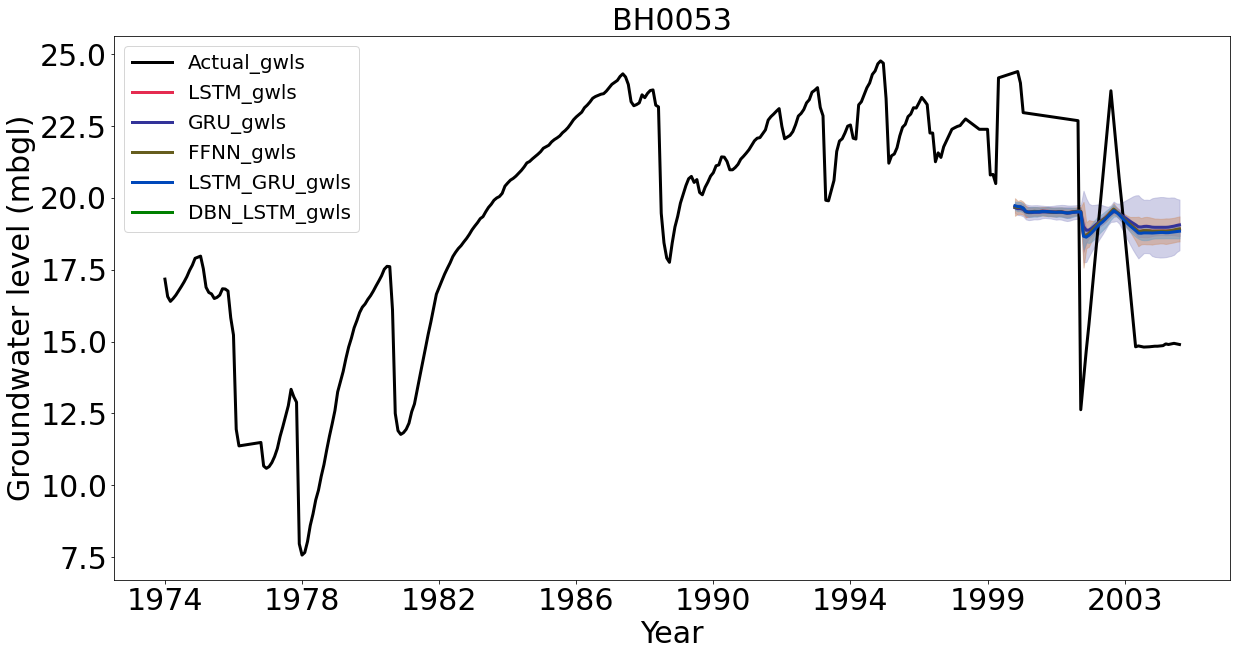

In [27]:
the_df['Actual_gwls'].plot(figsize=(20,10), fontsize=30,color='black', linewidth=3)
# the_df['actual_test_gwls'].plot(fontsize=15, color='black', linewidth=2)

the_df['LSTM_gwls'].plot(color='#E52B50', linewidth=3)
x = np.arange(len(the_df.index))
plt.fill_between(x, the_df['lstm_low_err'], the_df['lstm_up_err'], 
             color = '#9F2B68', alpha = 0.5)

the_df['GRU_gwls'].plot(color='#333399', linewidth=3)
x = np.arange(len(the_df.index))
plt.fill_between(x, the_df['gru_low_err'], the_df['gru_up_err'], 
             color = '#A2A2D0', alpha = 0.5)

the_df['FFNN_gwls'].plot(color='#665D1E', linewidth=3)
x = np.arange(len(the_df.index))
plt.fill_between(x, the_df['ffnn_low_err'], the_df['ffnn_up_err'], 
             color = '#CD9575', alpha = 0.5)

the_df['LSTM_GRU_gwls'].plot(color='#0048BA', linewidth=3)
# x = np.arange(len(the_df.index))
plt.fill_between(x, the_df['lstm_gru_low_err'], the_df['lstm_gru_up_err'], 
             color = '#72A0C1', alpha = 0.5)


the_df['DBN_LSTM_gwls'].plot(color='green', linewidth=3)
# x = np.arange(len(the_df.index))
plt.fill_between(x, the_df['dbn_lstm_low_err'], the_df['dbn_lstm_up_err'], 
             color = '#B0BF1A', alpha = 0.5)

plt.xlabel("Year",fontsize=30)
plt.ylabel("Groundwater level (mbgl)",fontsize=30)
# plt.xticks(the_df.index[0])
plt.title(bbh,fontsize=30)
plt.legend(loc='best', prop={'size': 20})
plt.savefig(figname, dpi=300)

In [ ]:
print(borehole)
print("\n")
print("DNB r2: ",dbn_r2_new)
print("LSTM r2: ",lstm_r2_new)
print("GRU r2: ",gru_r2_new)
print("FFNN r2: ",ffnn_r2_new)
print("LSTM-GRU r2: ",lstm_gru_r2_new)
print("DBN-LSTM r2: ",dbn_lstm_r2_new)

print("\n")
print("DNB mse: ",dbn_mse_new)
print("LSTM mse: ",lstm_mse_new)
print("GRU mse: ",gru_mse_new)
print("FFNN mse: ",ffnn_mse_new)
print("LSTM-GRU mse: ",lstm_gru_mse_new)
print("DBN-LSTM mse: ",dbn_lstm_mse_new)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



D4N0053


DNB r2:  0.3217002189225071
LSTM r2:  0.8070387563603821
GRU r2:  0.7380001784529395
FFNN r2:  0.8049576939792218
LSTM-GRU r2:  0.8068200902560705
Traceback (most recent call last):
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-050527ee8e87>", line 8, in <module>
    print("DBN-LSTM r2: ",dbn_lstm_r2_new)
NameError: name 'dbn_lstm_r2_new' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\b14ck\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\b14ck\an

## END